In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats

mimic = pd.read_csv('./dataset/mimic_ARDS_cutoff.csv')
eicu = pd.read_csv('./dataset/eicu_ARDS_cutoff.csv')

cat_cols = ['Mechanical_circ_support', 'CXR', 'MRI', 'Blood culture', 'Catheter',
                'Ventilator', 'gender', 'ethnicity', 'Antibiotics', 'vasoactive/inotropic', 'SpO2_fillna', 
                'Cardiac Output_fillna', 'ABPs_fillna', 'WBC_fillna', 'Glucose_fillna', 'Respiratory Rate_fillna',
                'HR_fillna', 'Temperature_fillna', 'Hemoglobin_fillna', 'AST_fillna', 'Creatinine_fillna', 'ABPd_fillna', 
                'CVP_fillna', 'PaO2_fillna', 'EtCO2_fillna', 'Eye Opening_fillna', 'RedBloodCell_fillna', 'Total Bilirubin_fillna', 
                'RASS_fillna', 'Troponin-T_fillna', 'NIBPd_fillna', 'Anion gap_fillna', 'NIBPs_fillna', 'pH_fillna', 'Potassium_fillna', 
                'Hematocrit_fillna','MAP_fillna', 'Platelets_fillna', 'height_fillna', 'Verbal Response_fillna', 'SVO2_fillna', 'Ca+_fillna', 
                'FIO2 (%)_fillna', 'O2 Sat (%)_fillna', 'Motor Response_fillna', 'PaCO2_fillna', 'INR_fillna', 'Alkaline phosphatase_fillna', 
                'PEEP_fillna', 'Peak Insp. Pressure_fillna', 'CO2_fillna', 'BUN_fillna', 'Stroke Volume_fillna', 'Lactate_fillna', 'CRP_fillna', 
                'Sodium_fillna', 'ALT_fillna']

cont_cols = ['Time_since_ICU_admission', 'Urine output', 'NIBPs', 'O2 Sat (%)', 'Respiratory Rate',
                'HR', 'MAP', 'NIBPd', 'Temperature', 'RASS', 'ABPs', 'PEEP', 'Peak Insp. Pressure',
                'ABPd', 'CVP', 'Verbal Response', 'Motor Response', 'EtCO2', 'Eye Opening', 'SVO2',
                'Stroke Volume', 'Cardiac Output', 'SpO2', 'Lactate', 'Sodium', 'Creatinine', 'Anion gap',
                'Glucose', 'Potassium', 'pH', 'PaCO2', 'Ca+', 'Hemoglobin', 'PaO2', 'Alkaline phosphatase',
                'BUN', 'ALT', 'AST', 'FIO2 (%)', 'CO2', 'INR', 'Total Bilirubin', 'RedBloodCell', 'Hematocrit',
                'Platelets', 'WBC', 'Troponin-T', 'CRP', 'height', 'weight', 'Age', 'PaO2/FiO2', 'Fluids(ml)',
                'GCS_score', 'Sofa_Respiration', 'Sofa_Coagulation', 'Sofa_Liver', 'Sofa_Cardiovascular',
                'Sofa_GCS', 'Sofa_Urine', 'SoFa_score']

use_cols = cont_cols + cat_cols


In [17]:
mimic.stay_id.nunique()  + eicu.patientunitstayid.nunique()

124849

In [2]:
# Sofa_Cardiovascular 컬럼은 mimic과 eicu 모두 값이 동일함.

p_t_values = []
p_levene_values = []
diff_true = {}
diff_false = {}
alpha = 0.05

for i in cont_cols:
    
    # 정규성 검정
    mimic_normal_test_statistic, mimic_normal_test_p_values = stats.normaltest(mimic.loc[:,i])
    eicu_normal_test_statistic, eicu_normal_test_p_values = stats.normaltest(eicu.loc[:,i])
    
    if mimic_normal_test_p_values < 0.05 and eicu_normal_test_p_values < 0.05:
        print('Normality is not satisfied')
        t_statistic,p = stats.mannwhitneyu(mimic.loc[:,i], eicu.loc[:,i])
        p_t_values.append(p)

    else:
        print('Normality is satisfied')
        f_statistic, p_levene = stats.levene(mimic.loc[:,i], eicu.loc[:,i]) # 등분산성 검정
        p_levene_values.append(p_levene)

        if p_levene < alpha:
            t_statistic,p = stats.ttest_ind(mimic.loc[:,i], eicu.loc[:,i], equal_var=False) # 독립 표본 t-검정 수행
            p_t_values.append(p)
        else:
            t_statistic,p = stats.ttest_ind(mimic.loc[:,i], eicu.loc[:,i], equal_var=True) # 독립 표본 t-검정 수행
            p_t_values.append(p)
    
    print(f"=== {i} T-Test Result ===")
    print(f'mimic normality : {mimic_normal_test_p_values} | eicu normality : {eicu_normal_test_p_values}')
    print("T-Statistic:", t_statistic, f' T_P-Value: {p}')
    print()

    if p < alpha:
        diff_true[i] = [t_statistic, p]
    else:
        diff_false[i] = [t_statistic, p]

# # 본페로니 교정 적용 
# reject, pvals_corrected, _, _ = sm.stats.multipletests(p_t_values, alpha=0.05, method='bonferroni')

# # 결과 출력
# print(reject)  # 교정 후 기각 여부: True는 귀무 가설이 기각됨을 의미, False는 기각되지 않음을 의미
# print(pvals_corrected)  # 교정된 p-값

# # 기각되지 않은 column 확인
# for col,i in zip(cont_cols,reject):
#     if not i:
#         print(f'After bonferroni the {col} is failed to add null hypothesis')
    


Normality is not satisfied
=== Time_since_ICU_admission T-Test Result ===
mimic normality : 0.0 | eicu normality : 0.0
T-Statistic: 36037576839.5  T_P-Value: 0.0

Normality is not satisfied
=== Urine output T-Test Result ===
mimic normality : 0.0 | eicu normality : 0.0
T-Statistic: 44039045940.0  T_P-Value: 0.0

Normality is not satisfied
=== NIBPs T-Test Result ===
mimic normality : 0.0 | eicu normality : 0.0
T-Statistic: 52614666917.5  T_P-Value: 8.34699054887642e-21

Normality is not satisfied
=== O2 Sat (%) T-Test Result ===
mimic normality : 0.0 | eicu normality : 0.0
T-Statistic: 34793146680.0  T_P-Value: 0.0

Normality is not satisfied
=== Respiratory Rate T-Test Result ===
mimic normality : 0.0 | eicu normality : 0.0
T-Statistic: 41541148009.5  T_P-Value: 0.0

Normality is not satisfied
=== HR T-Test Result ===
mimic normality : 0.0 | eicu normality : 0.0
T-Statistic: 42434843427.0  T_P-Value: 0.0

Normality is not satisfied
=== MAP T-Test Result ===
mimic normality : 0.0 | eic

/home/sdh00/.pyenv/versions/3.9.12/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1584: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
/home/sdh00/.pyenv/versions/3.9.12/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1786: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = kurtosis(a, axis, fisher=False)
/home/sdh00/.pyenv/versions/3.9.12/lib/python3.9/site-packages/scipy/stats/_morestats.py:3310: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom
/home/sdh00/.pyenv/versions/3.9.12/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly ide

=== Sofa_GCS T-Test Result ===
mimic normality : 0.0 | eicu normality : 0.0
T-Statistic: 69422301883.0  T_P-Value: 0.0

Normality is not satisfied
=== Sofa_Urine T-Test Result ===
mimic normality : 0.0 | eicu normality : 0.0
T-Statistic: 46633625679.0  T_P-Value: 0.0

Normality is not satisfied
=== SoFa_score T-Test Result ===
mimic normality : 0.0 | eicu normality : 0.0
T-Statistic: 64182734319.5  T_P-Value: 0.0



In [19]:
# Sofa_Cardiovascular 컬럼은 mimic과 eicu 모두 값이 동일함.
print(f'이상치 제거 전 분포의 차이가 존재함을 보이는 변수의 개수 {len(diff_true)} / {len(cont_cols)} 개')

p_list = np.mean([p for t,p in diff_true.values()])
print(f'p-value의 평균 값 : {p_list}')

이상치 제거 전 분포의 차이가 존재함을 보이는 변수의 개수 60 / 61 개
p-value의 평균 값 : 1.1358653778910346e-14


In [20]:
## 분위수에 따른 이상치 제거 후 차이 비교
# Sofa_Cardiovascular 컬럼은 mimic과 eicu 모두 값이 동일함.

p_t_values_ao = []
p_levene_values_ao = []
diff_true_ao = {}
diff_false_ao = {}
alpha = 0.05

def remove_outliers(data):
    q1 = np.percentile(data, 25)  
    q3 = np.percentile(data, 75) 
    iqr = q3 - q1 
    threshold = 1.5 * iqr  
    
    # 이상치 식별
    lower_bound = q1 - threshold
    upper_bound = q3 + threshold
    
    # 이상치 제거
    outliers_removed = [x for x in data if x >= lower_bound and x <= upper_bound]
    
    return outliers_removed

for i in cont_cols:
    
    # 정규성 검정
    mimic_values, eicu_values = remove_outliers(mimic.loc[:,i]), remove_outliers(eicu.loc[:,i])
    mimic_normal_test_statistic, mimic_normal_test_p_values = stats.normaltest(mimic_values)
    eicu_normal_test_statistic, eicu_normal_test_p_values = stats.normaltest(eicu_values)
    
    if mimic_normal_test_p_values < 0.05 and eicu_normal_test_p_values < 0.05:
        print('Normality is not satisfied')
        t_statistic,p = stats.mannwhitneyu(mimic_values, eicu_values)
        p_t_values_ao.append(p)

    else:
        print('Normality is satisfied')
        f_statistic, p_levene = stats.levene(mimic_values, eicu_values) # 등분산성 검정
        p_levene_values_ao.append(p_levene)

        if p_levene < alpha:
            t_statistic,p = stats.ttest_ind(mimic_values, eicu_values, equal_var=False) # 독립 표본 t-검정 수행
            p_t_values_ao.append(p)
        else:
            t_statistic,p = stats.ttest_ind(mimic_values, eicu_values, equal_var=True) # 독립 표본 t-검정 수행
            p_t_values_ao.append(p)
    
    print(f"=== {i} T-Test Result ===")
    print(f'mimic normality : {mimic_normal_test_p_values} | eicu normality : {eicu_normal_test_p_values}')
    print("T-Statistic:", t_statistic, f' T_P-Value: {p}')
    print()

    if p < alpha:
        diff_true_ao[i] = [t_statistic, p]
    else:
        diff_false_ao[i] = [t_statistic, p]

# # 본페로니 교정 적용 
# reject, pvals_corrected, _, _ = sm.stats.multipletests(p_t_values_ao, alpha=0.05, method='bonferroni')

# # 결과 출력
# print(reject)  # 교정 후 기각 여부: True는 귀무 가설이 기각됨을 의미, False는 기각되지 않음을 의미
# print(pvals_corrected)  # 교정된 p-값

# # 기각되지 않은 column 확인
# for col,i in zip(cont_cols,reject):
#     if not i:
#         print(f'After bonferroni the {col} is failed to add null hypothesis')


Normality is not satisfied
=== Time_since_ICU_admission T-Test Result ===
mimic normality : 0.0 | eicu normality : 0.0
T-Statistic: 28978390257.0  T_P-Value: 0.0

Normality is satisfied
=== Urine output T-Test Result ===
mimic normality : nan | eicu normality : nan
T-Statistic: nan  T_P-Value: nan



/home/sdh00/.pyenv/versions/3.9.12/lib/python3.9/site-packages/scipy/stats/_morestats.py:3310: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom


Normality is not satisfied
=== NIBPs T-Test Result ===
mimic normality : 0.0 | eicu normality : 0.0
T-Statistic: 49841407835.5  T_P-Value: 0.03149194525697647

Normality is not satisfied
=== O2 Sat (%) T-Test Result ===
mimic normality : 0.0 | eicu normality : 0.0
T-Statistic: 9160590724.0  T_P-Value: 0.0

Normality is not satisfied
=== Respiratory Rate T-Test Result ===
mimic normality : 0.0 | eicu normality : 0.0
T-Statistic: 39416566450.5  T_P-Value: 0.0

Normality is not satisfied
=== HR T-Test Result ===
mimic normality : 0.0 | eicu normality : 0.0
T-Statistic: 40922943086.0  T_P-Value: 0.0

Normality is not satisfied
=== MAP T-Test Result ===
mimic normality : 0.0 | eicu normality : 0.0
T-Statistic: 49326135088.0  T_P-Value: 5.121057799771409e-162

Normality is not satisfied
=== NIBPd T-Test Result ===
mimic normality : 0.0 | eicu normality : 0.0
T-Statistic: 56488247531.0  T_P-Value: 0.0

Normality is satisfied
=== Temperature T-Test Result ===
mimic normality : 0.0 | eicu norma

/home/sdh00/.pyenv/versions/3.9.12/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1584: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
/home/sdh00/.pyenv/versions/3.9.12/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1786: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = kurtosis(a, axis, fisher=False)
/home/sdh00/.pyenv/versions/3.9.12/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Normality is satisfied
=== RASS T-Test Result ===
mimic normality : nan | eicu normality : nan
T-Statistic: nan  T_P-Value: nan

Normality is not satisfied
=== ABPs T-Test Result ===
mimic normality : 0.0 | eicu normality : 6.231831668531406e-218
T-Statistic: 43045265919.5  T_P-Value: 0.0

Normality is satisfied
=== PEEP T-Test Result ===
mimic normality : 0.0 | eicu normality : nan
T-Statistic: 295.71264980588296  T_P-Value: 0.0

Normality is satisfied
=== Peak Insp. Pressure T-Test Result ===
mimic normality : 0.0 | eicu normality : nan
T-Statistic: 357.002226239889  T_P-Value: 0.0

Normality is not satisfied
=== ABPd T-Test Result ===
mimic normality : 0.0 | eicu normality : 0.0
T-Statistic: 52474162096.5  T_P-Value: 1.131307352694793e-35

Normality is not satisfied
=== CVP T-Test Result ===
mimic normality : 0.0 | eicu normality : 0.0
T-Statistic: 38146142823.0  T_P-Value: 0.0

Normality is satisfied
=== Verbal Response T-Test Result ===
mimic normality : 0.0 | eicu normality : nan

In [21]:
# nan value 제외 총 2개가 존재.
print(f'이상치 제거 전 분포의 차이가 존재함을 보이는 변수의 개수 {len(diff_true_ao)} / {len(cont_cols)} 개')
print(diff_false_ao)
p_list_ao = np.mean([p for t,p in diff_true_ao.values()])
print(f'p-value의 평균 값 : {p_list_ao}')

이상치 제거 전 분포의 차이가 존재함을 보이는 변수의 개수 50 / 61 개
{'Urine output': [nan, nan], 'RASS': [nan, nan], 'Motor Response': [nan, nan], 'EtCO2': [nan, nan], 'SVO2': [nan, nan], 'Stroke Volume': [nan, nan], 'Cardiac Output': [48198900738.5, 0.1984083688871806], 'Glucose': [39448499473.0, 0.4461811107584994], 'Troponin-T': [nan, nan], 'CRP': [nan, nan], 'Sofa_Cardiovascular': [nan, nan]}
p-value의 평균 값 : 0.0006328682360385327


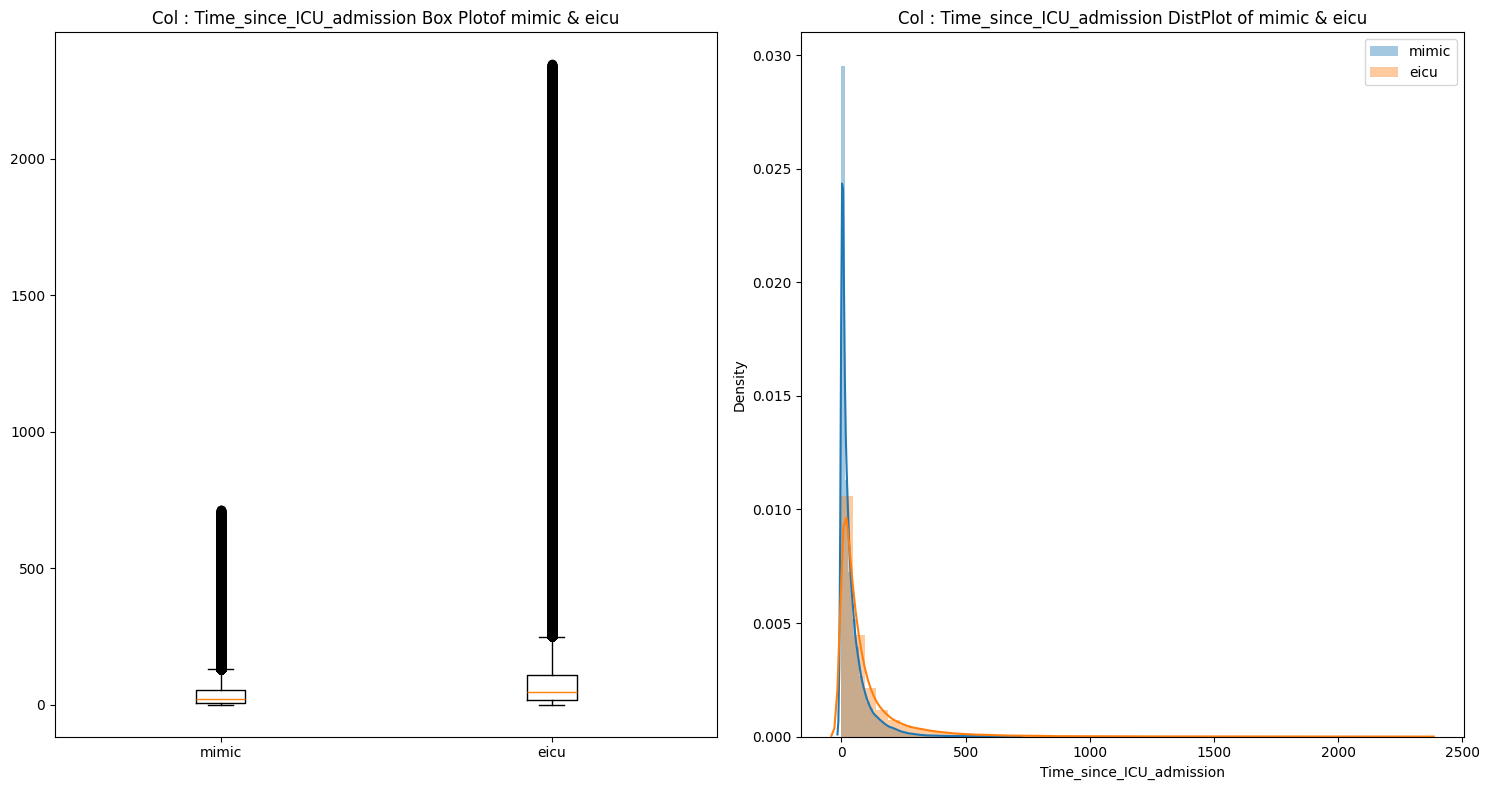

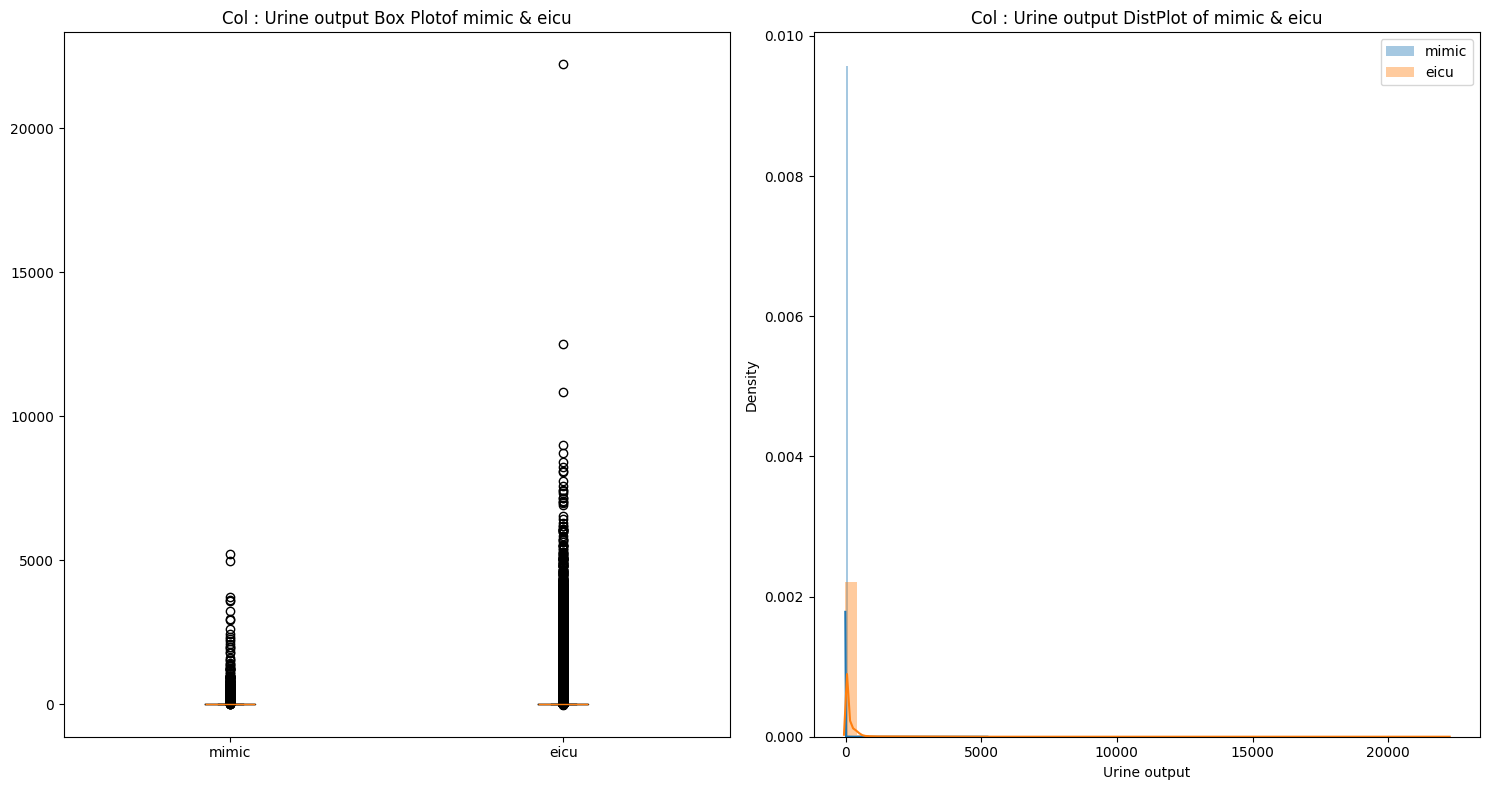

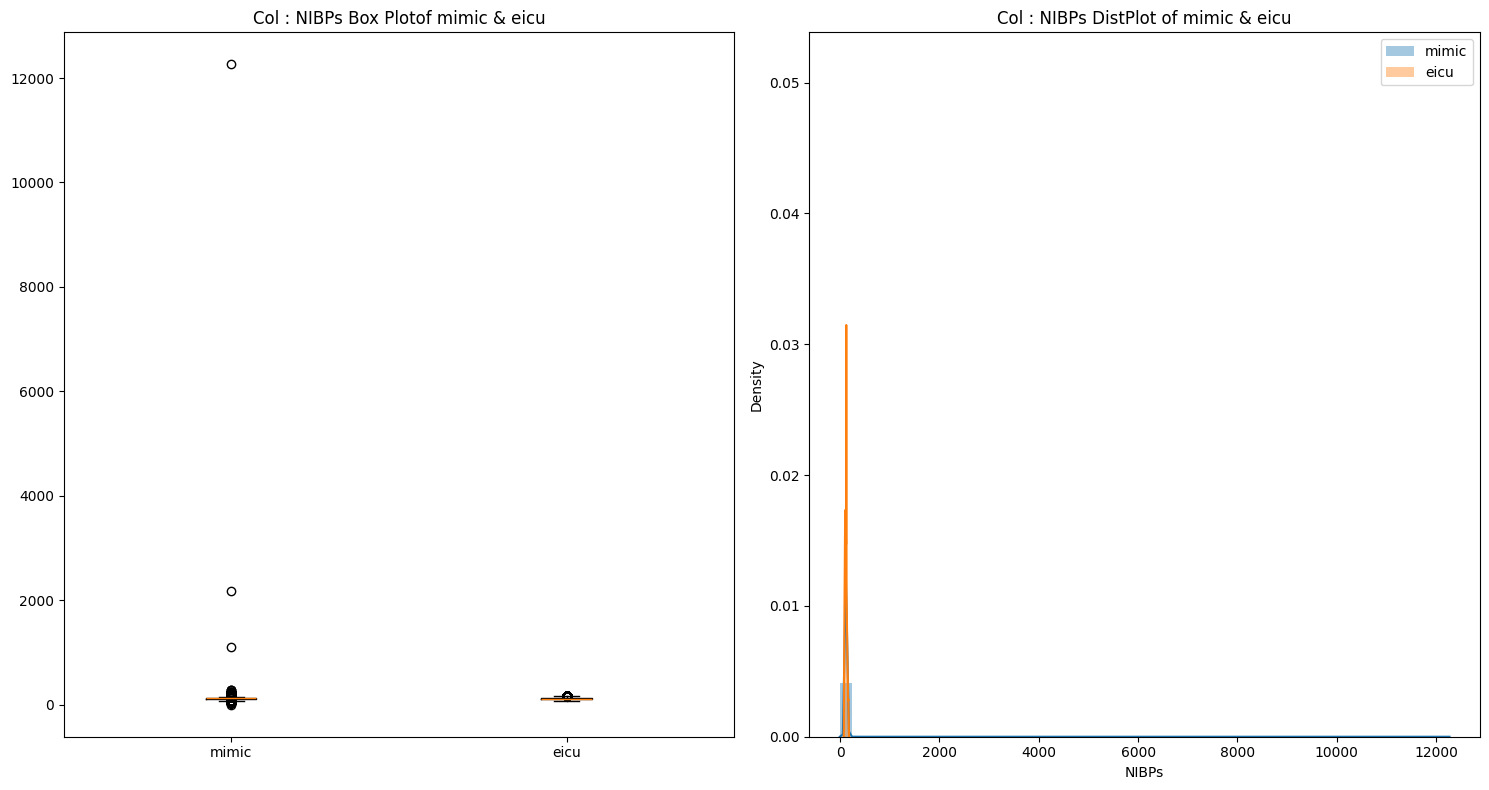

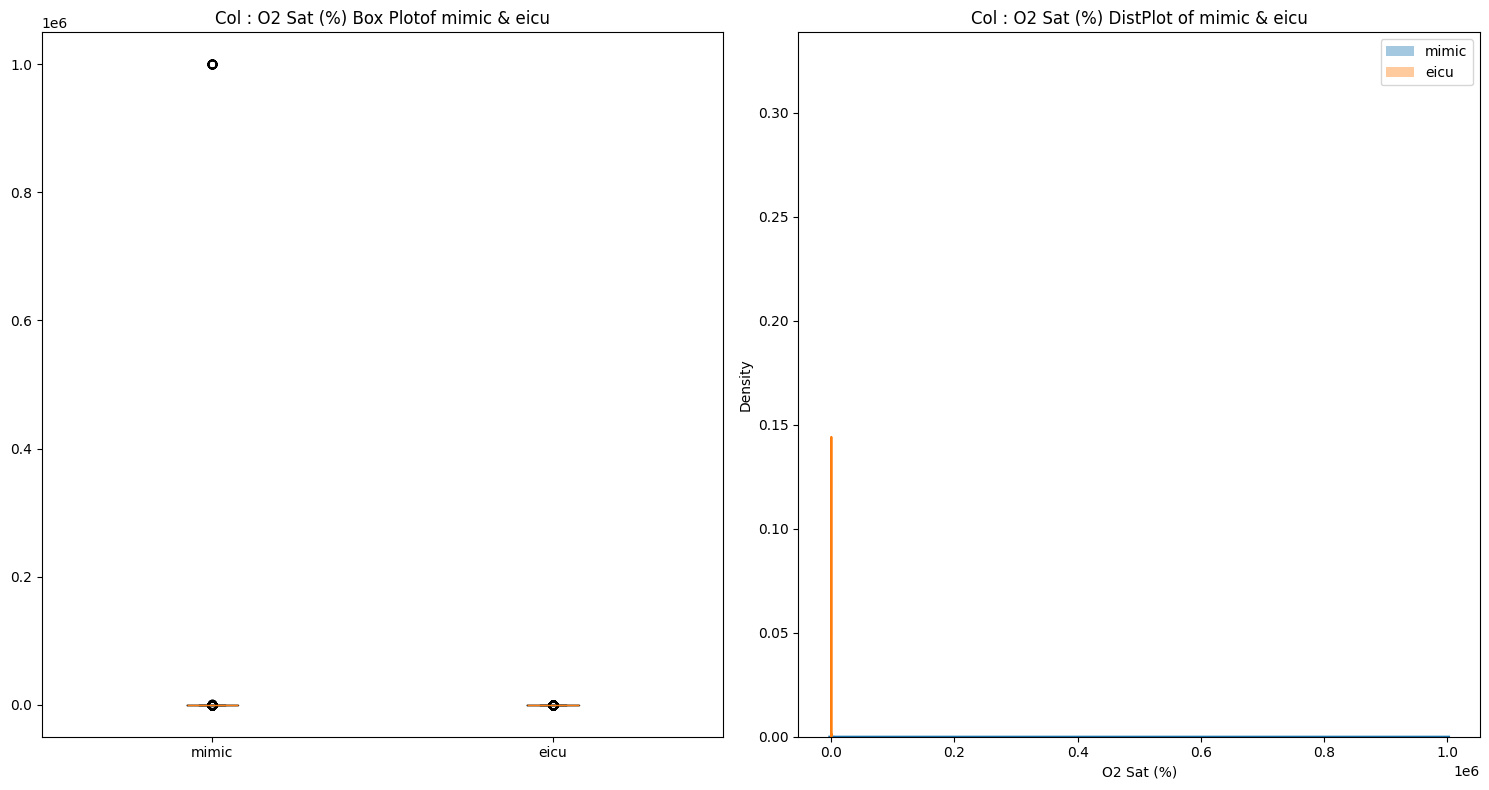

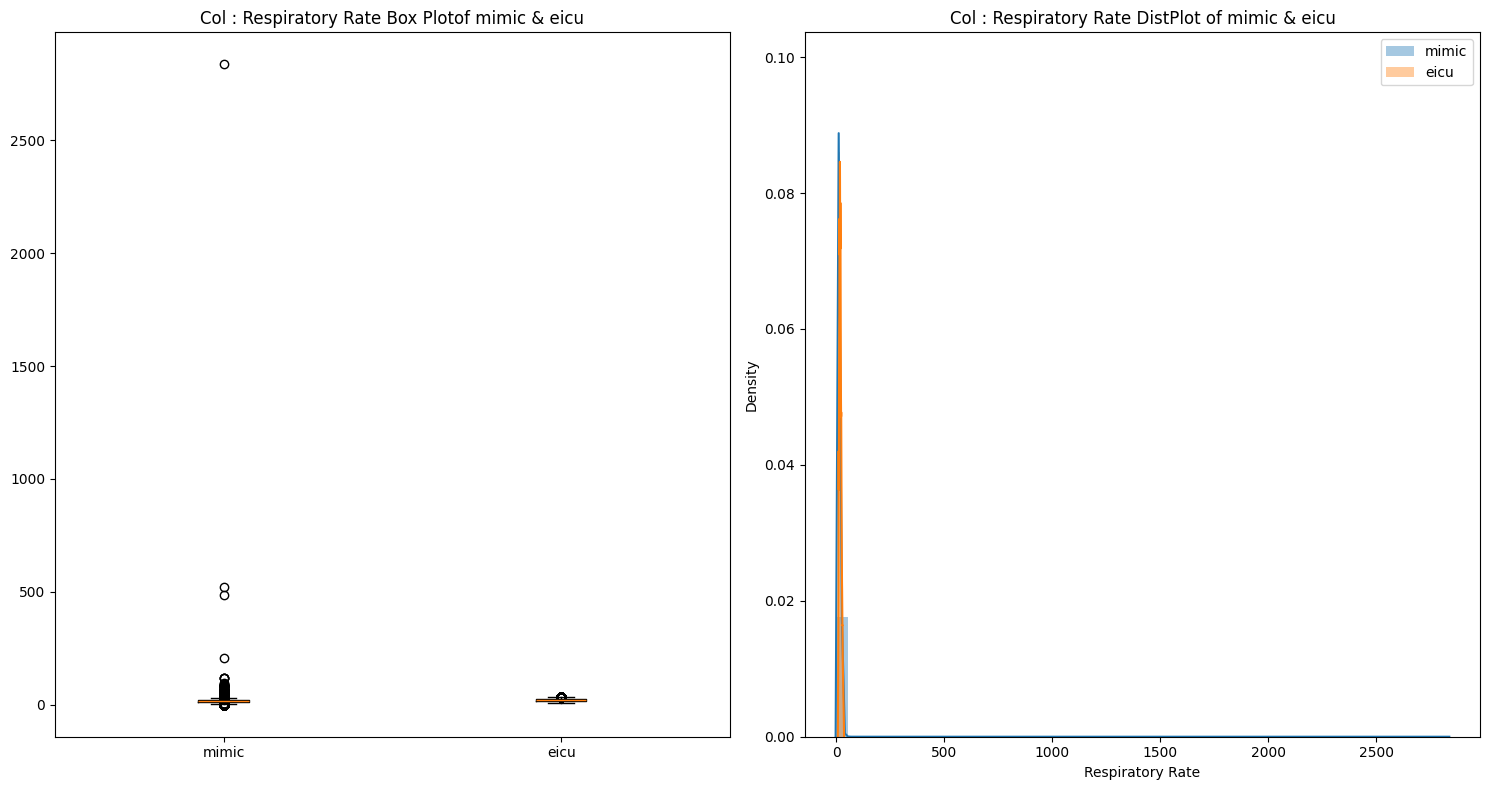

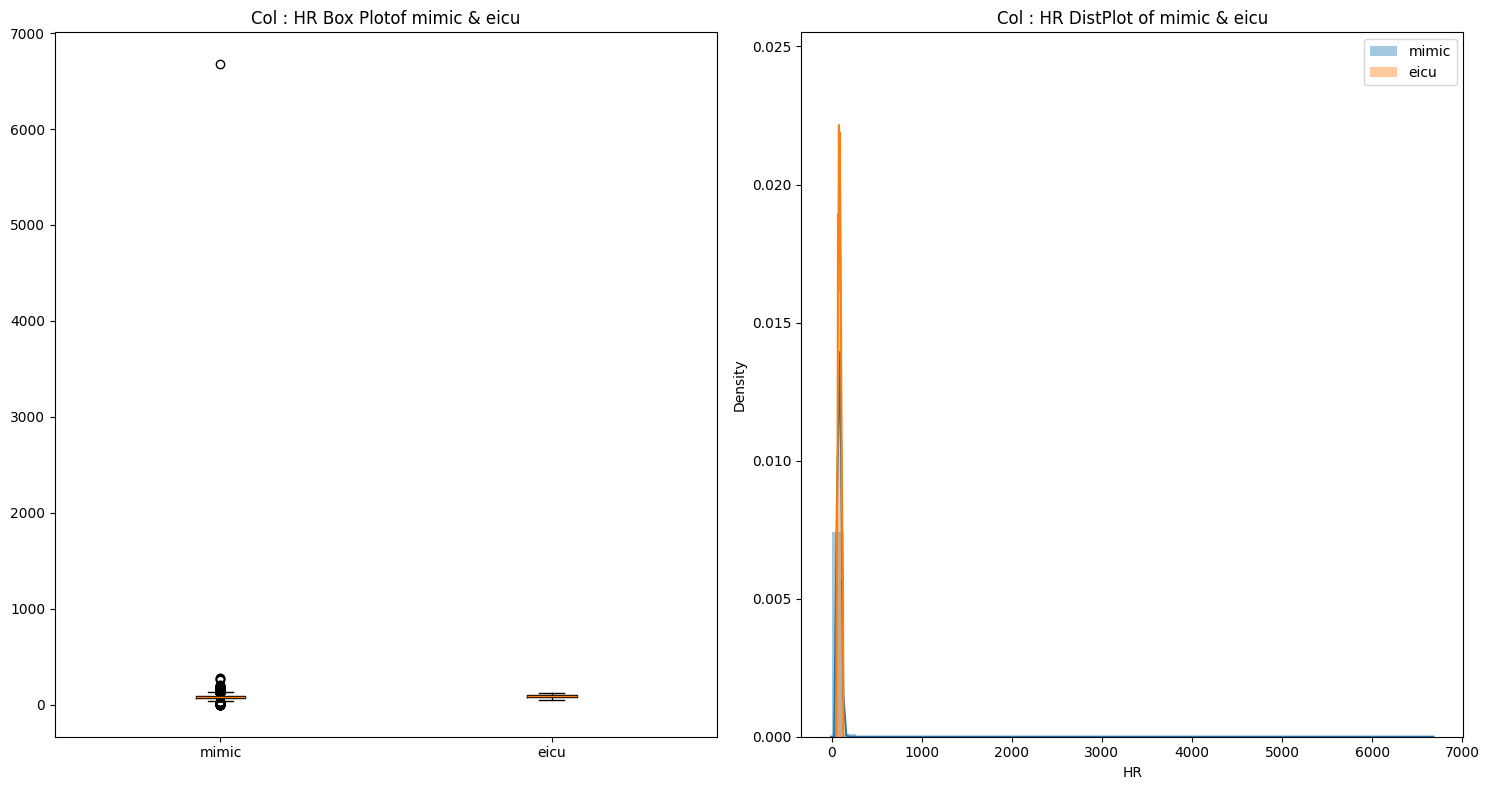

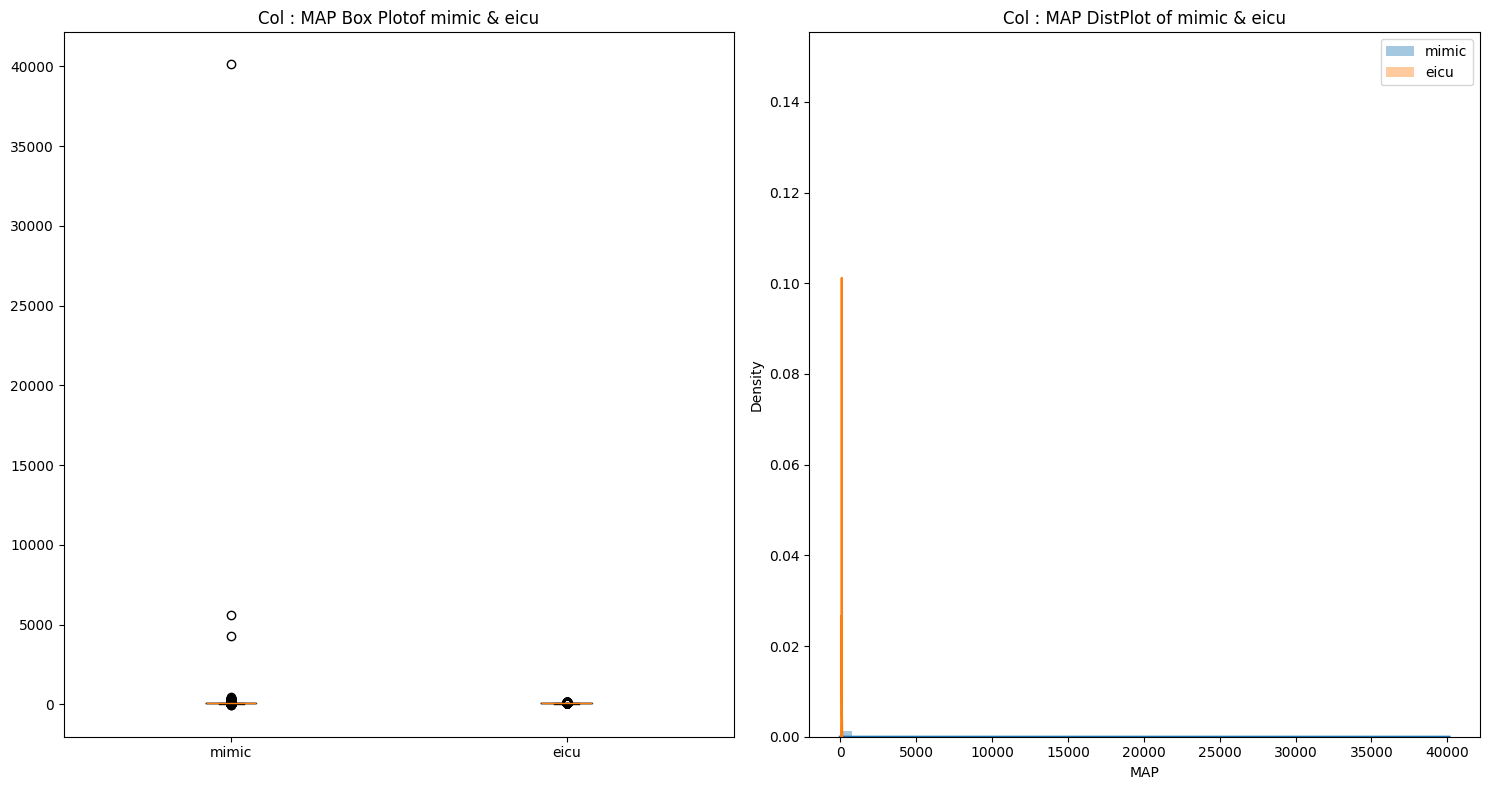

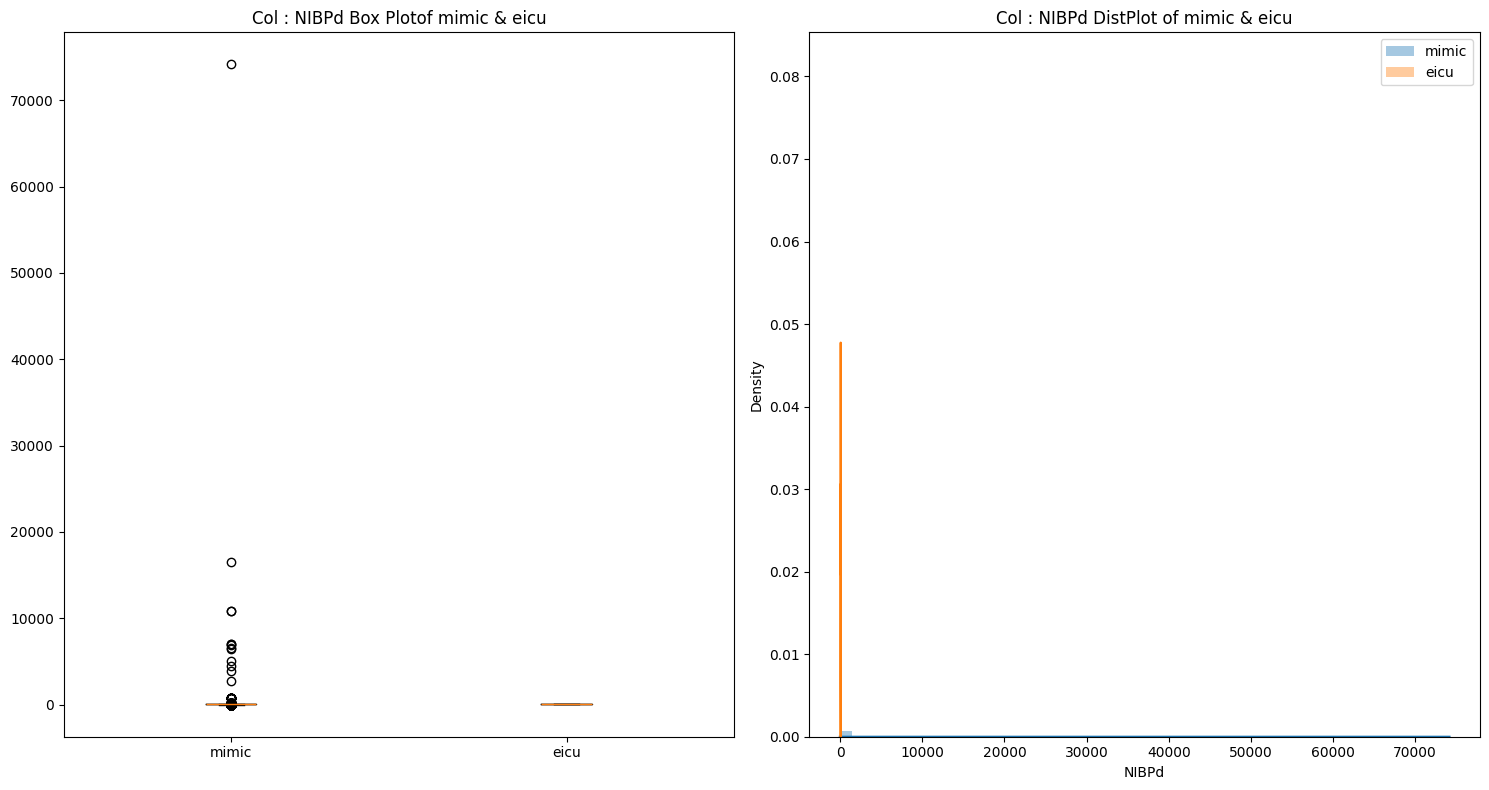

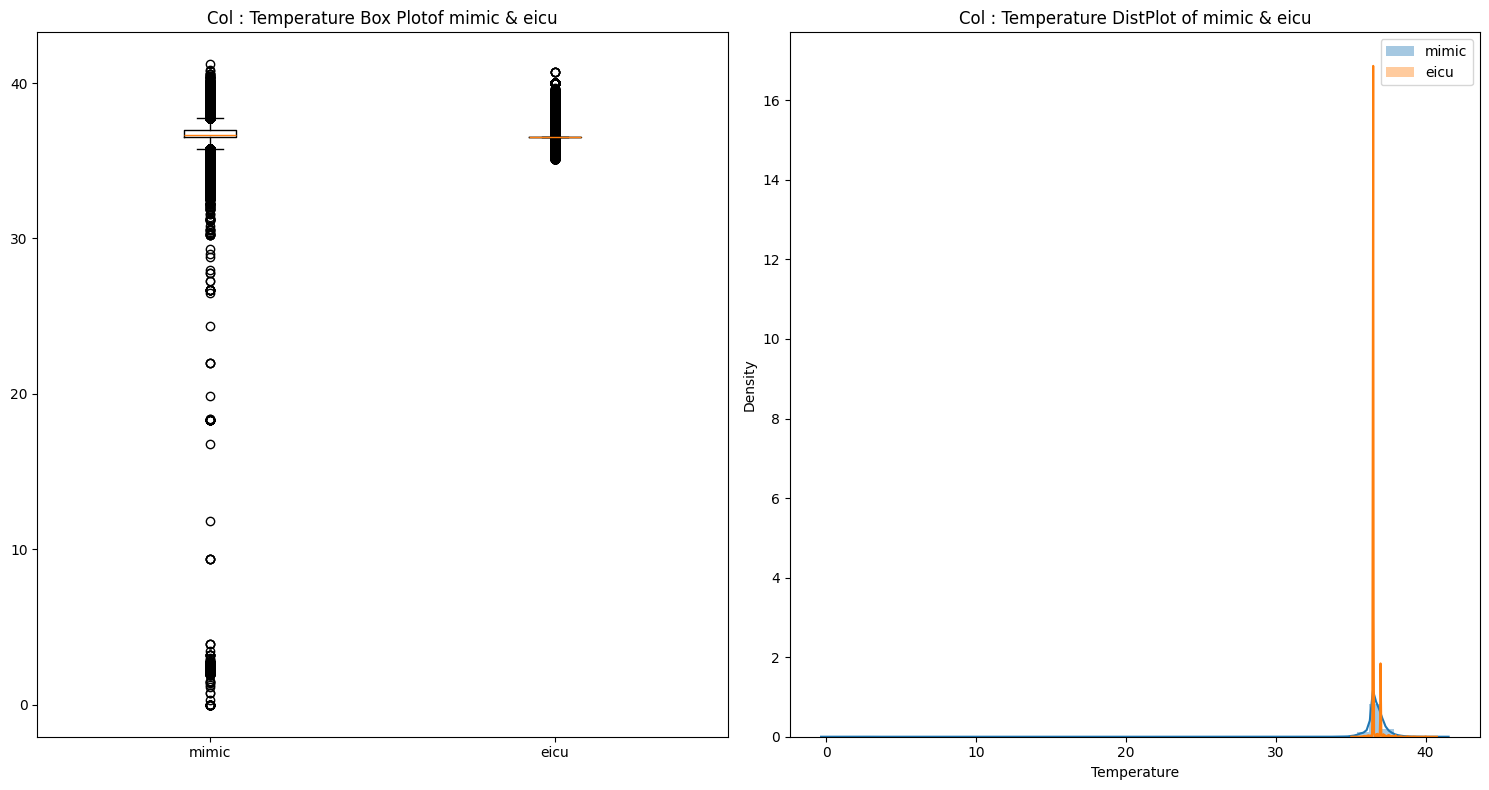

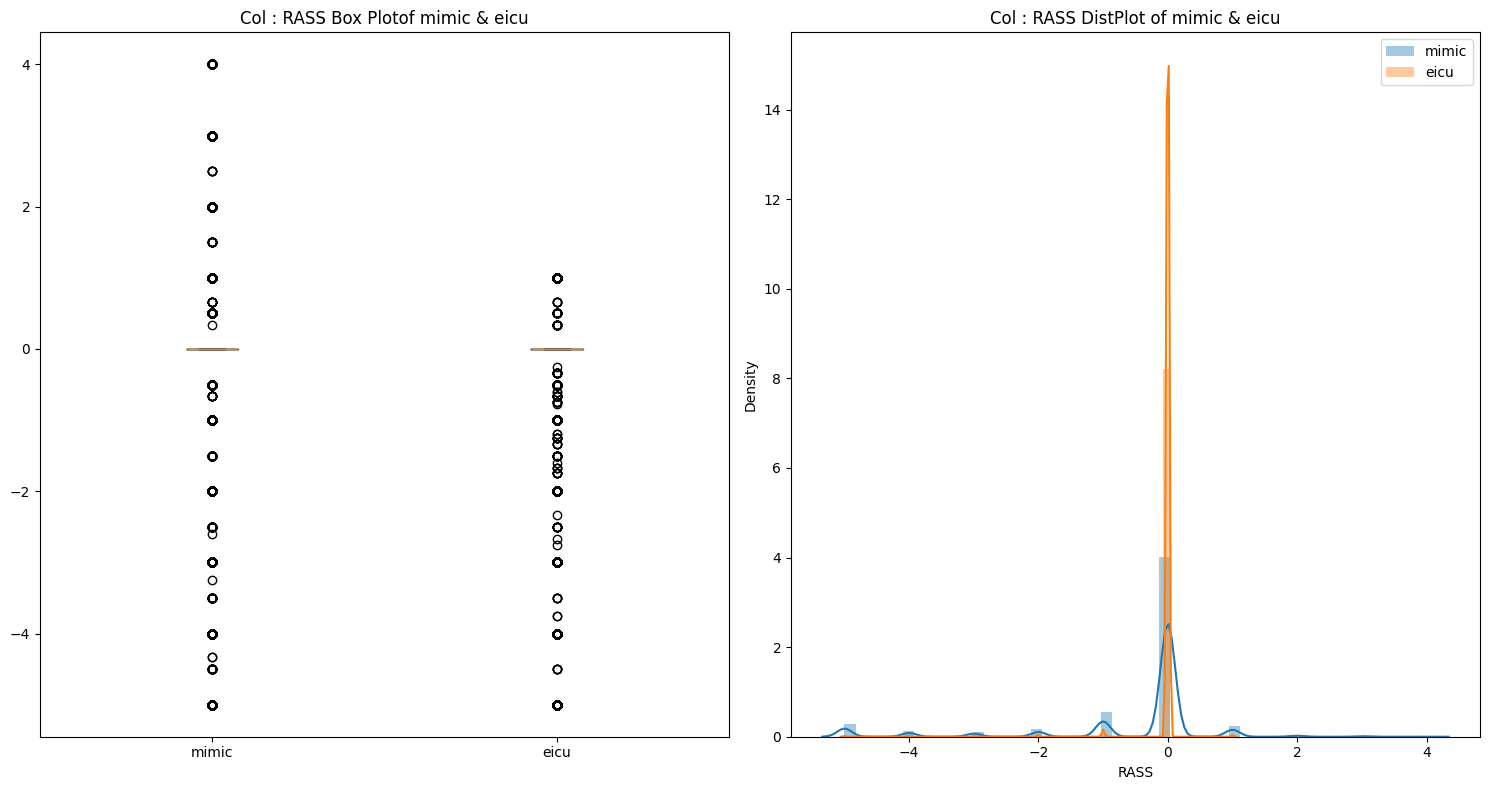

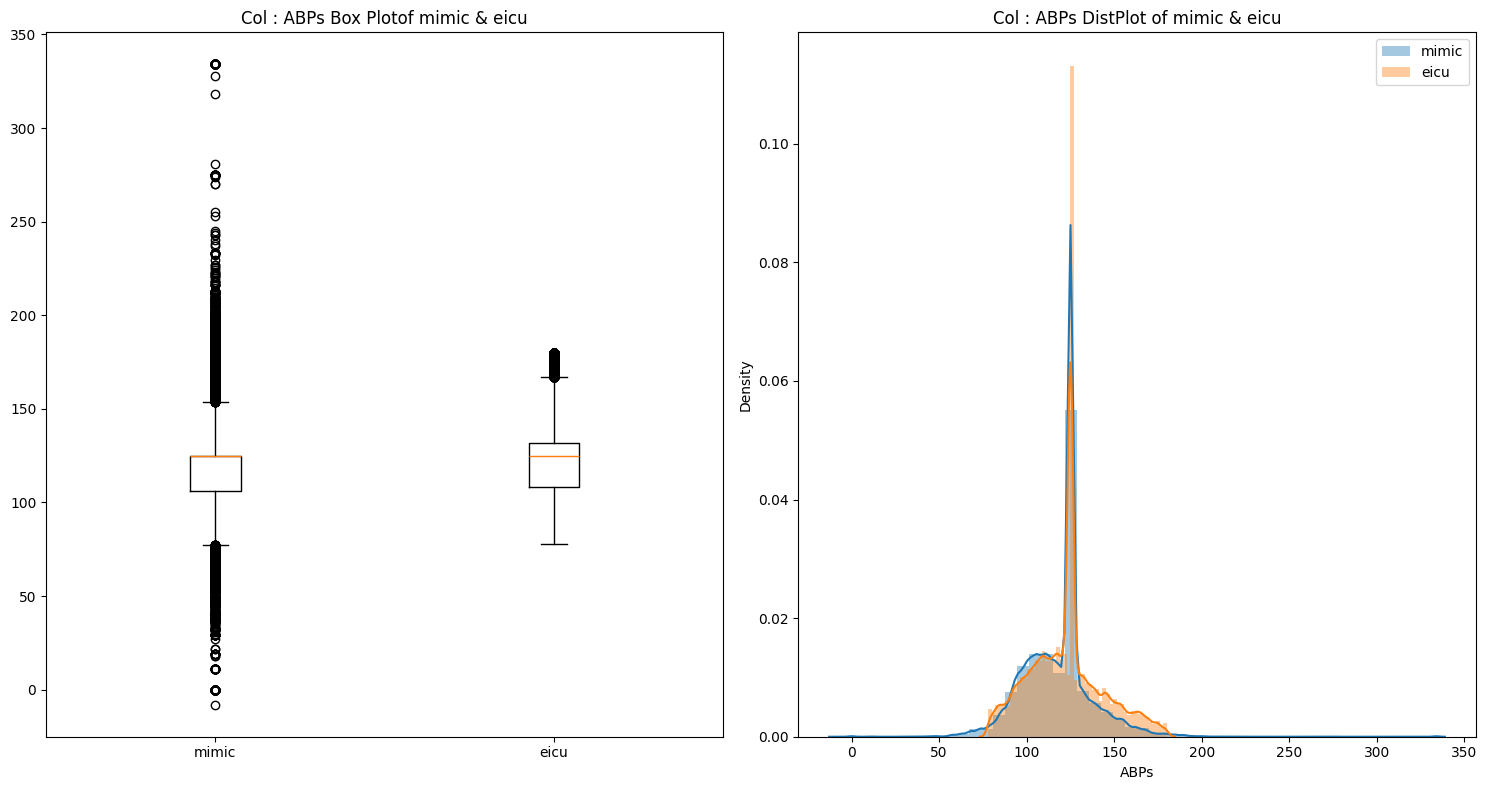

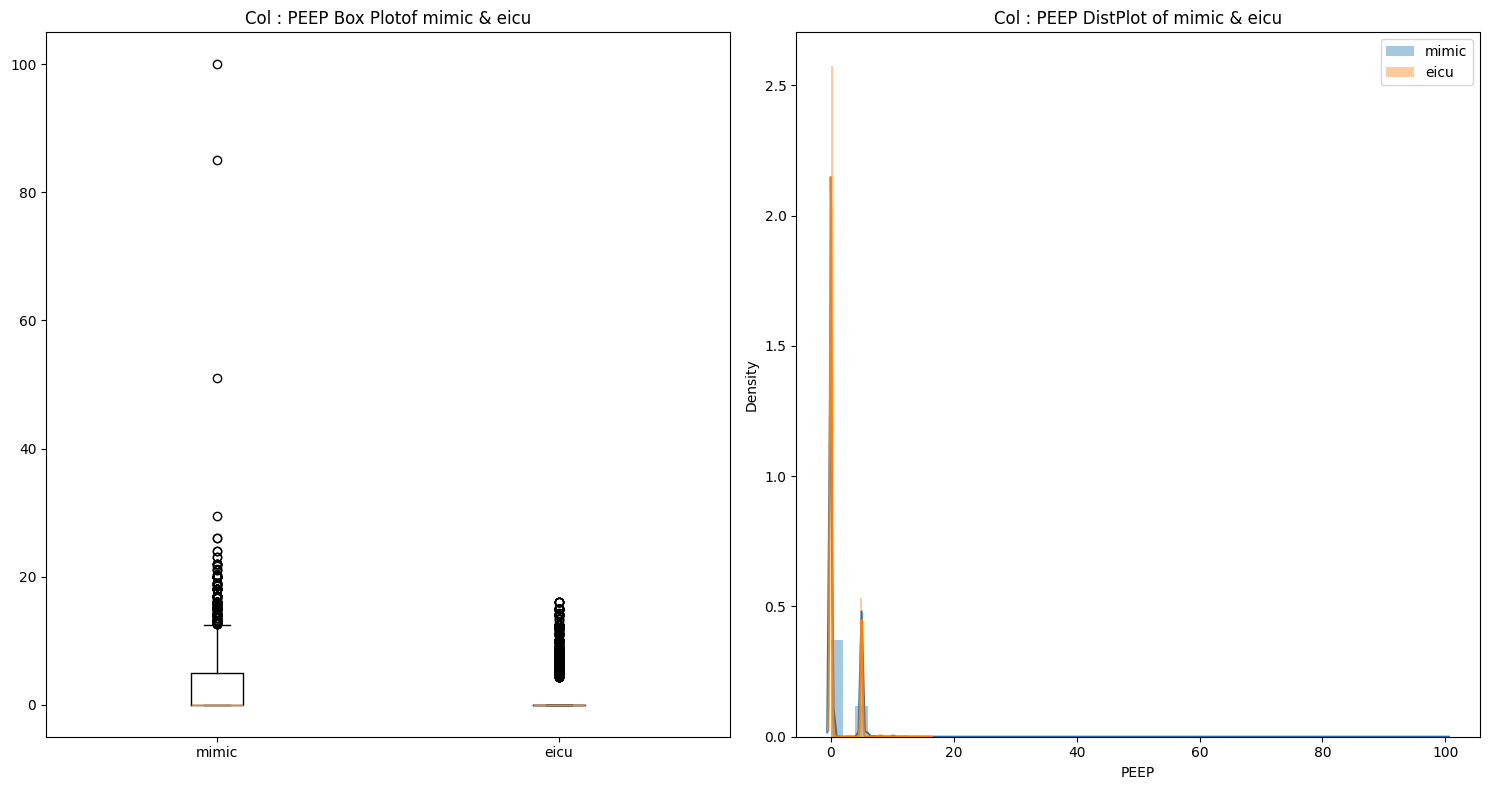

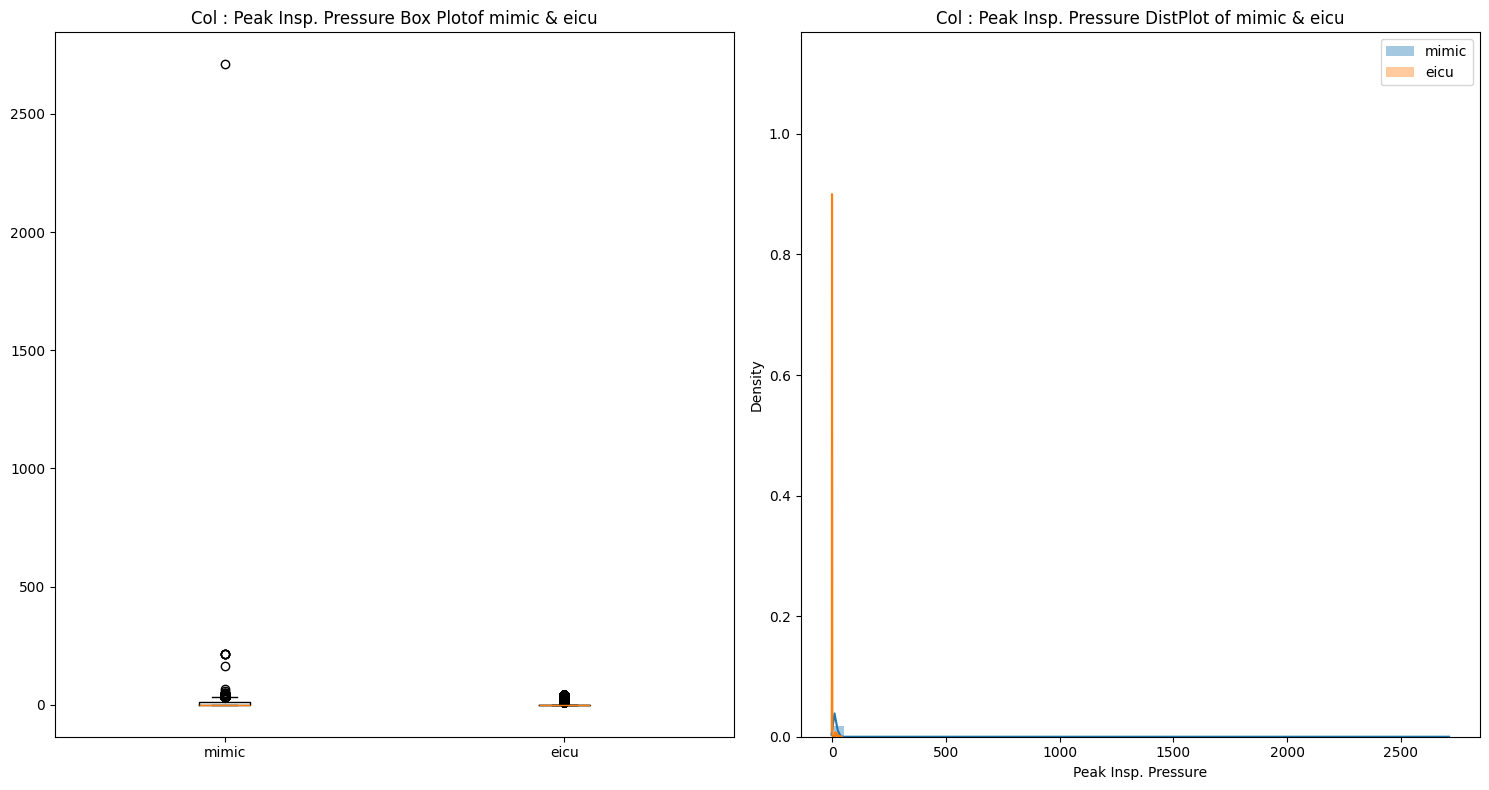

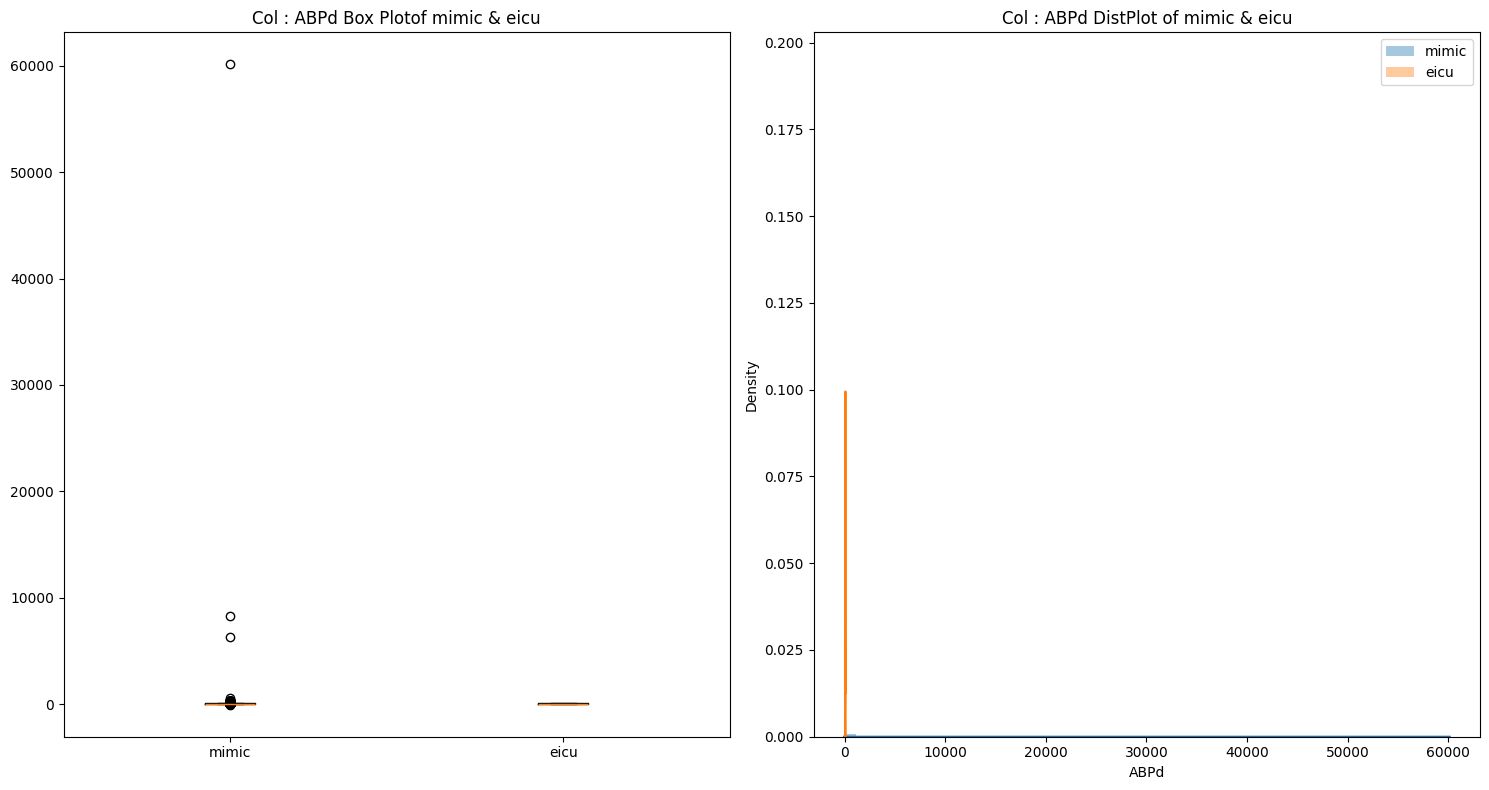

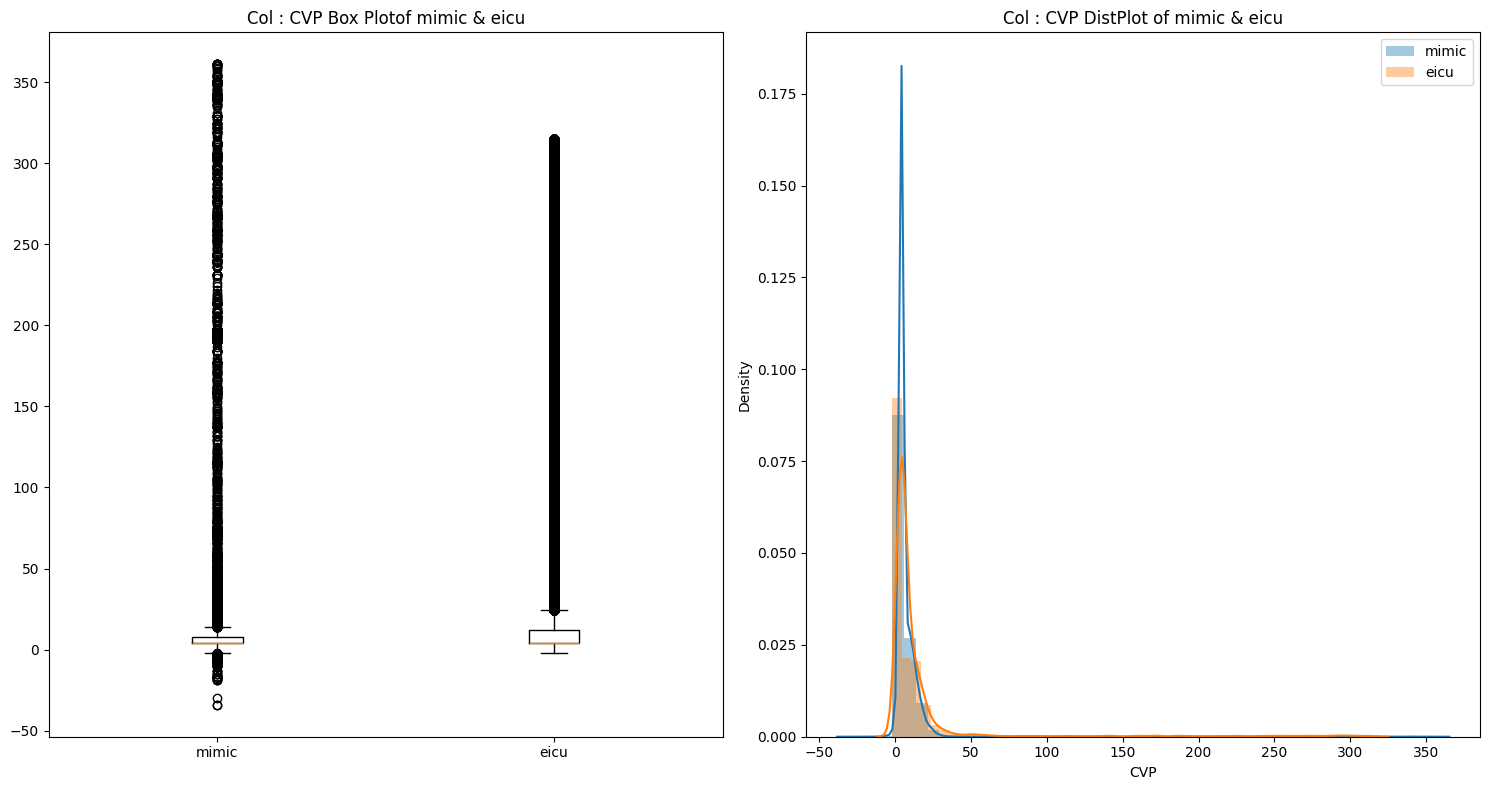

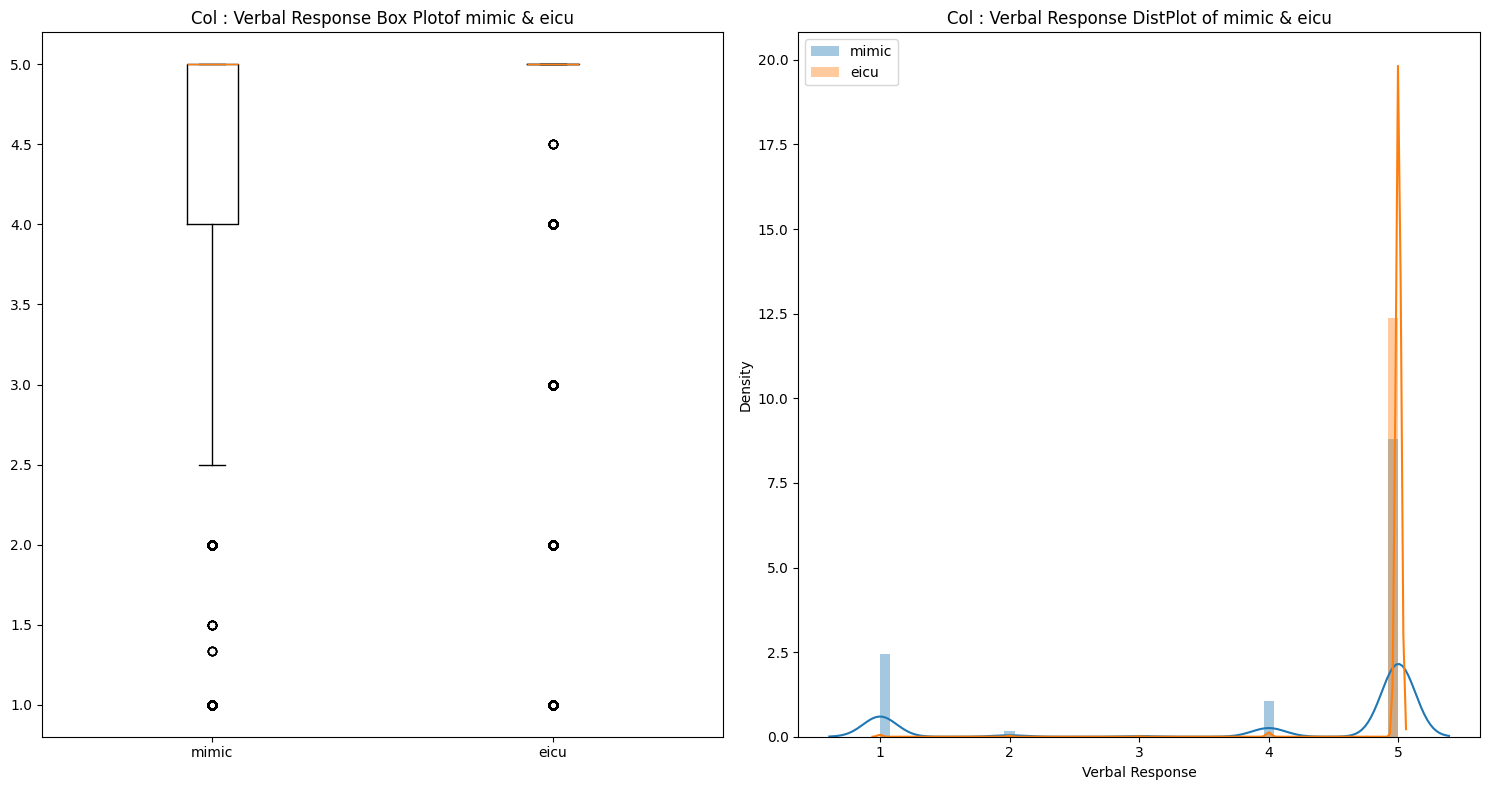

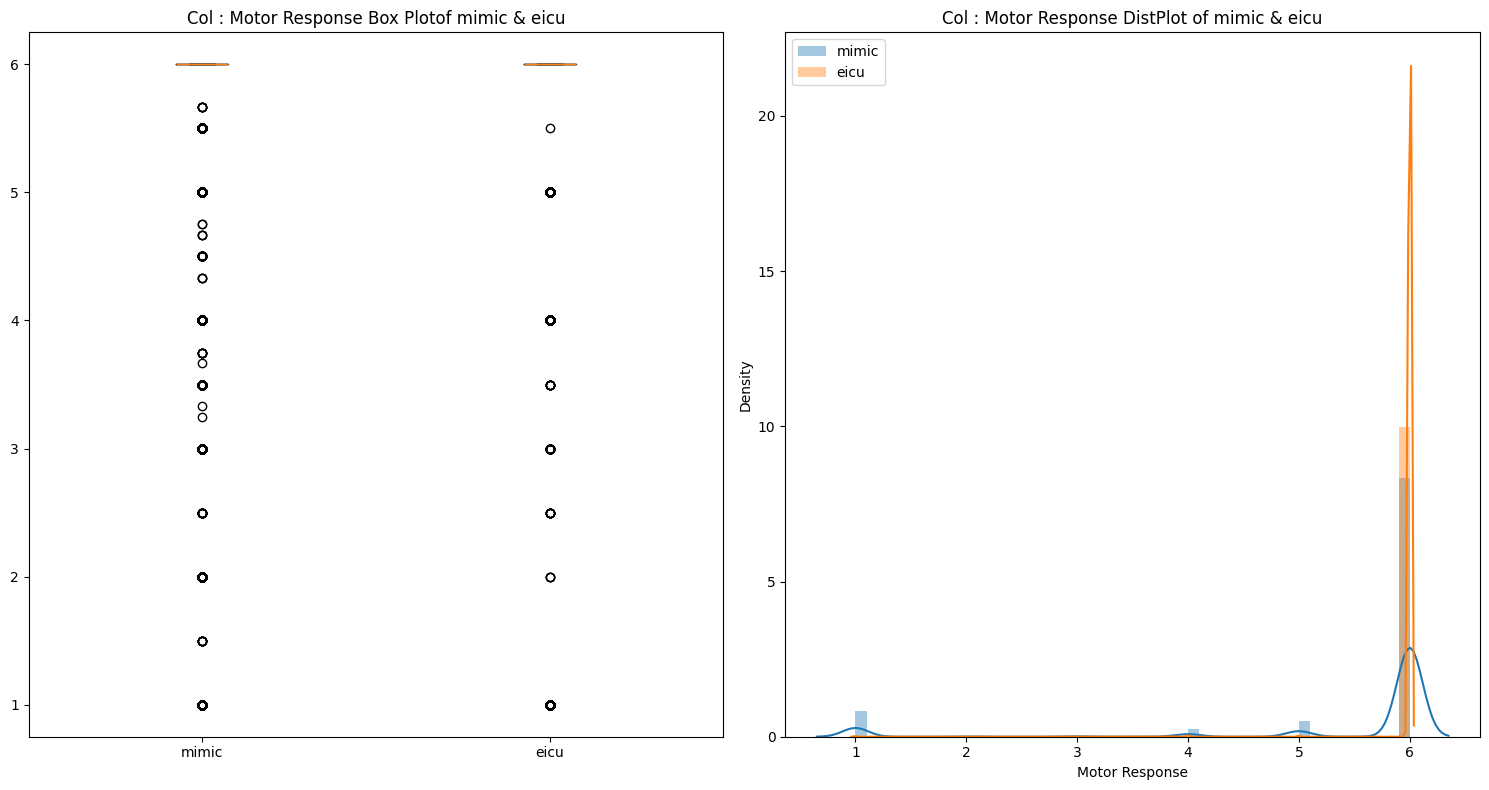

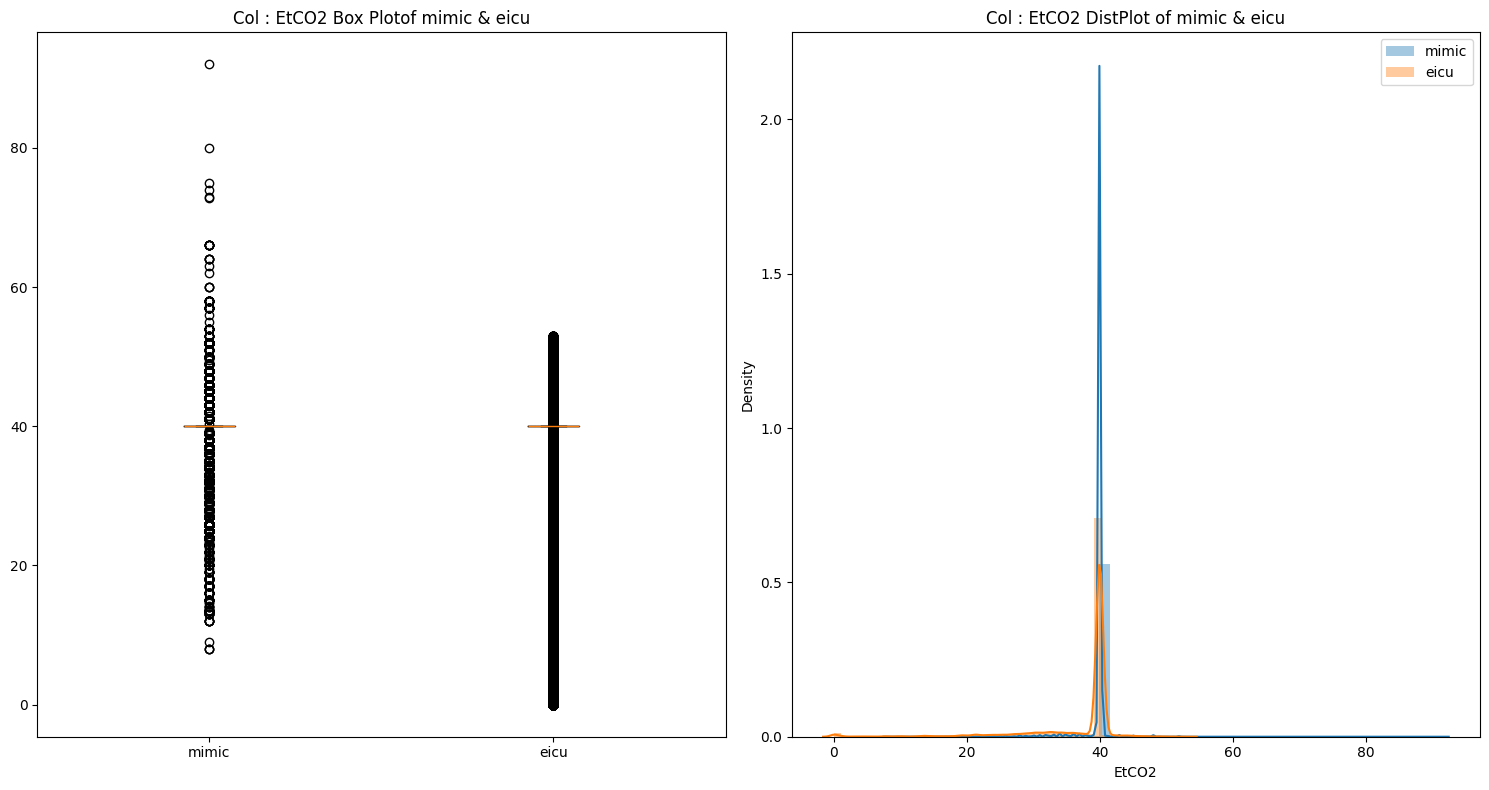

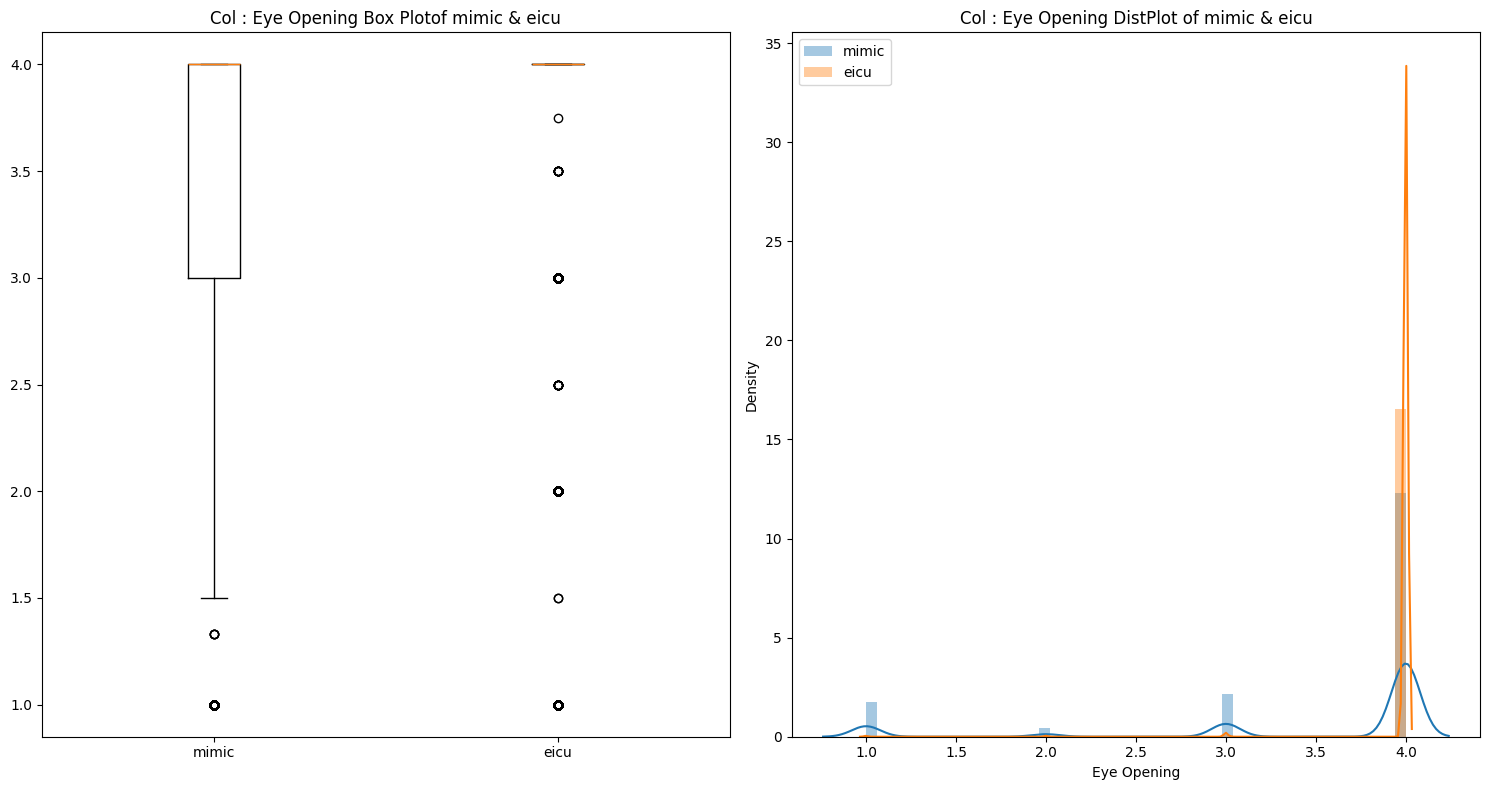

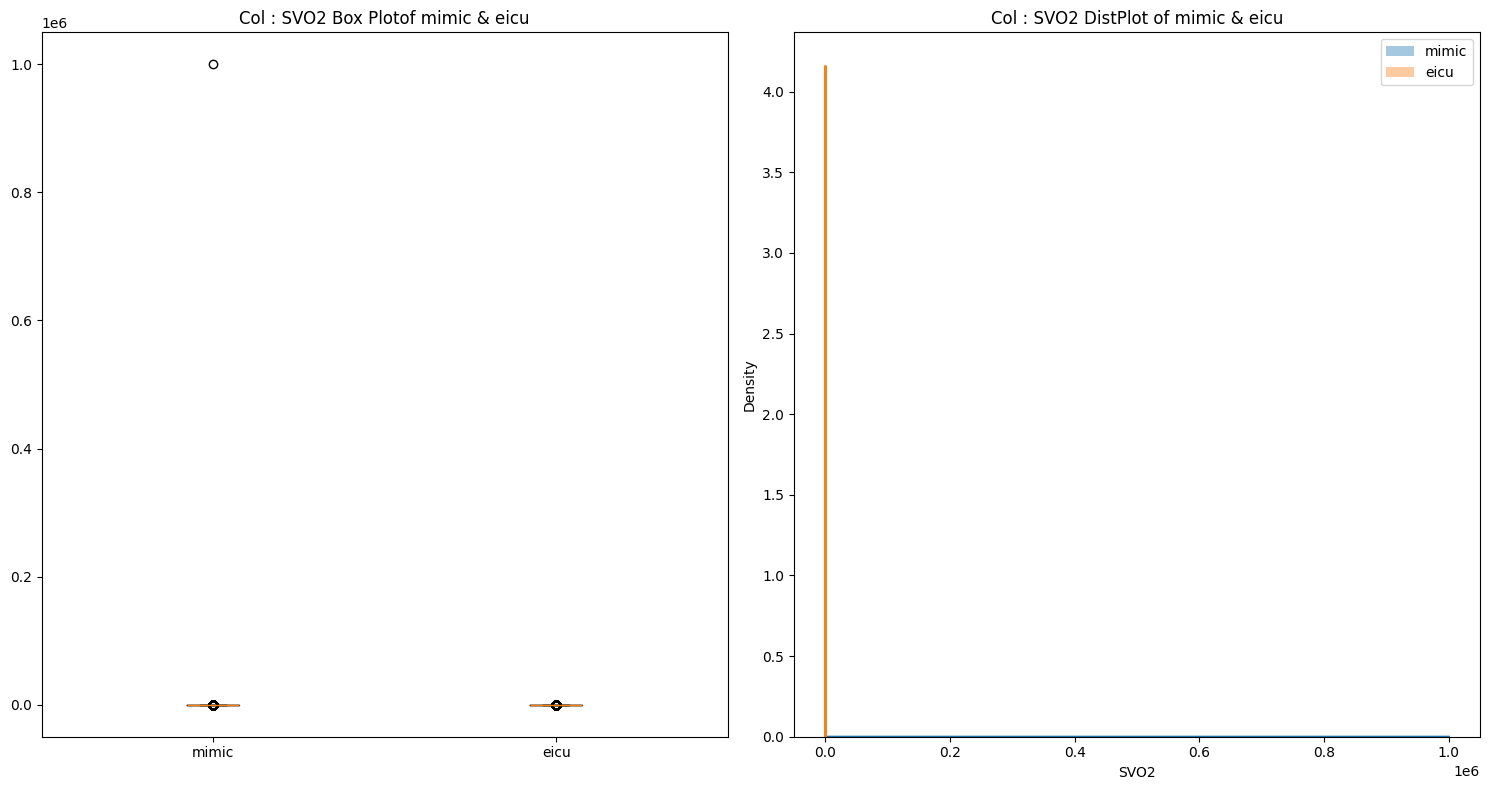

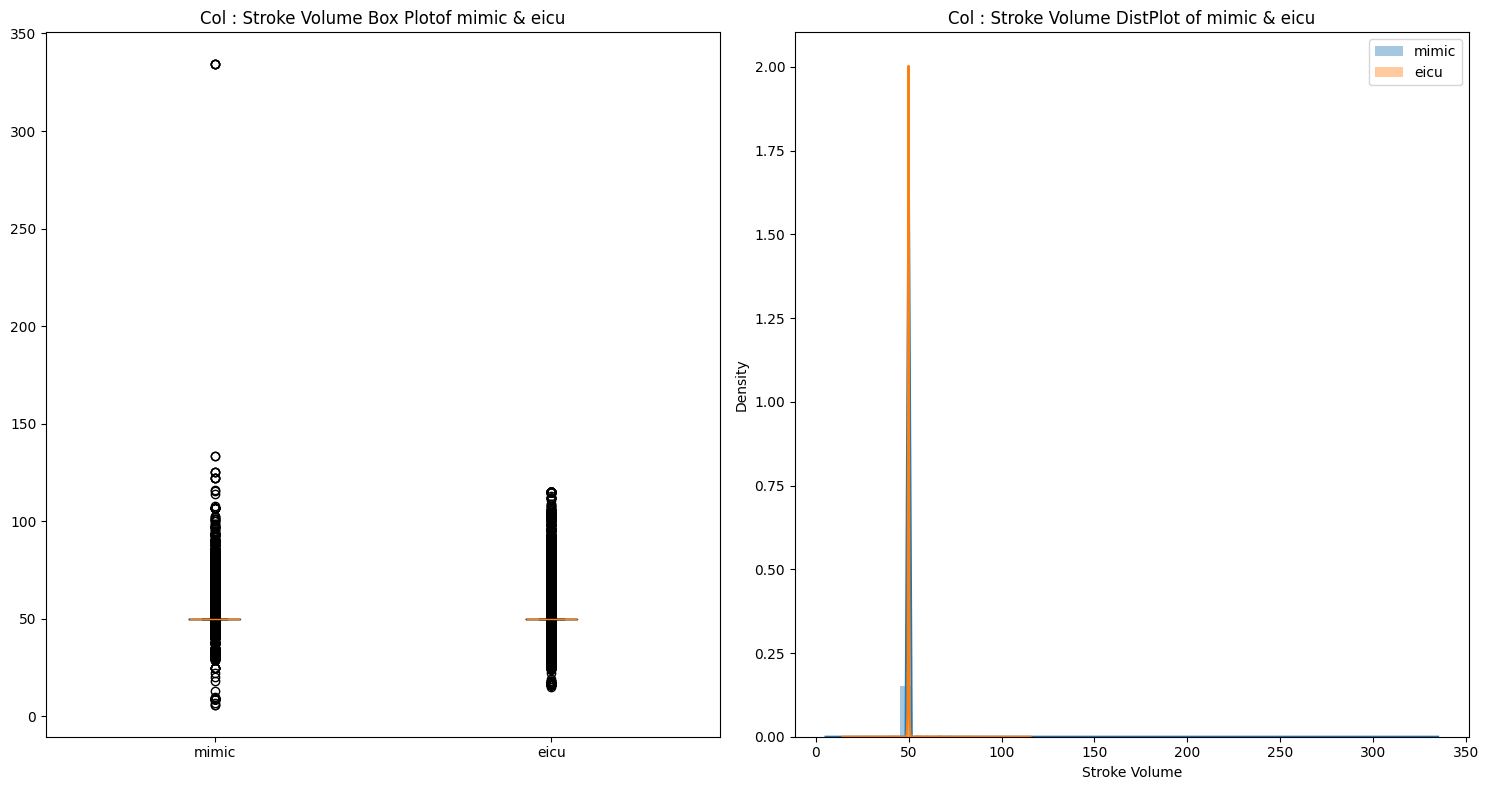

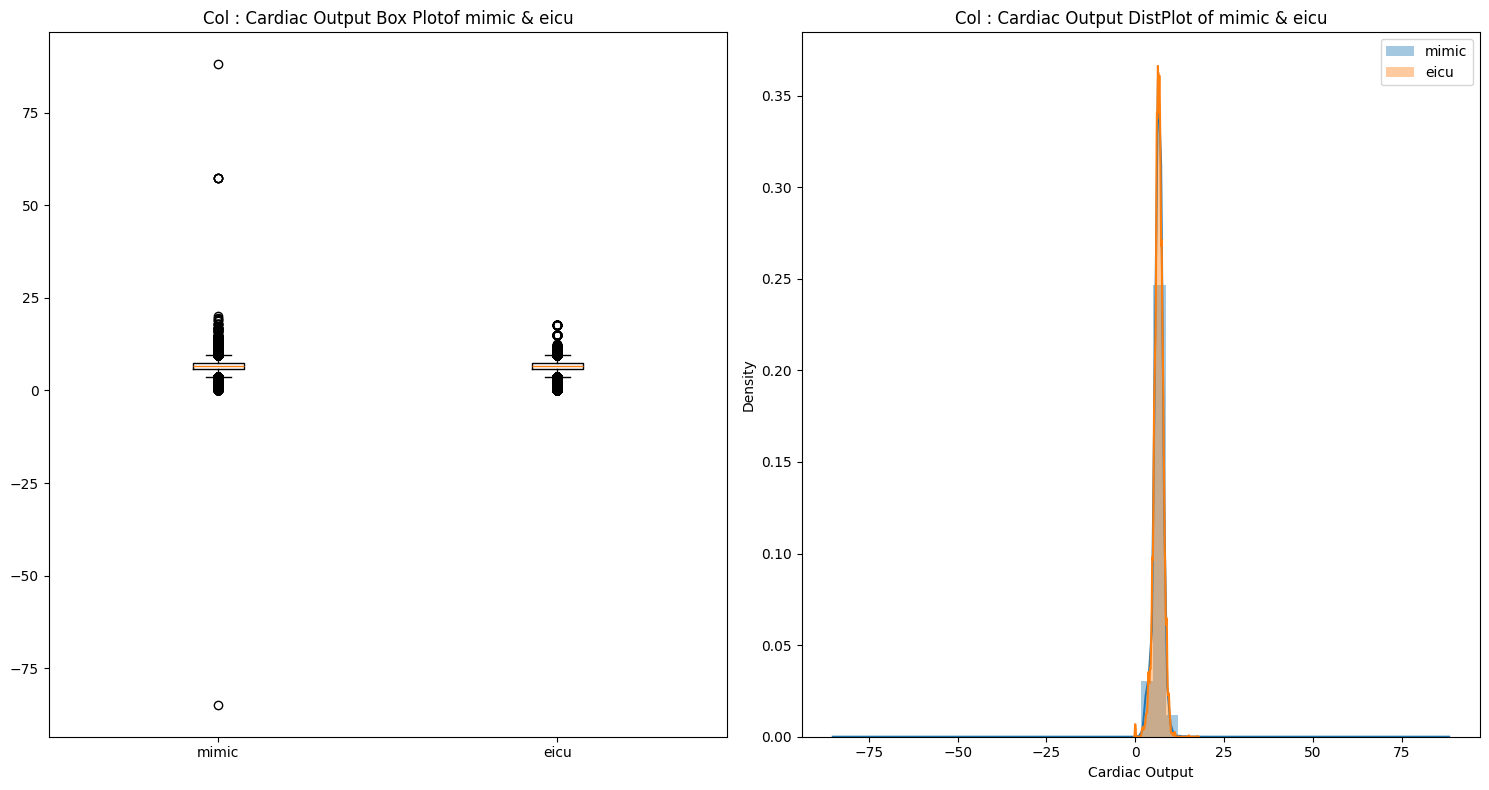

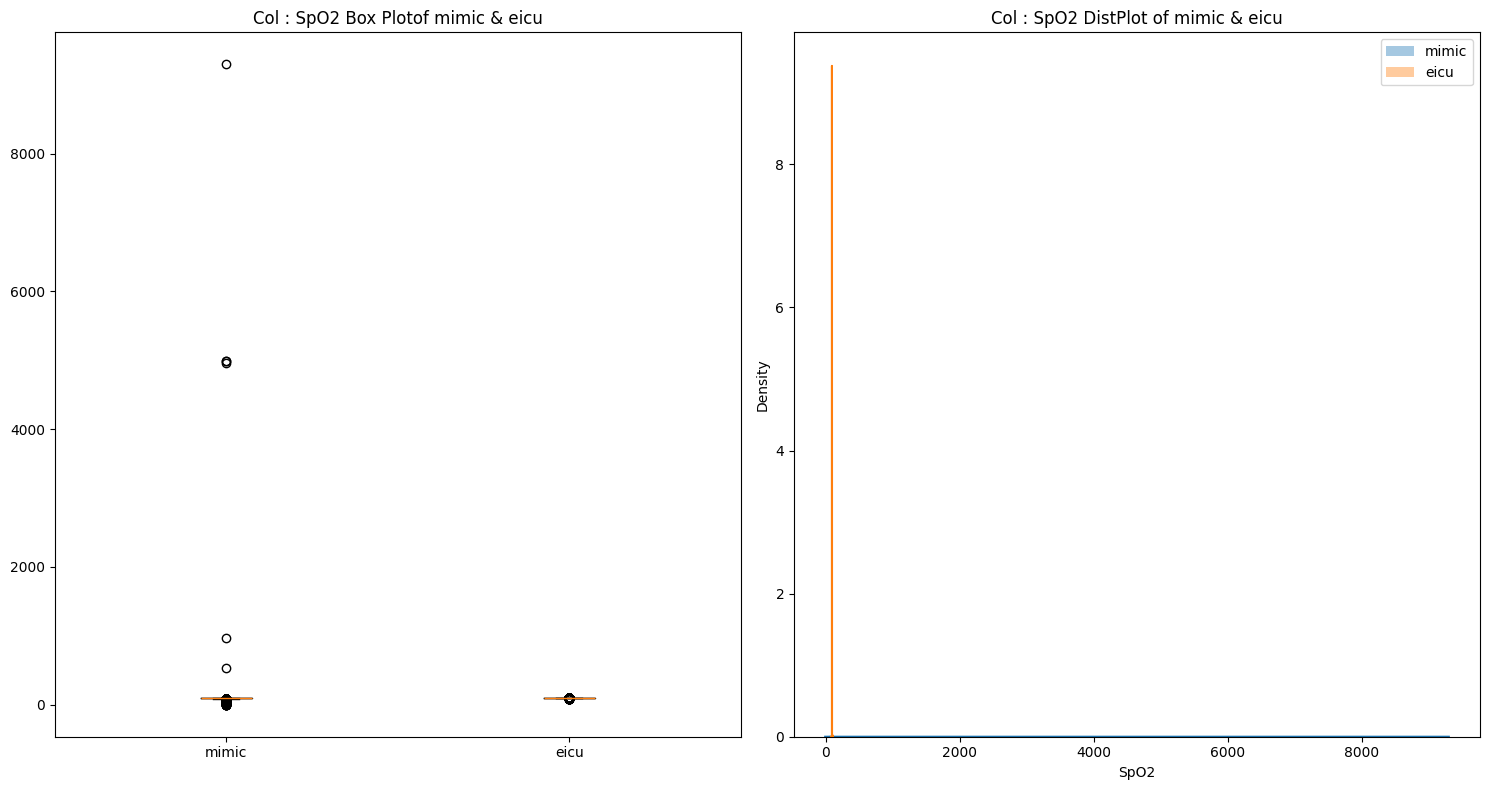

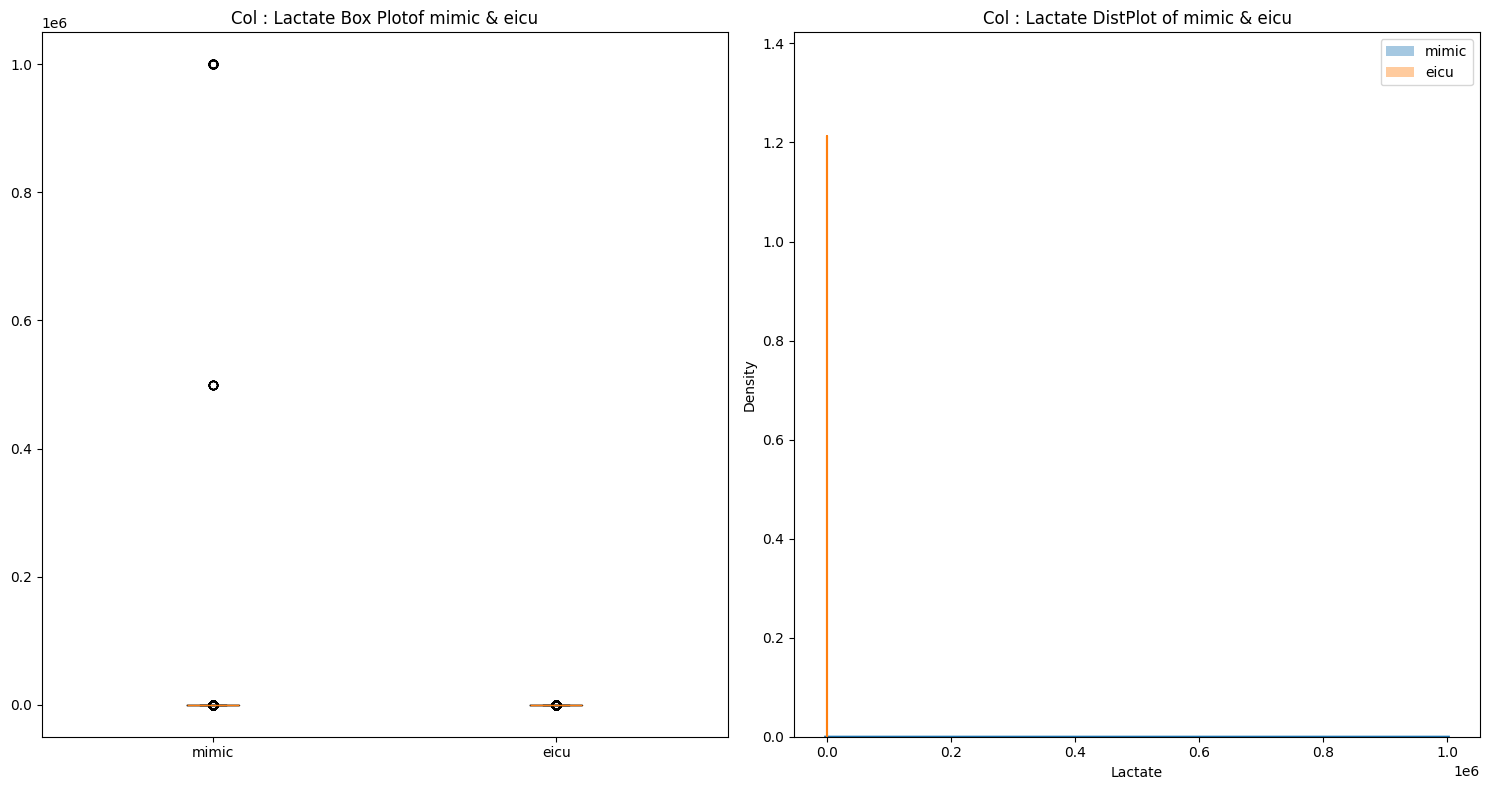

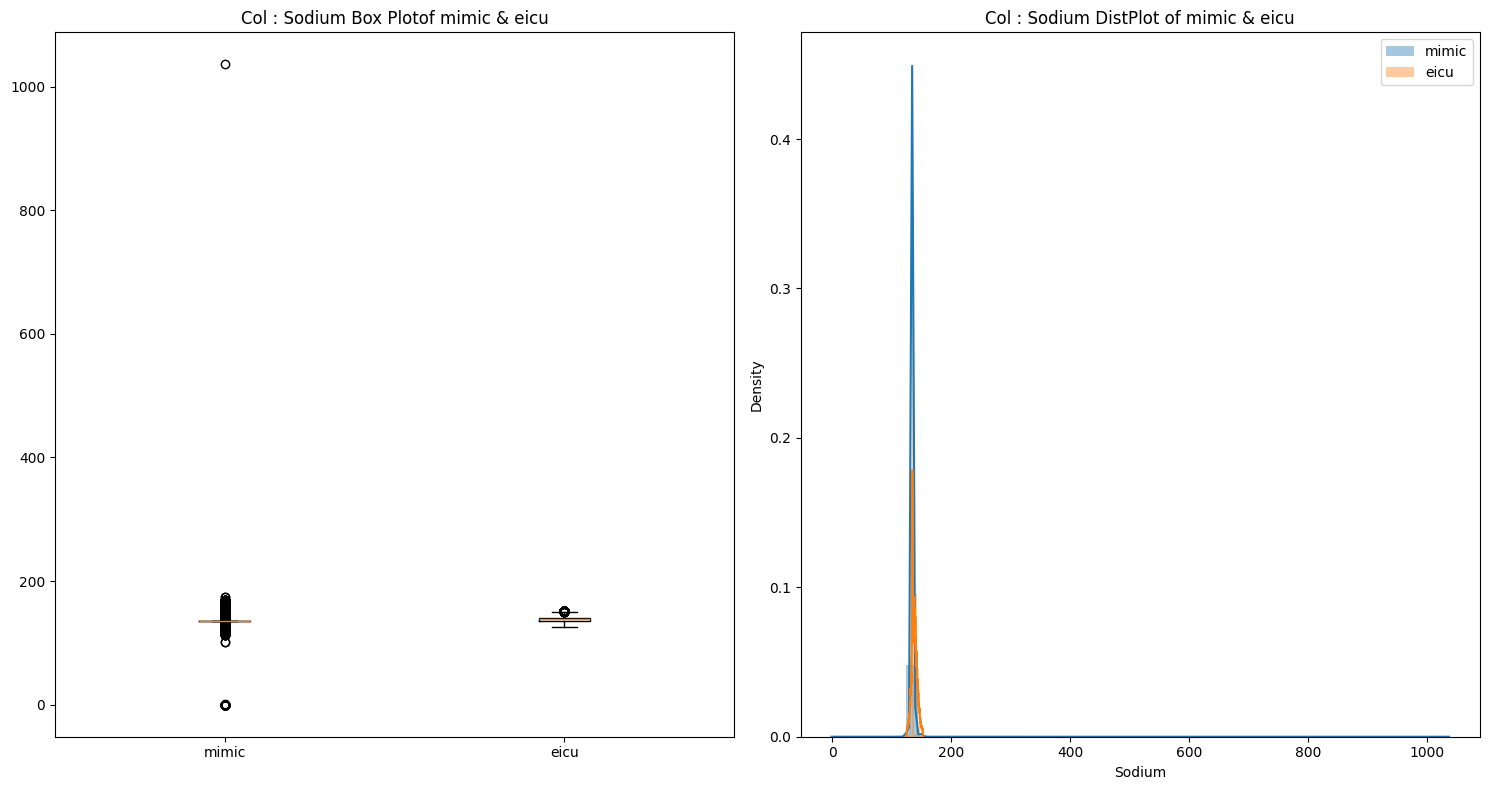

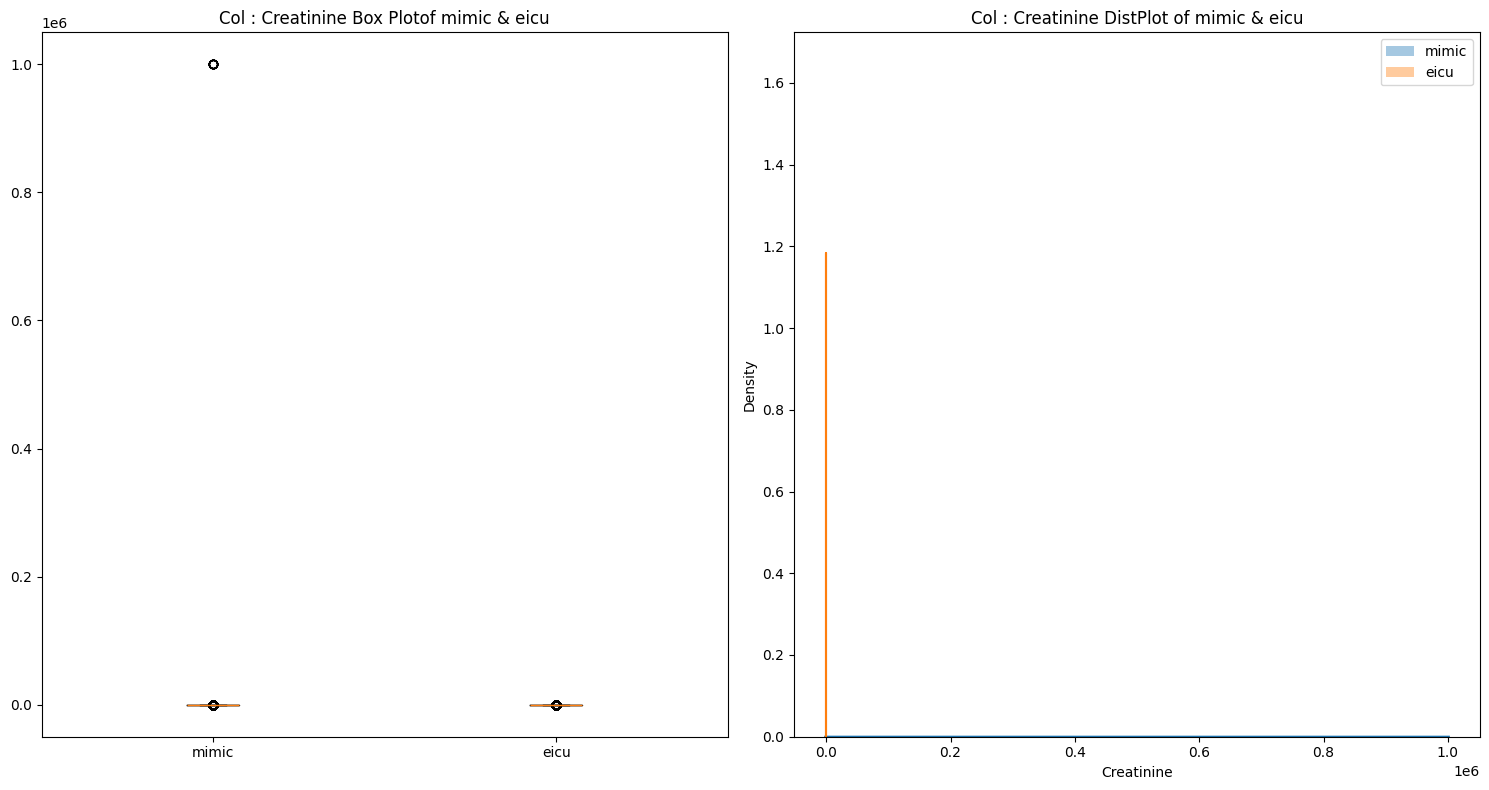

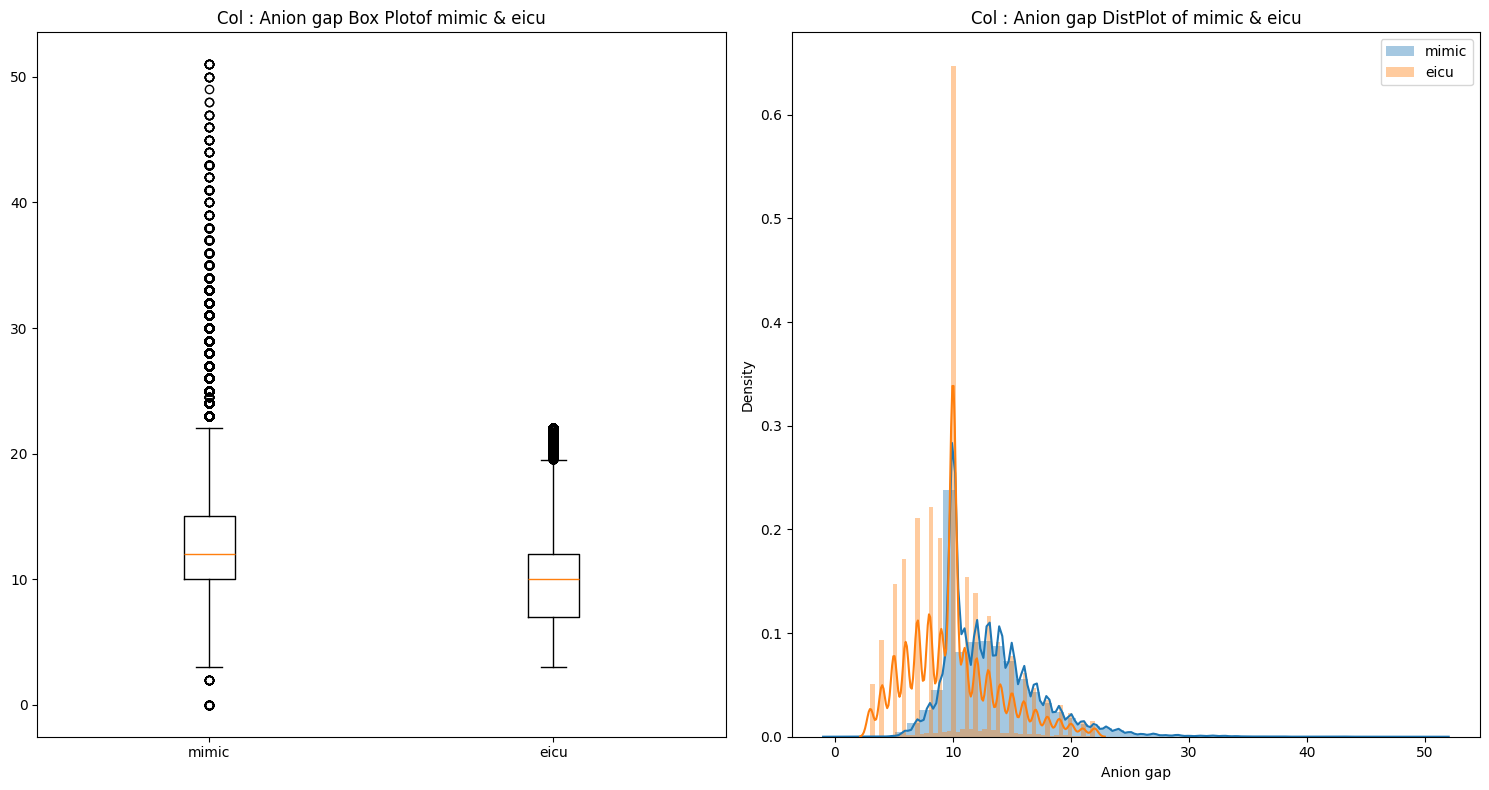

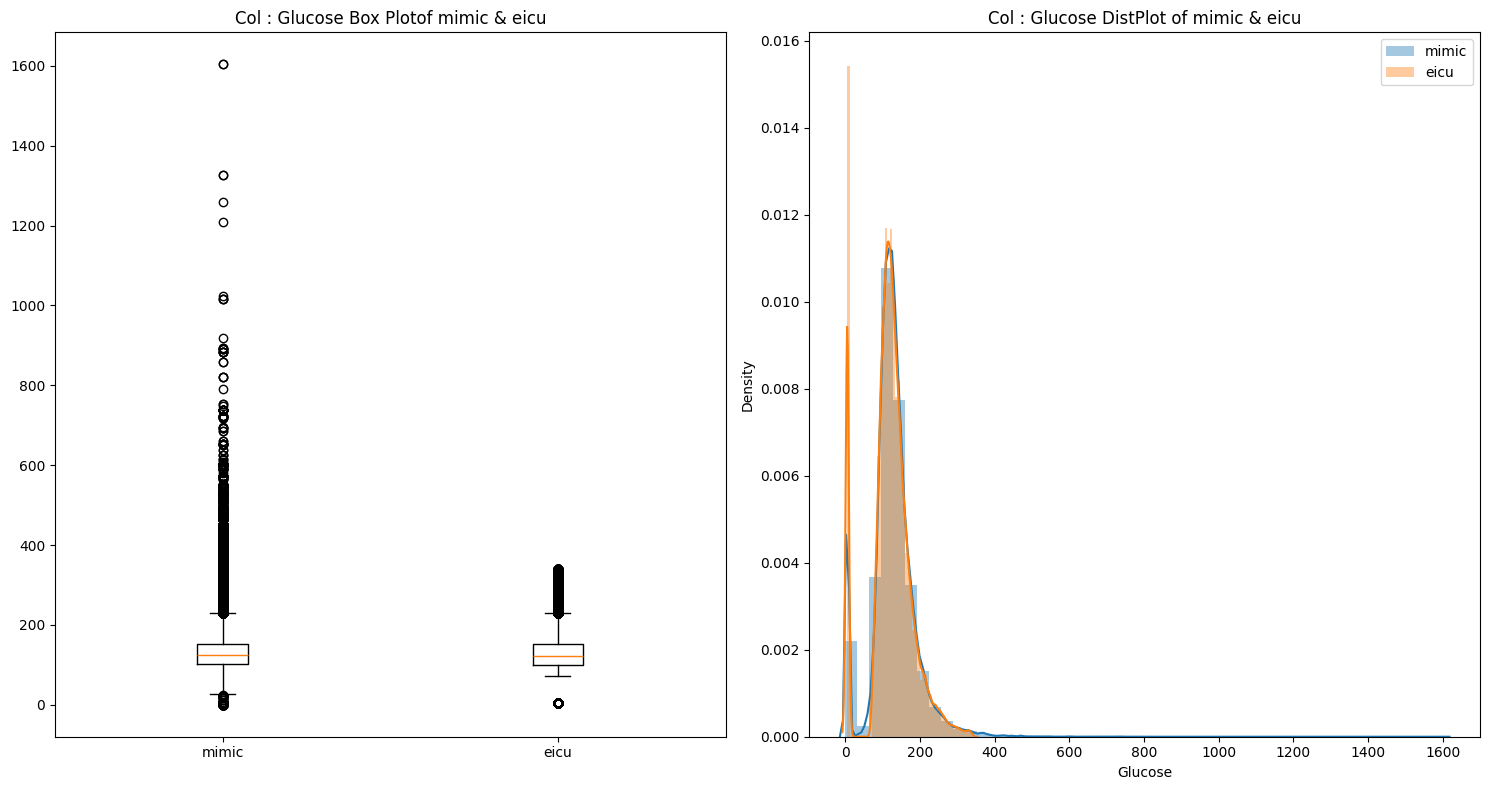

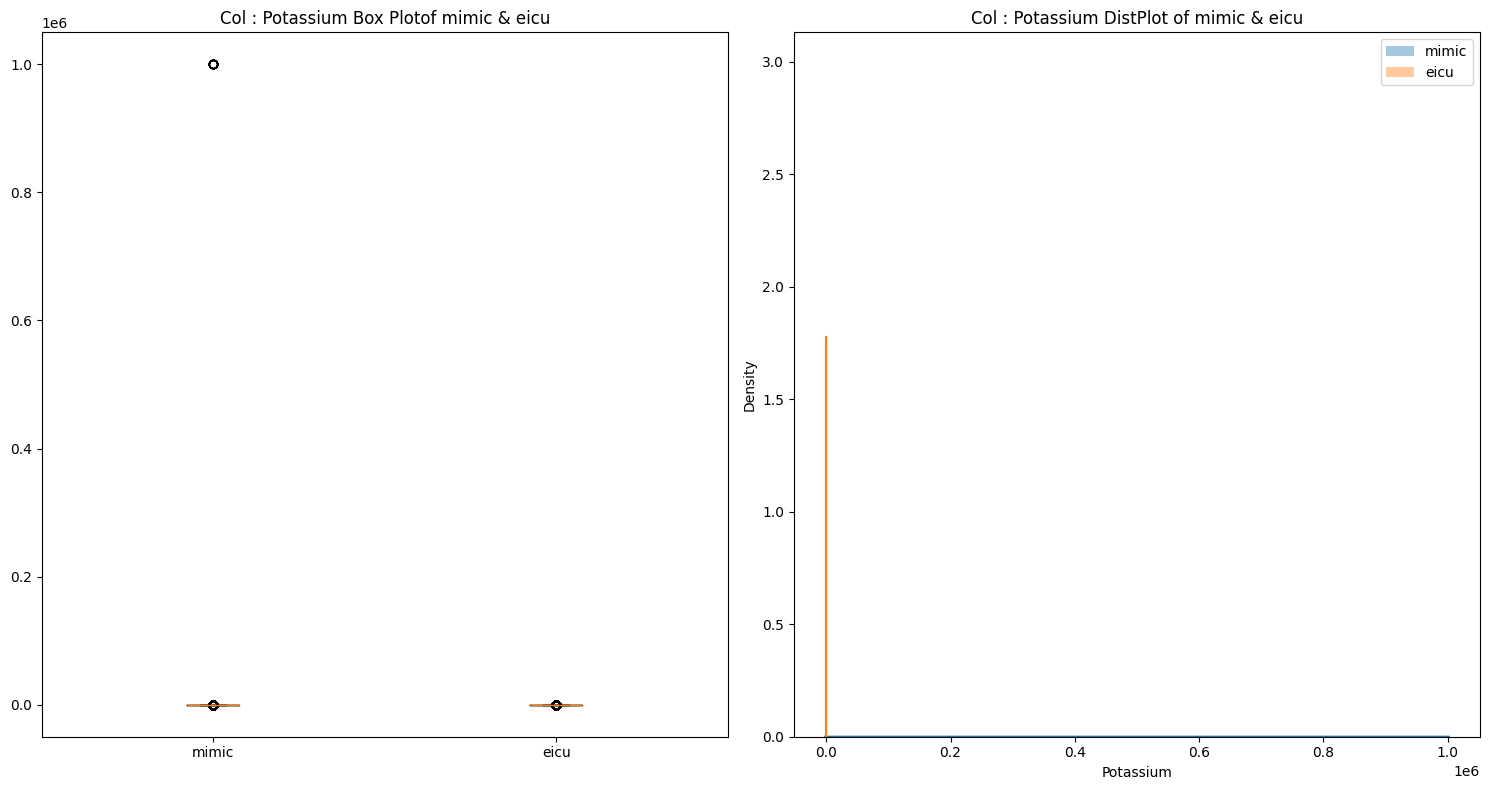

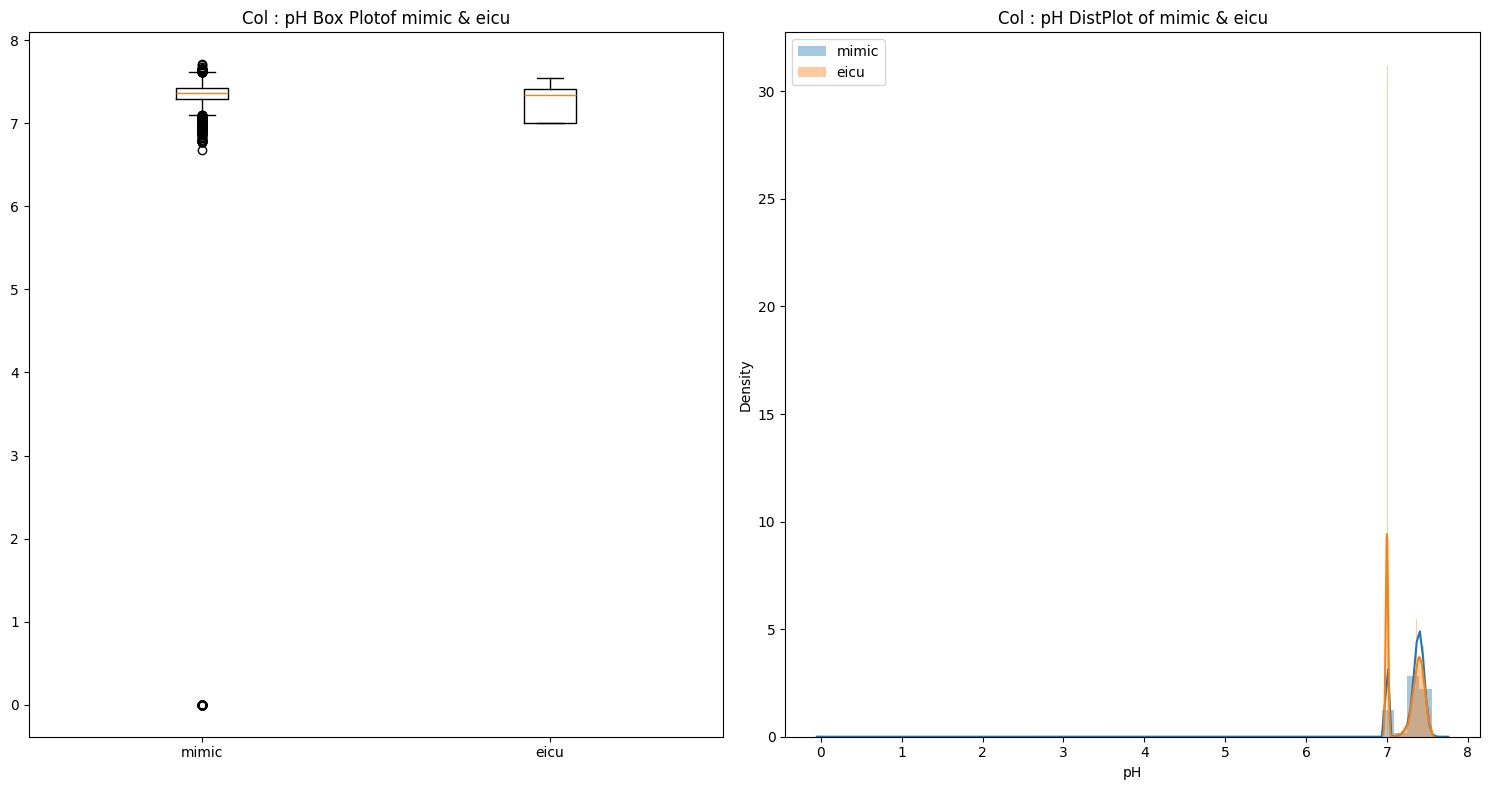

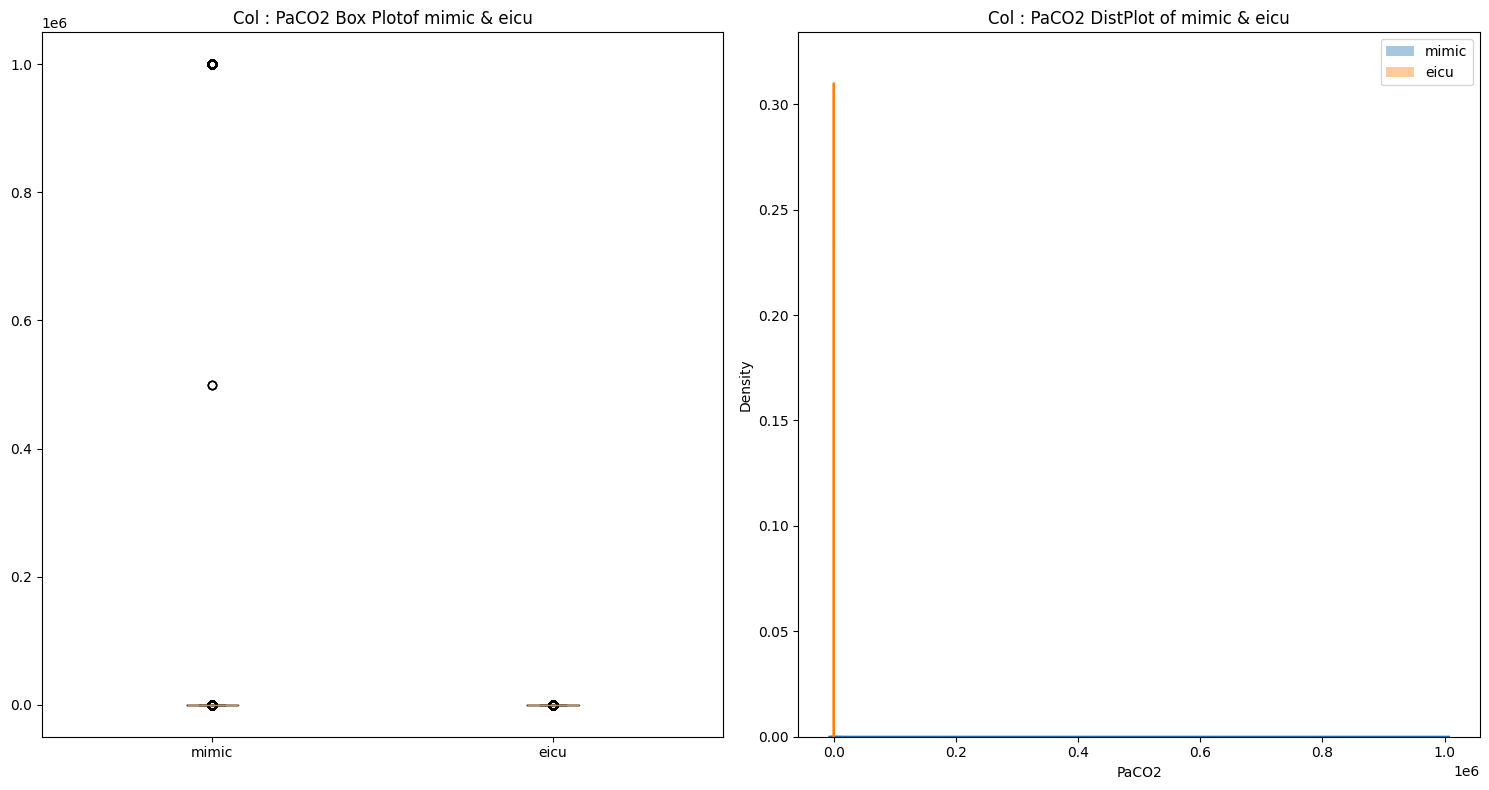

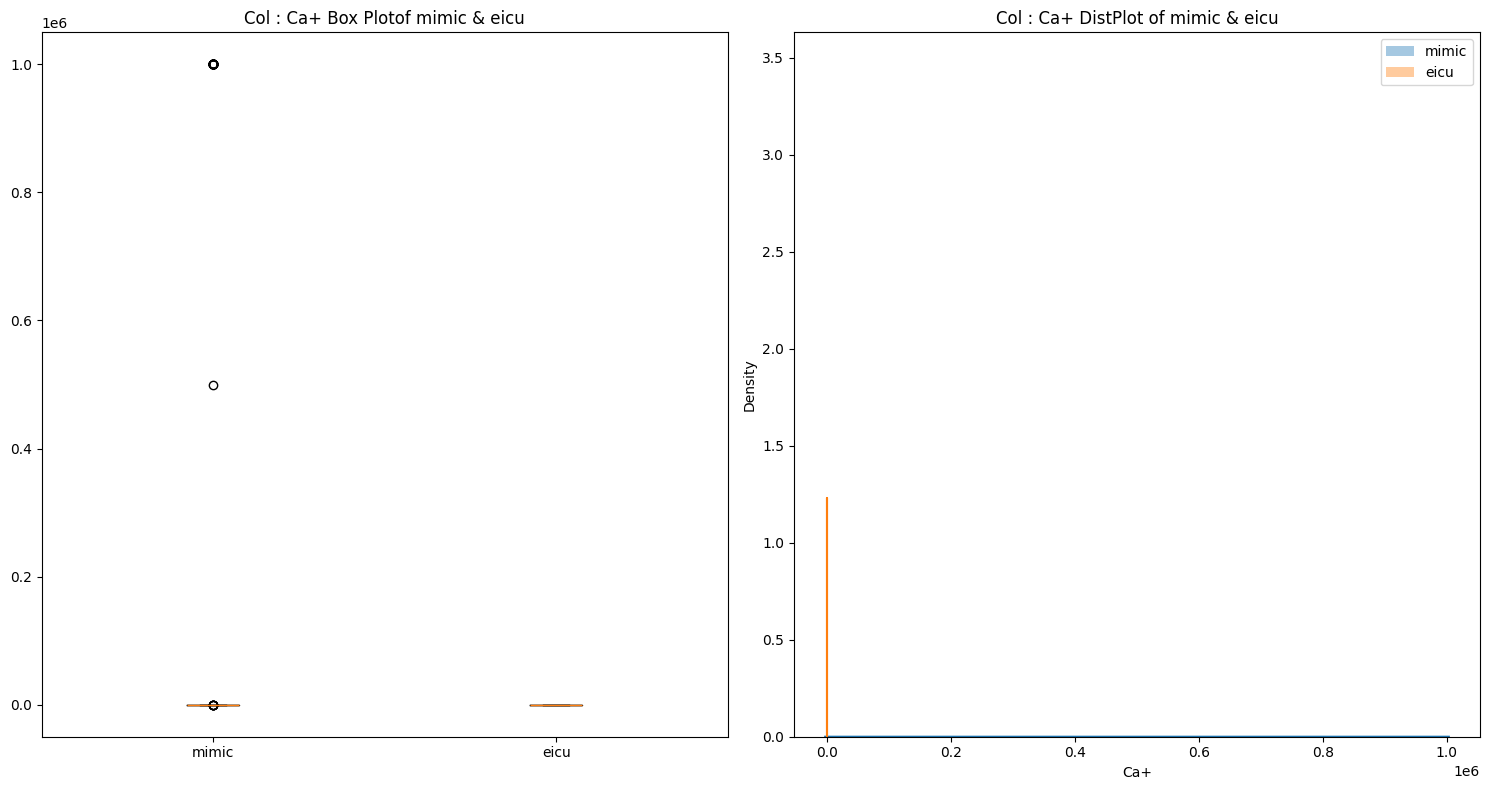

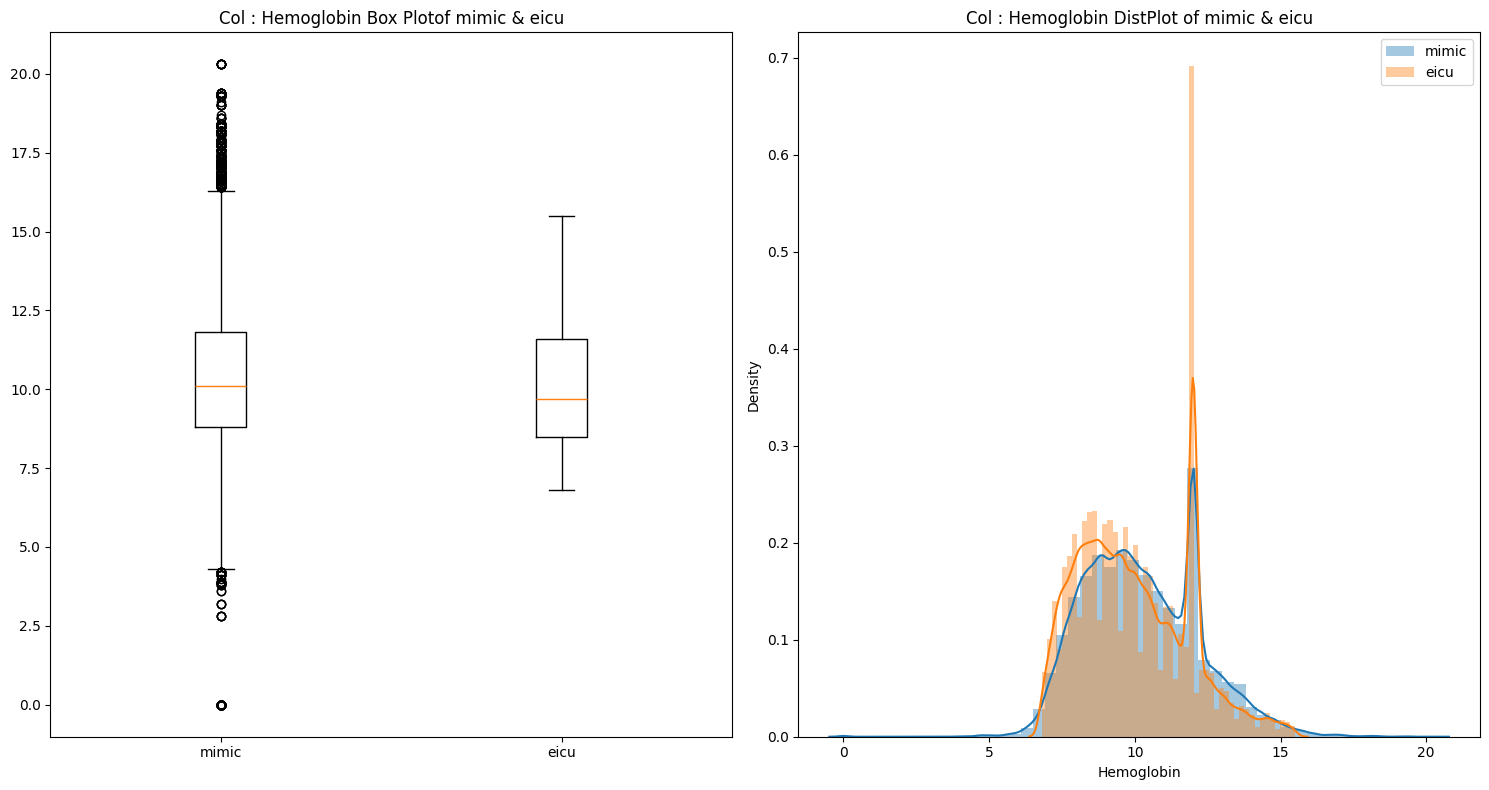

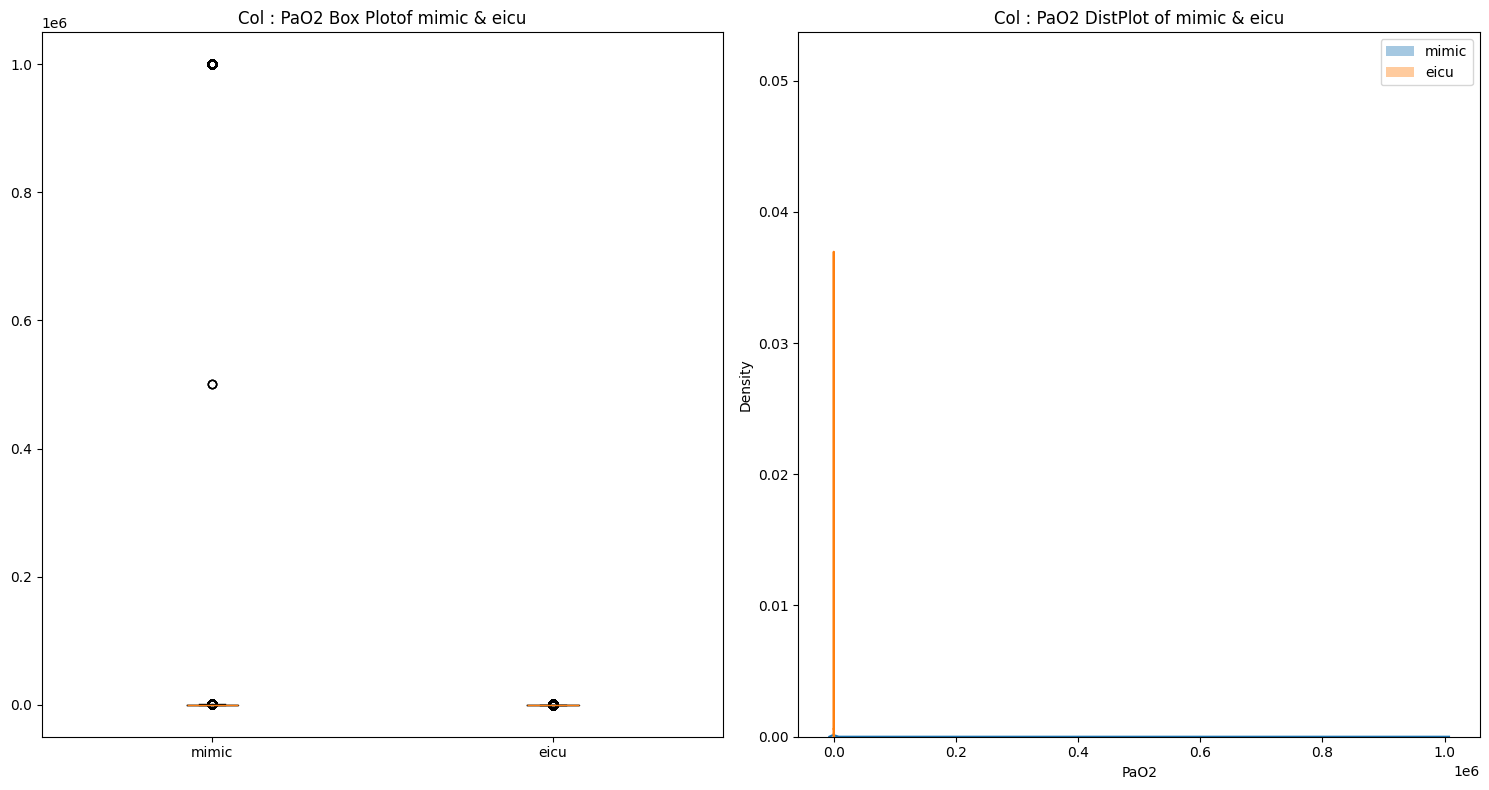

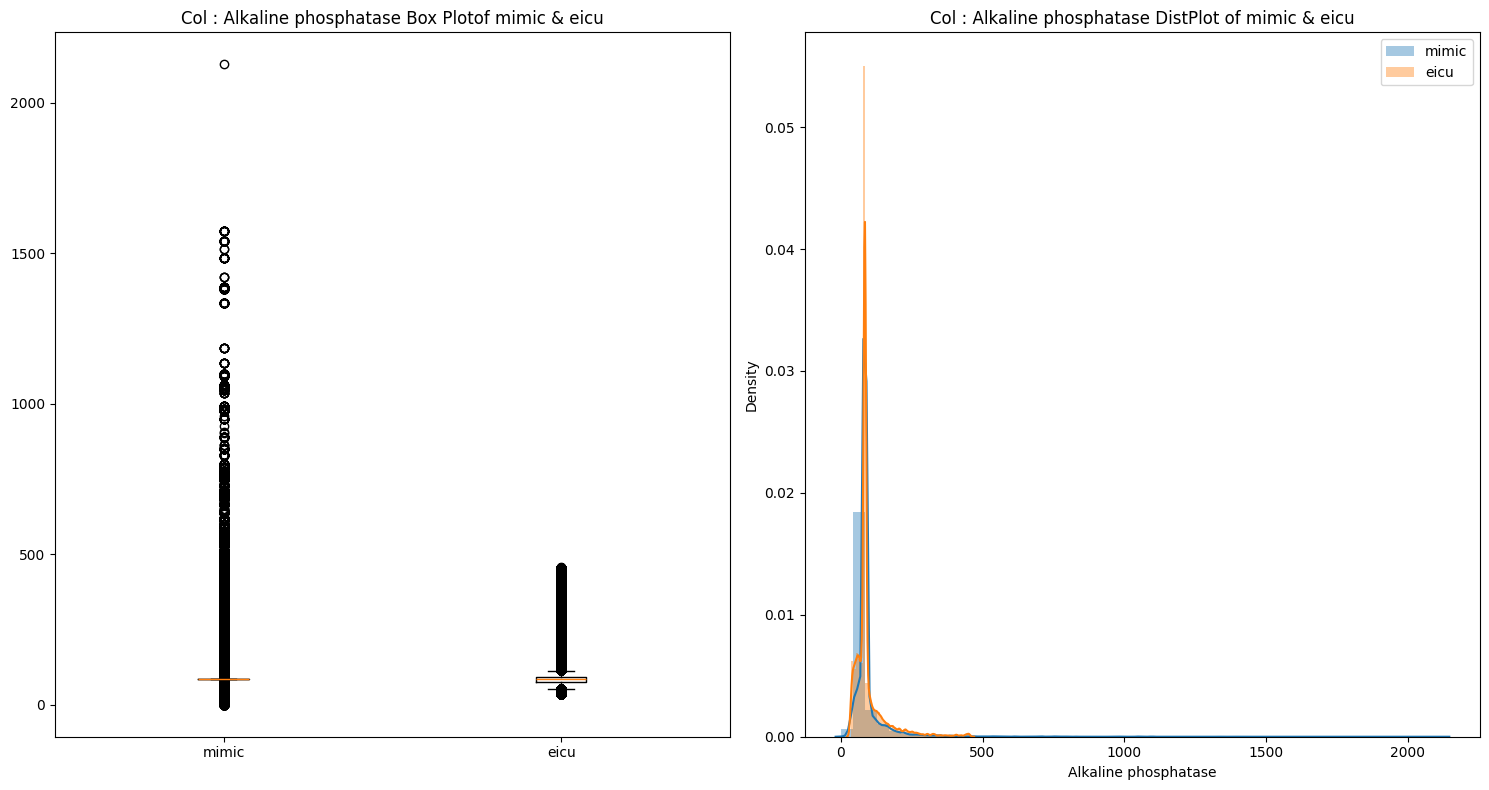

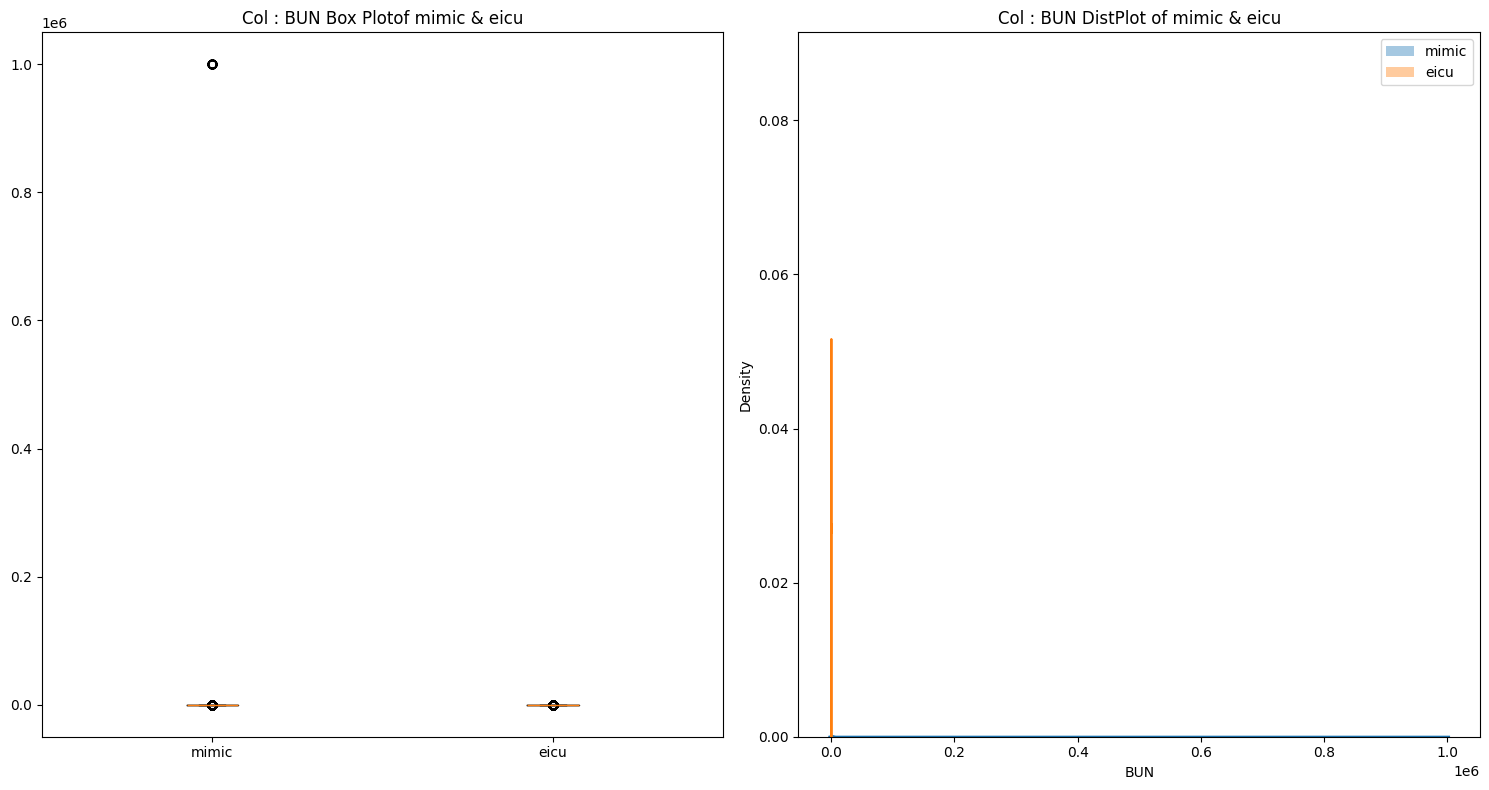

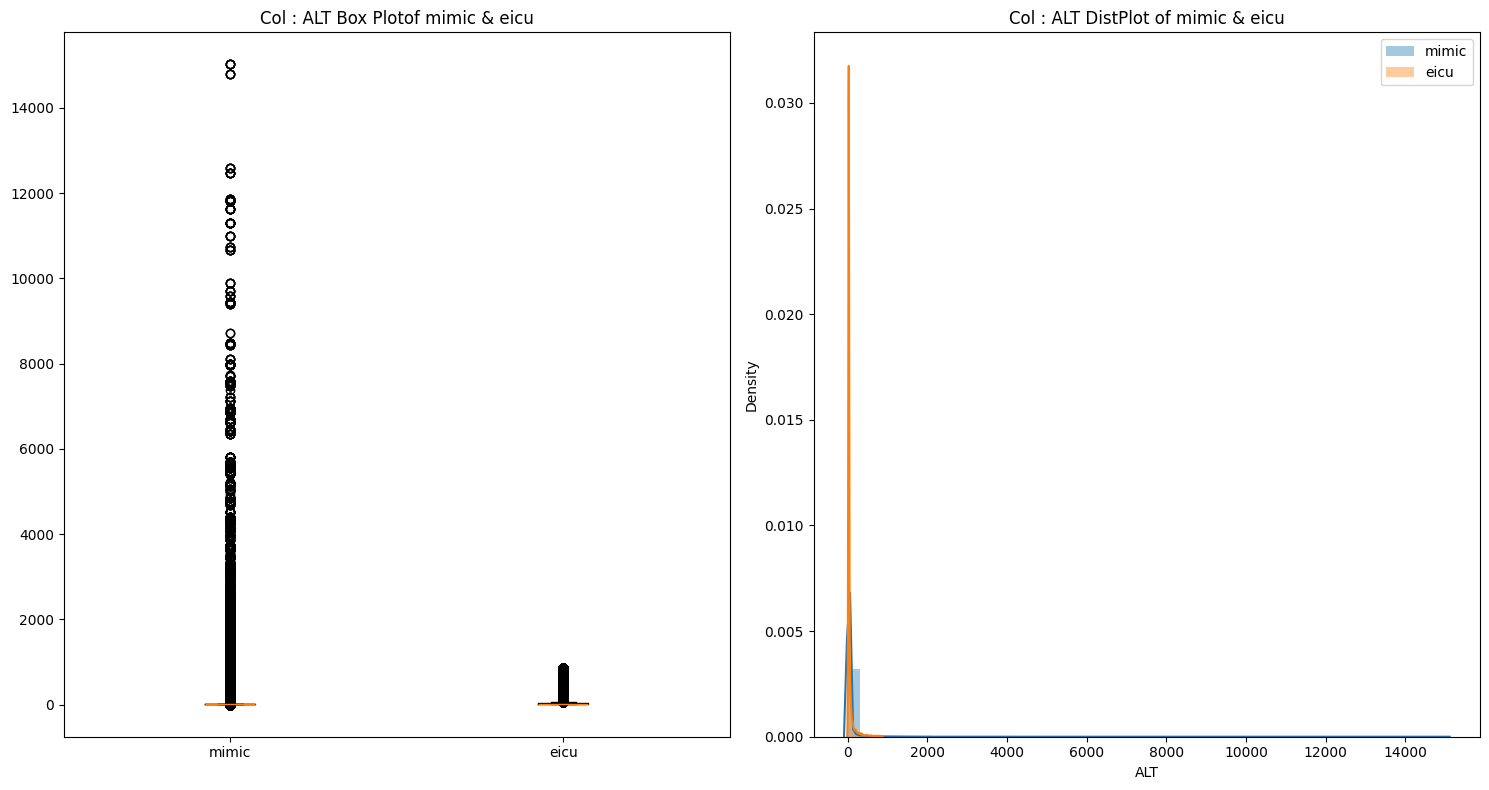

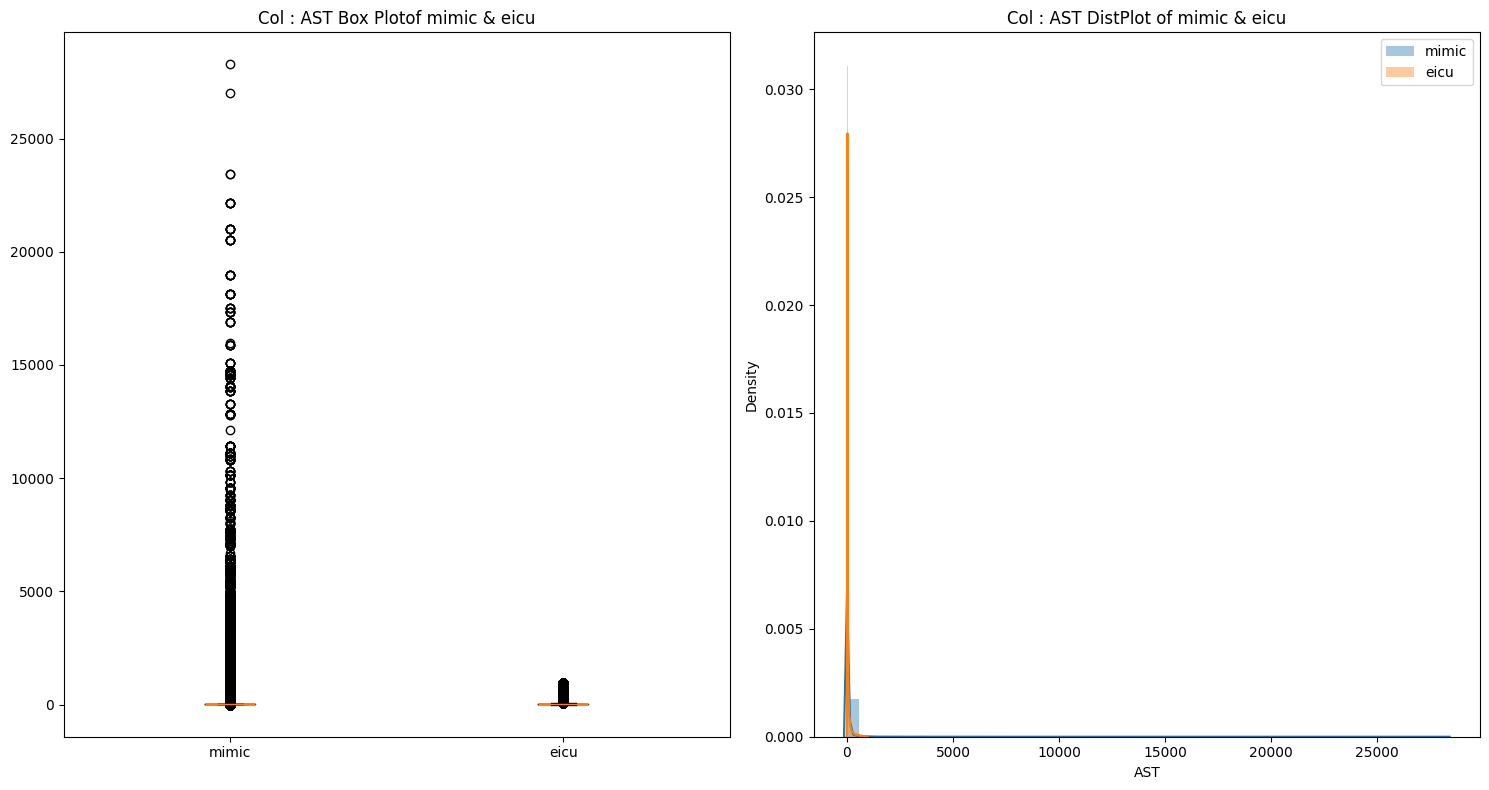

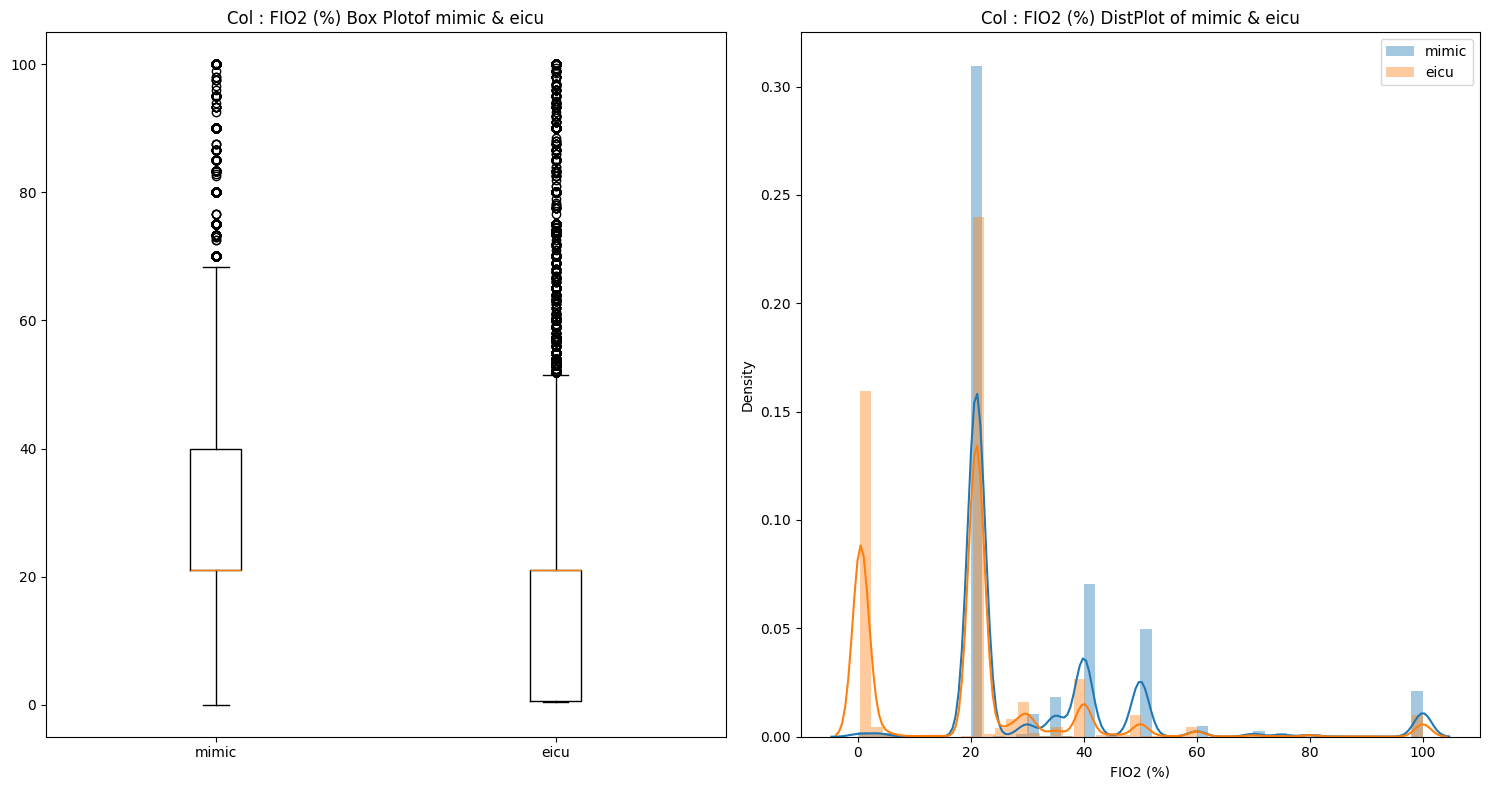

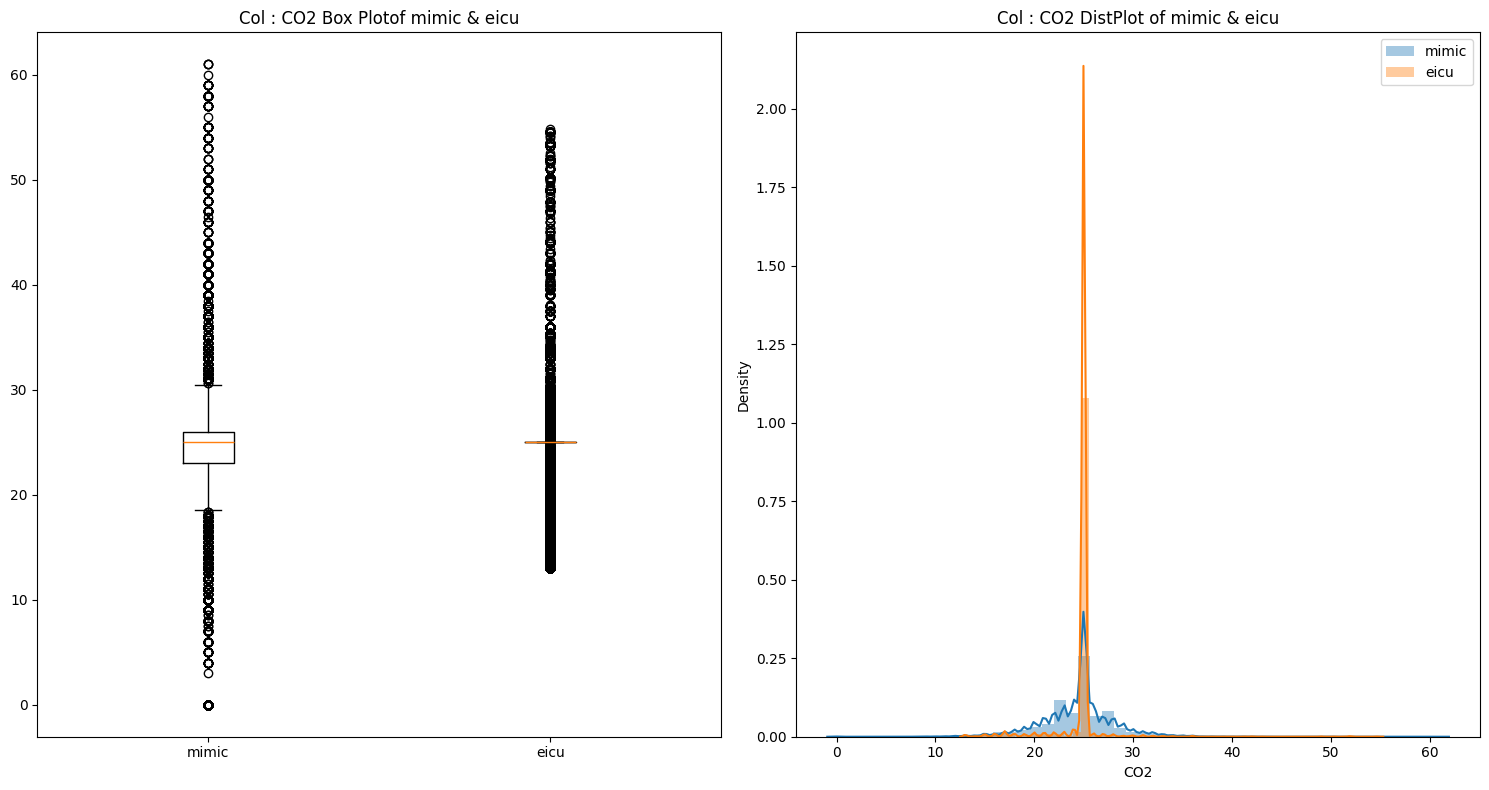

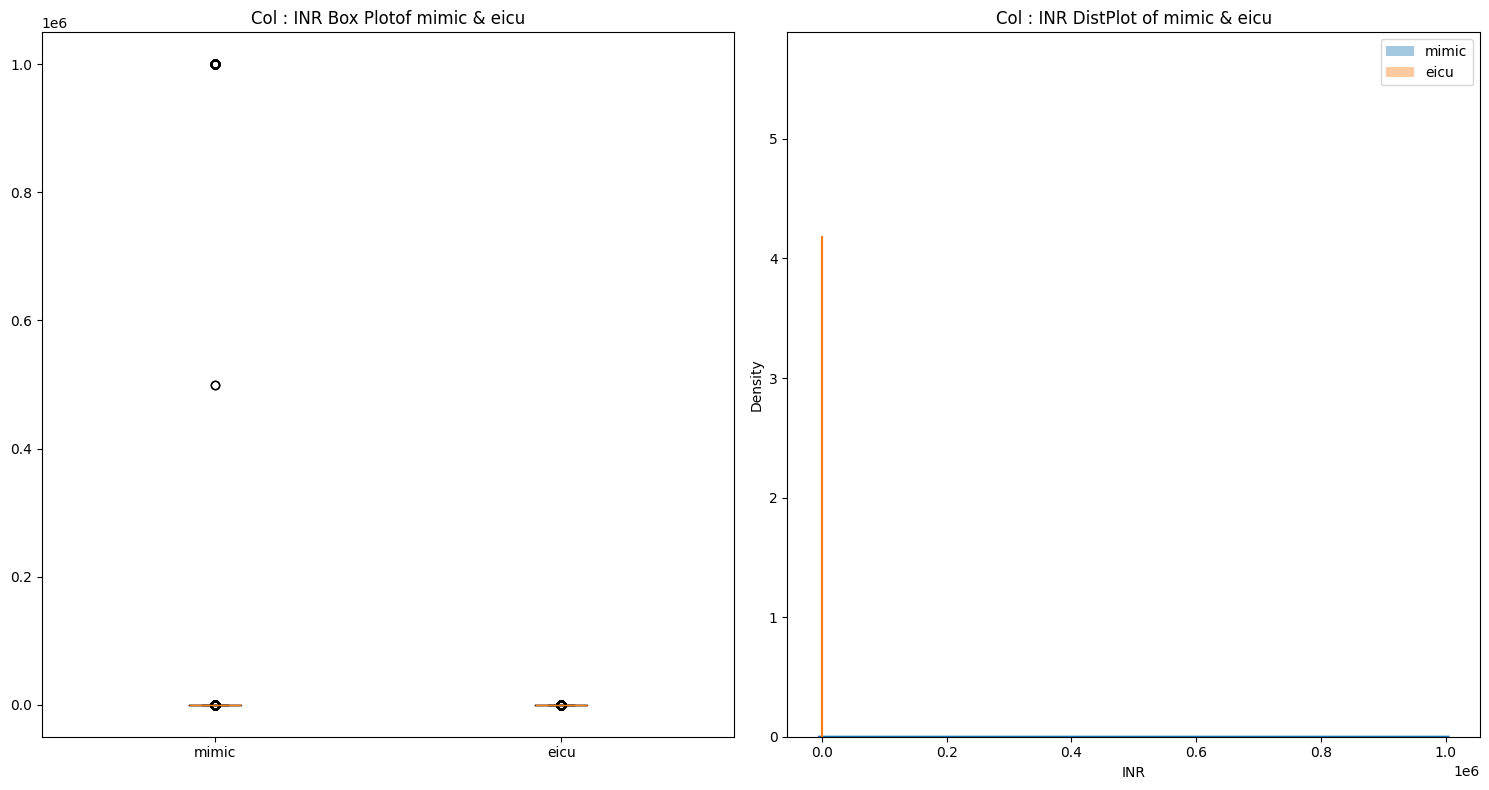

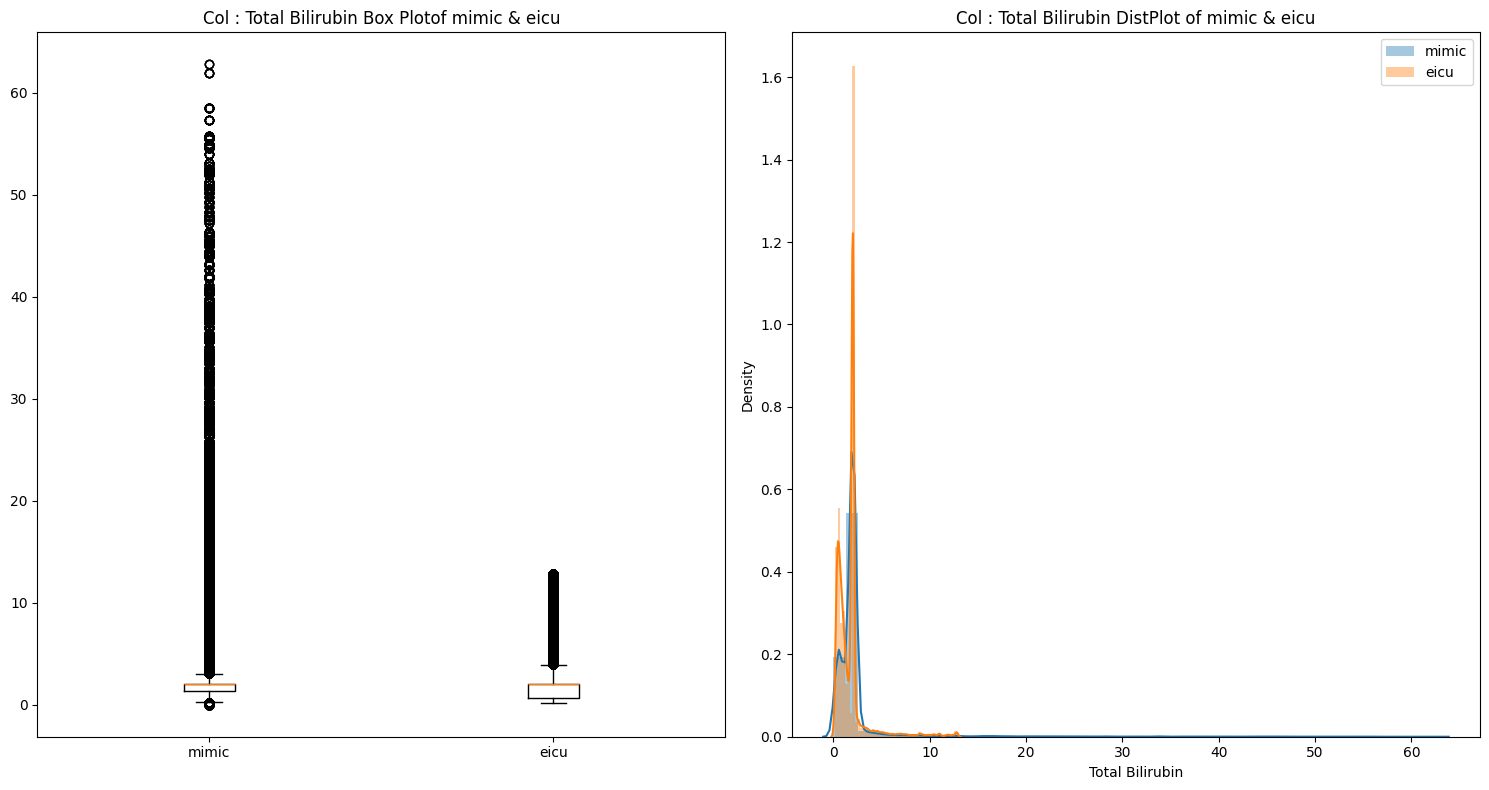

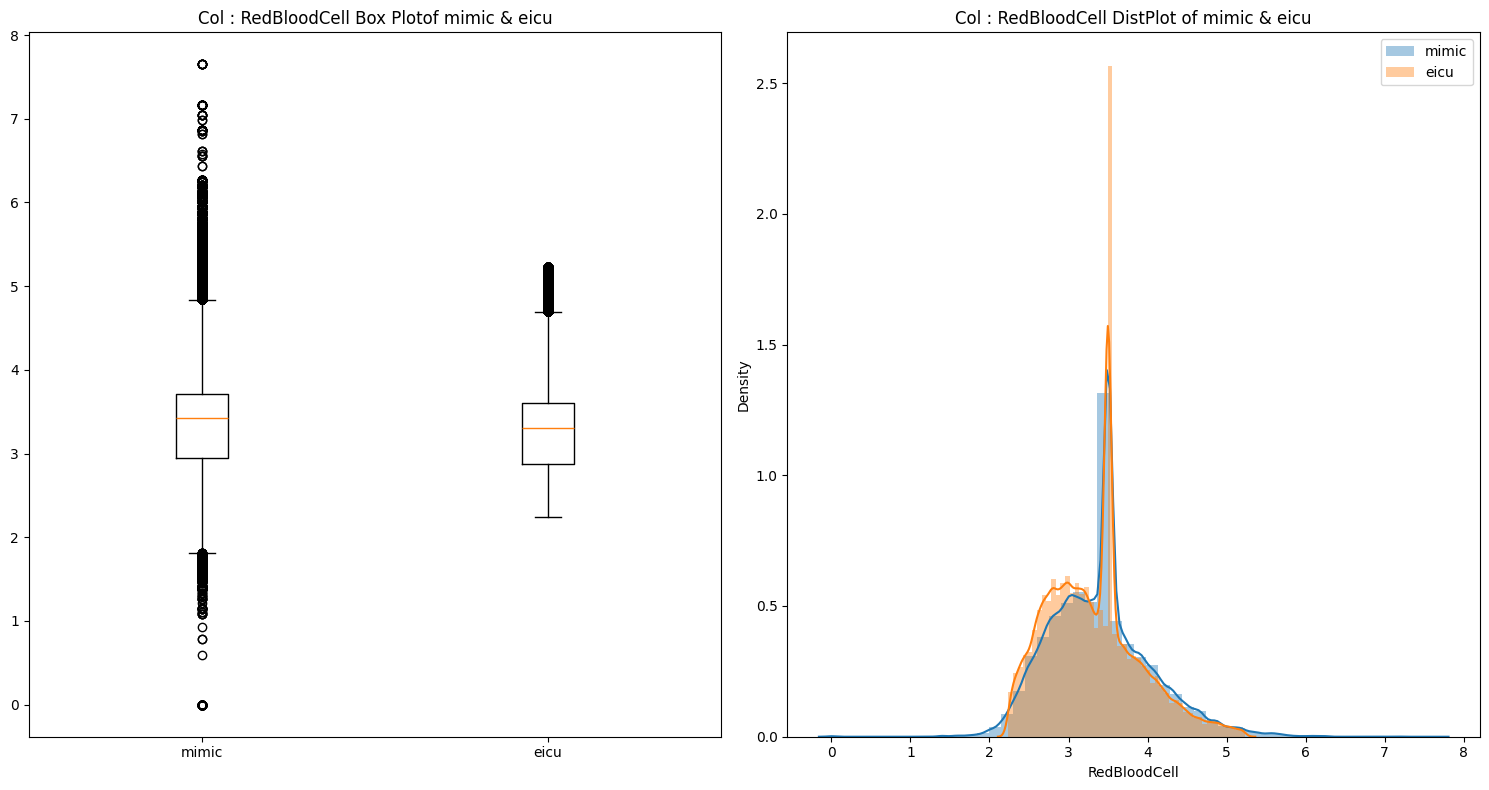

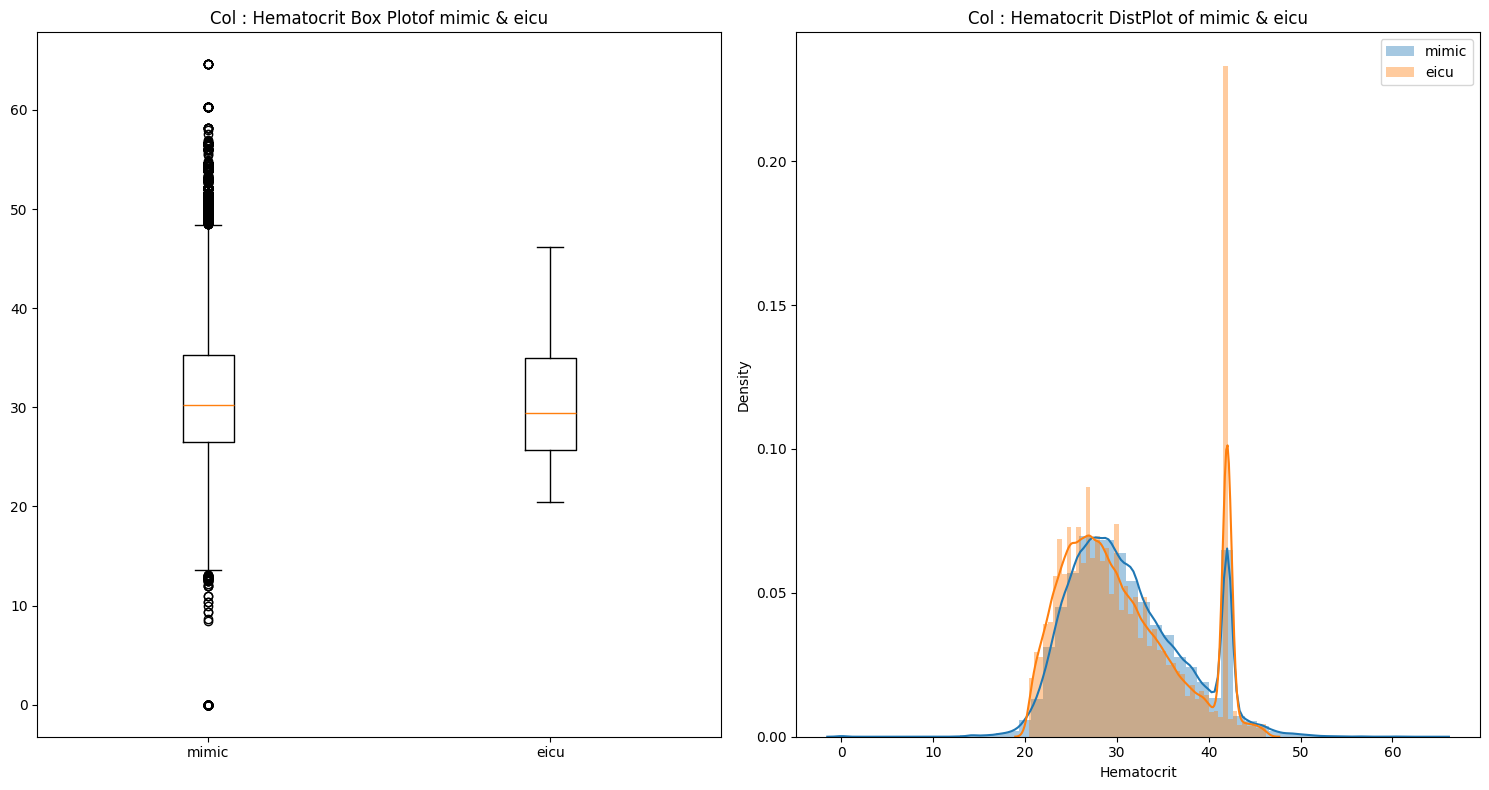

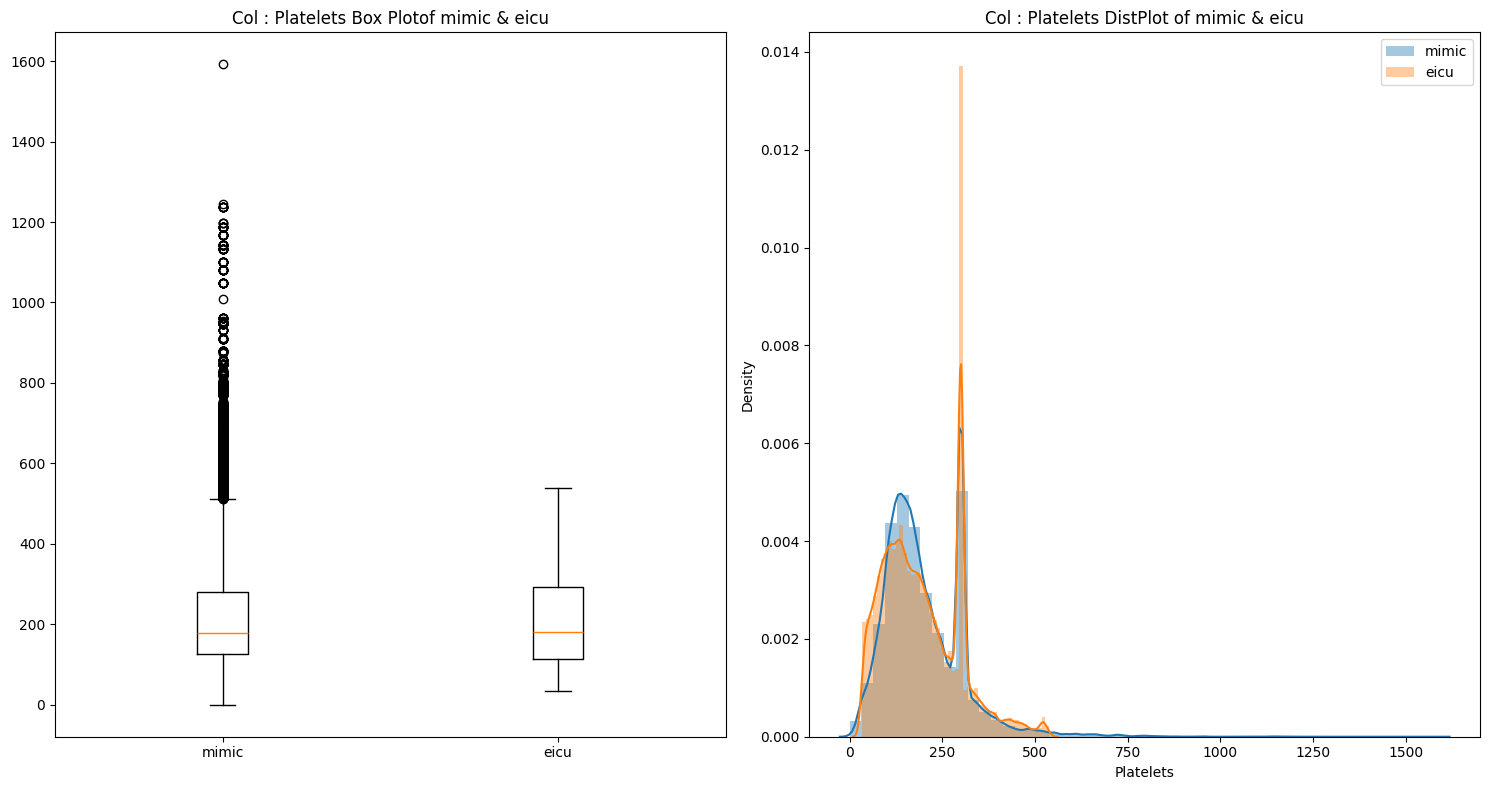

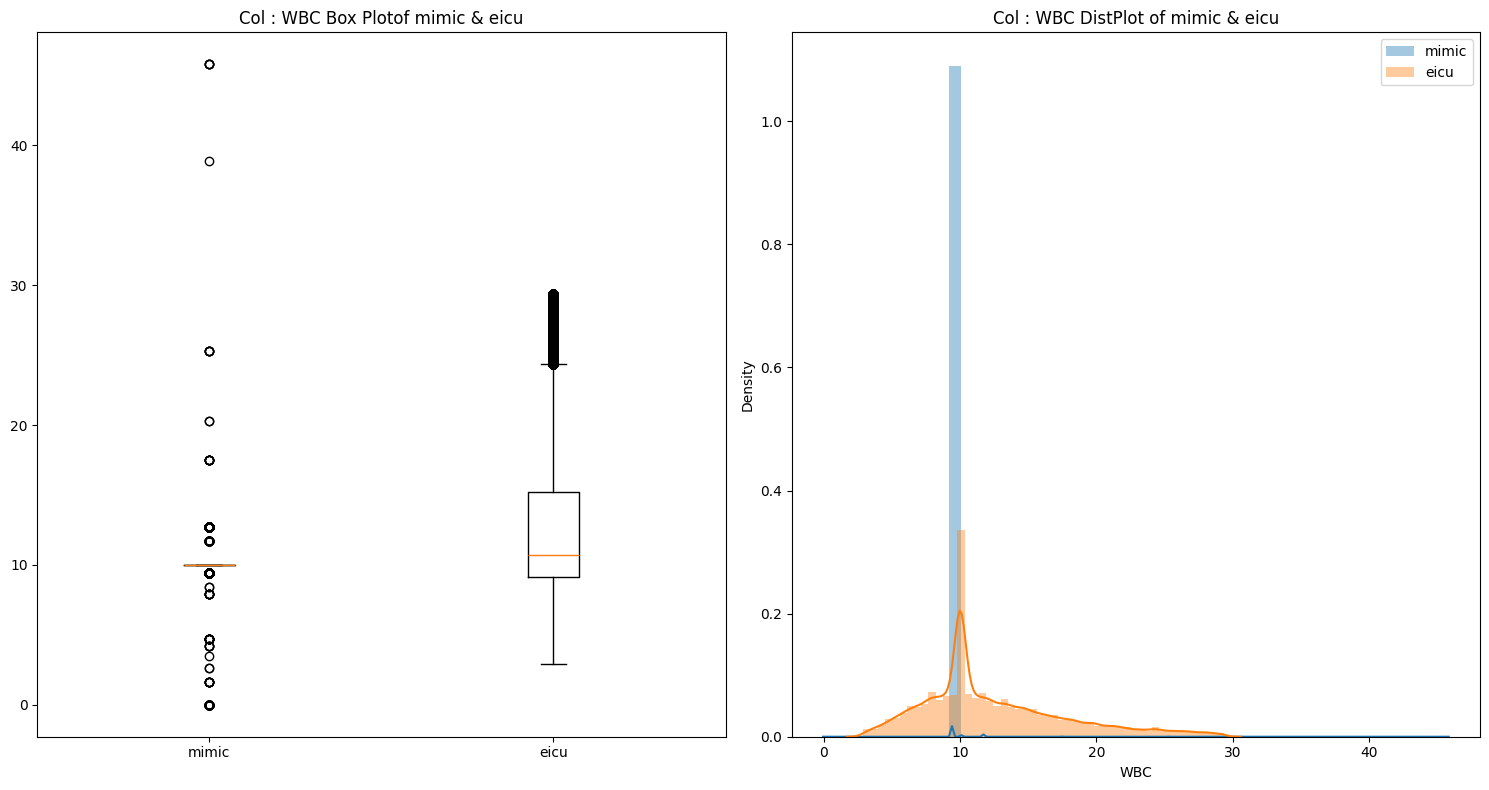

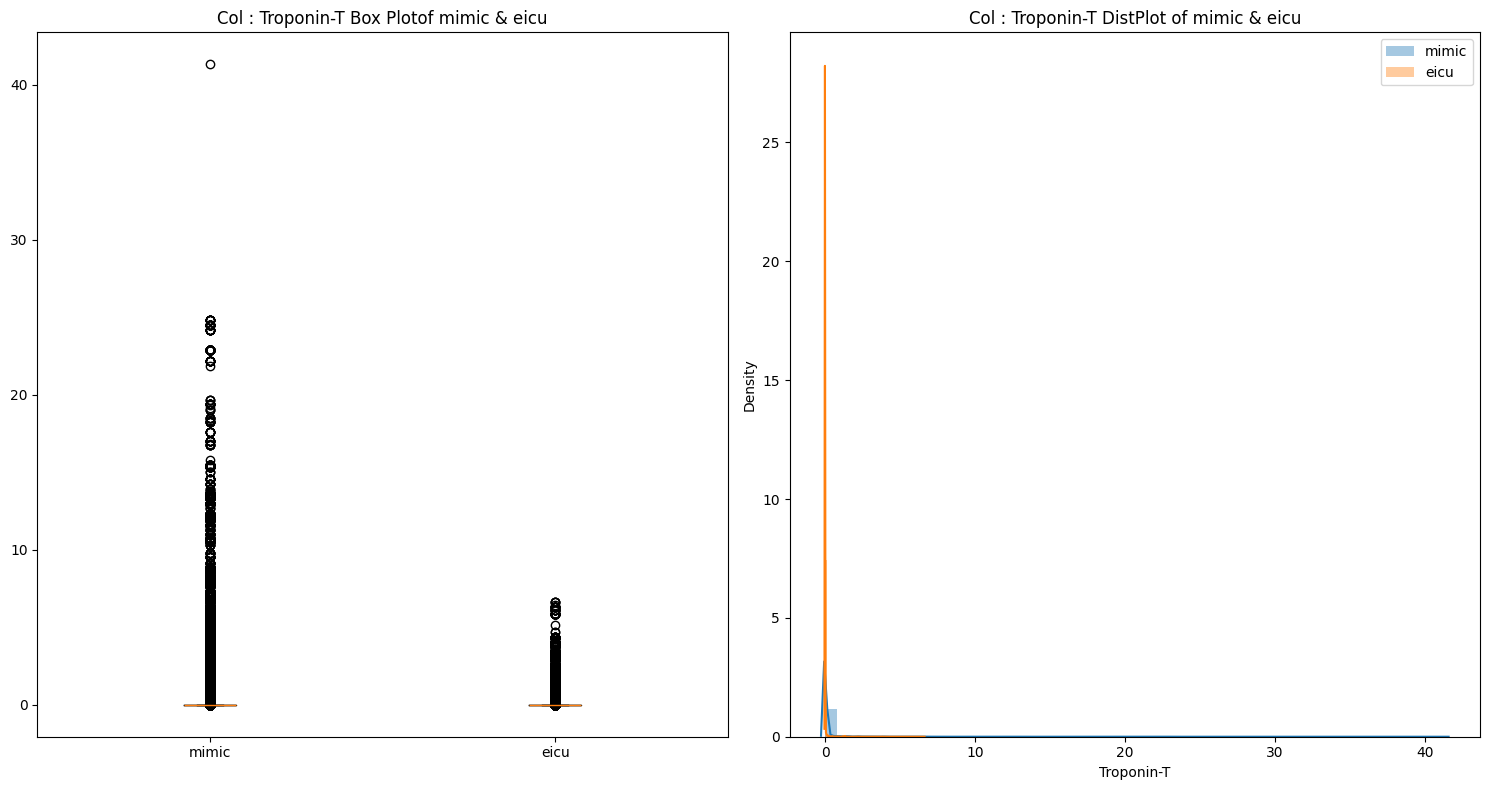

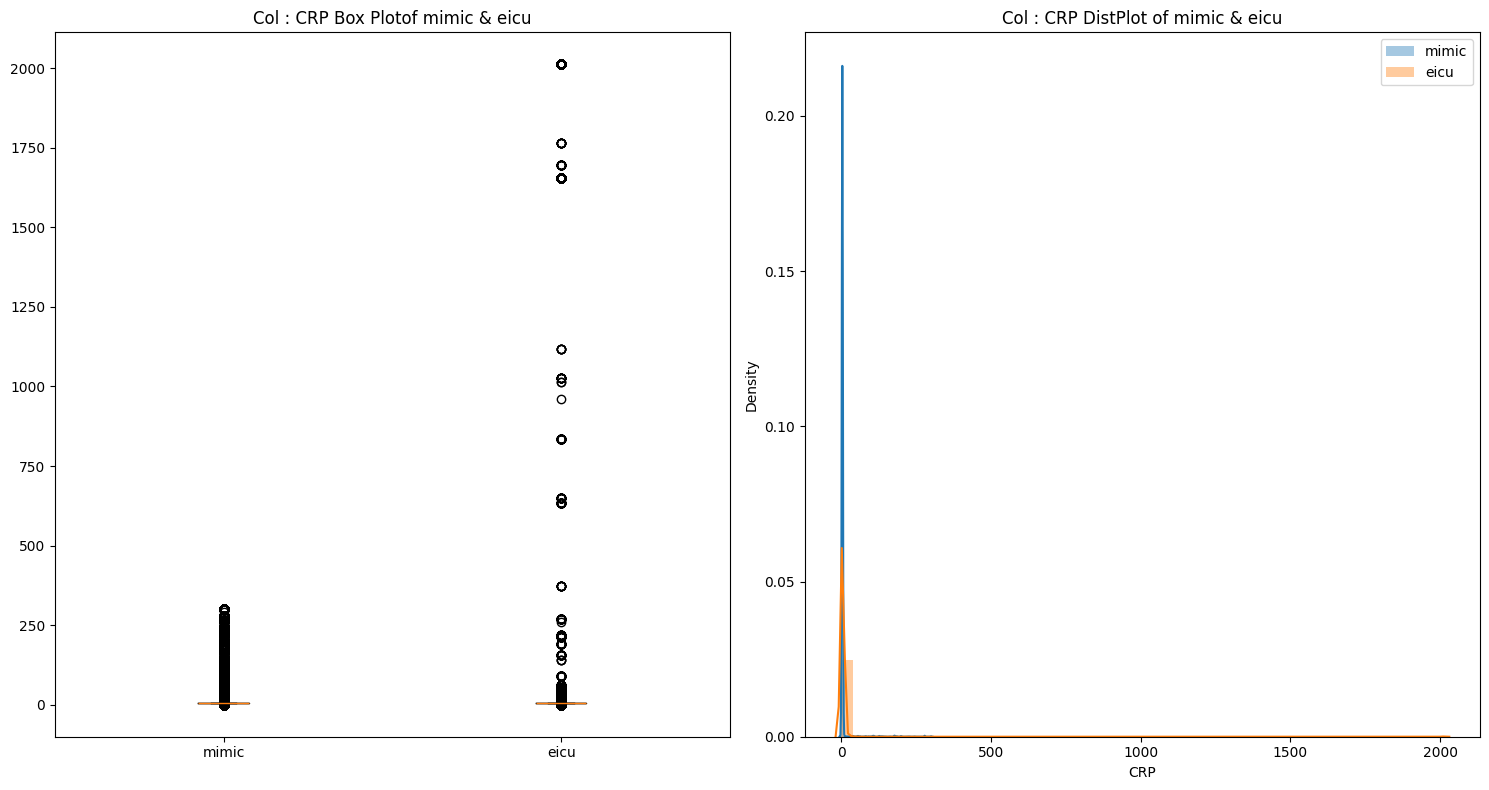

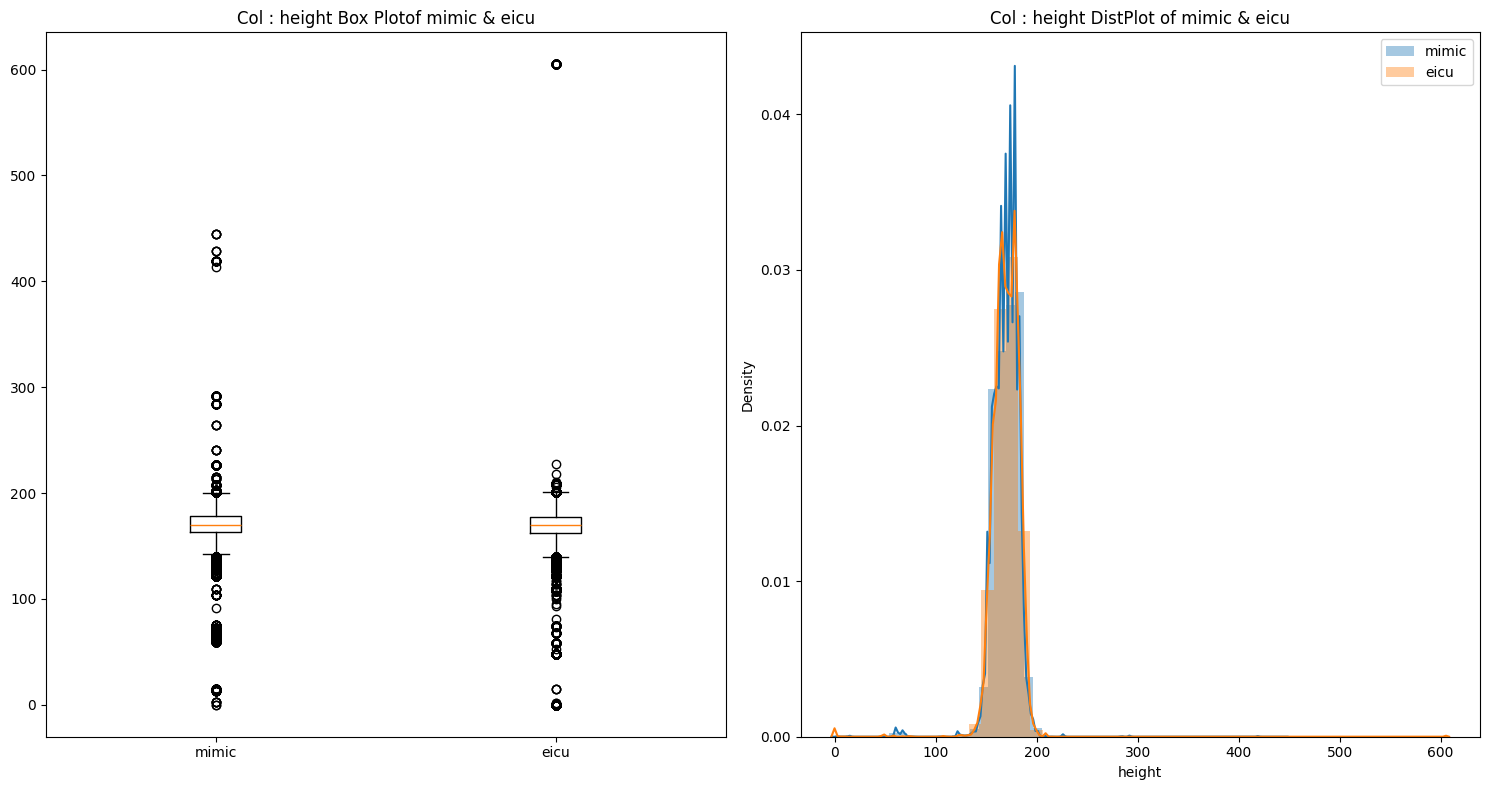

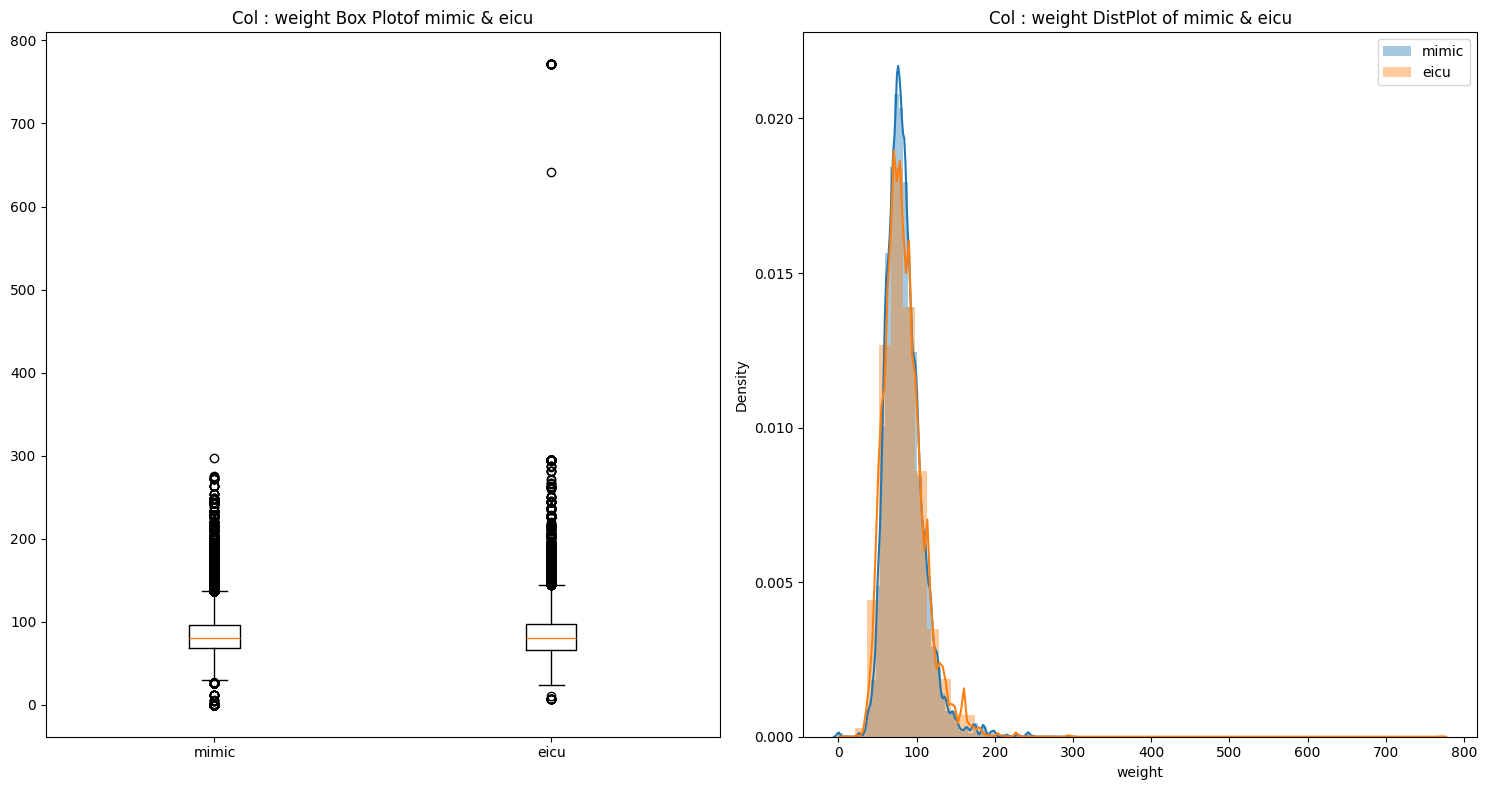

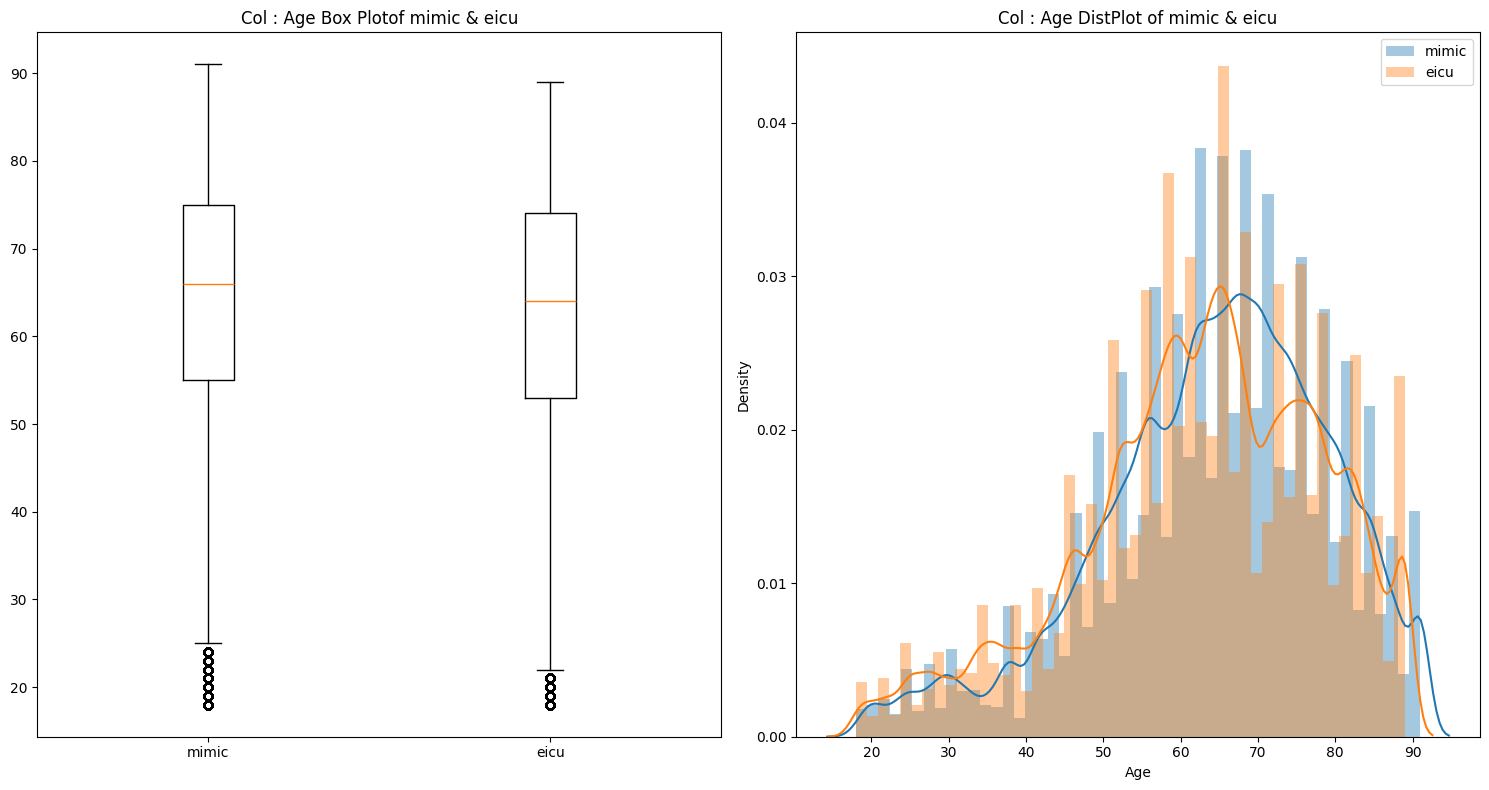

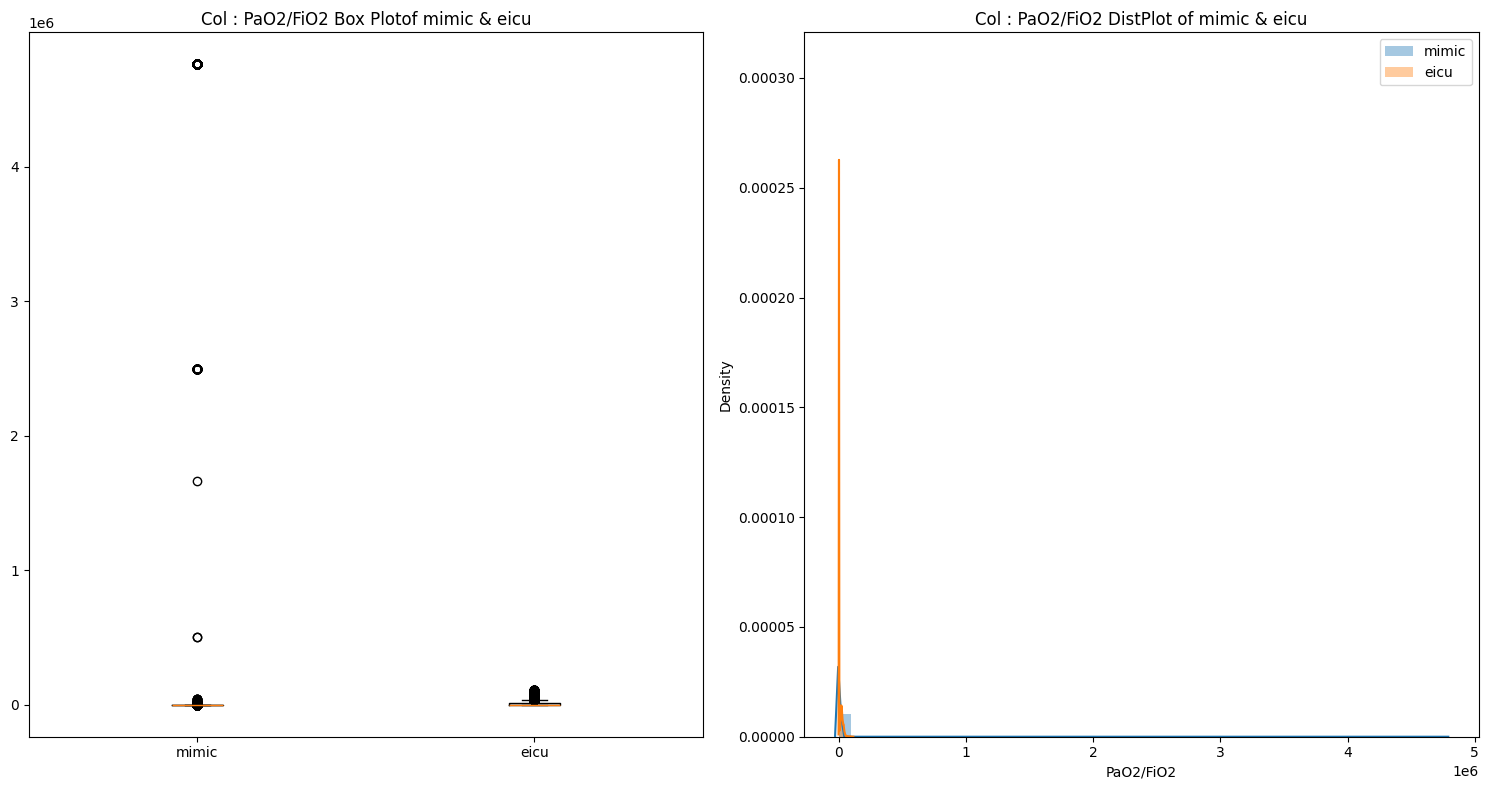

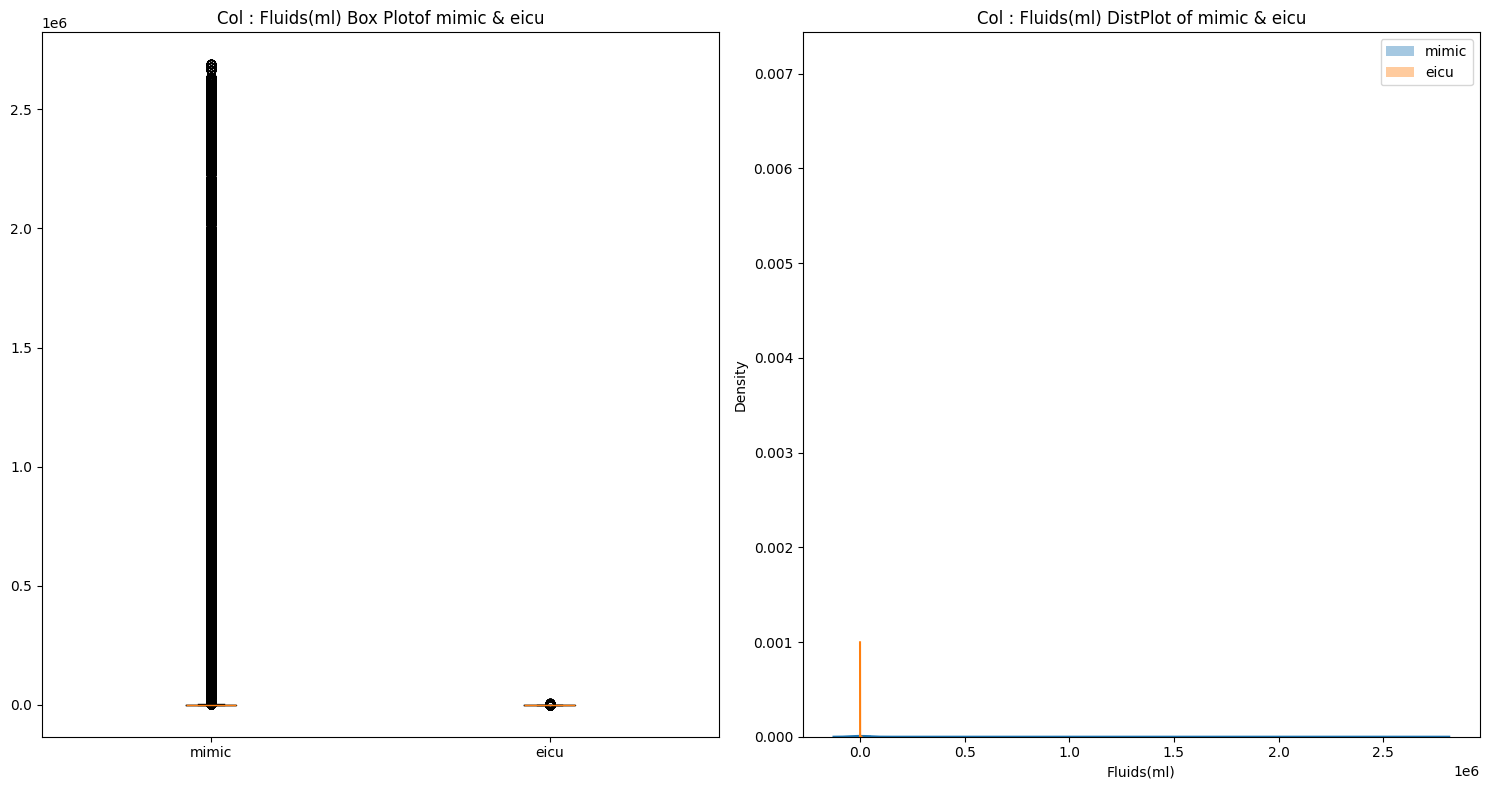

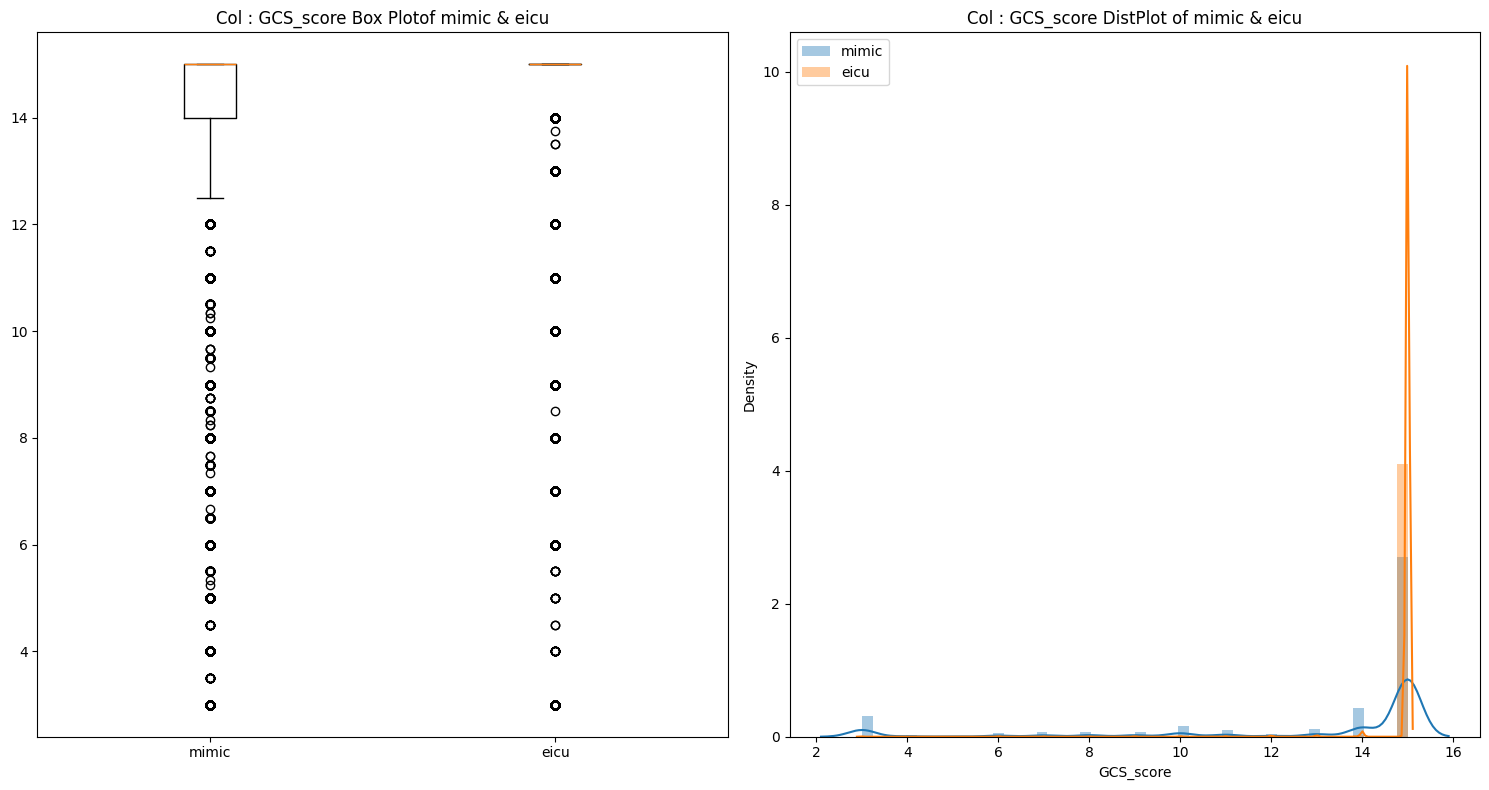

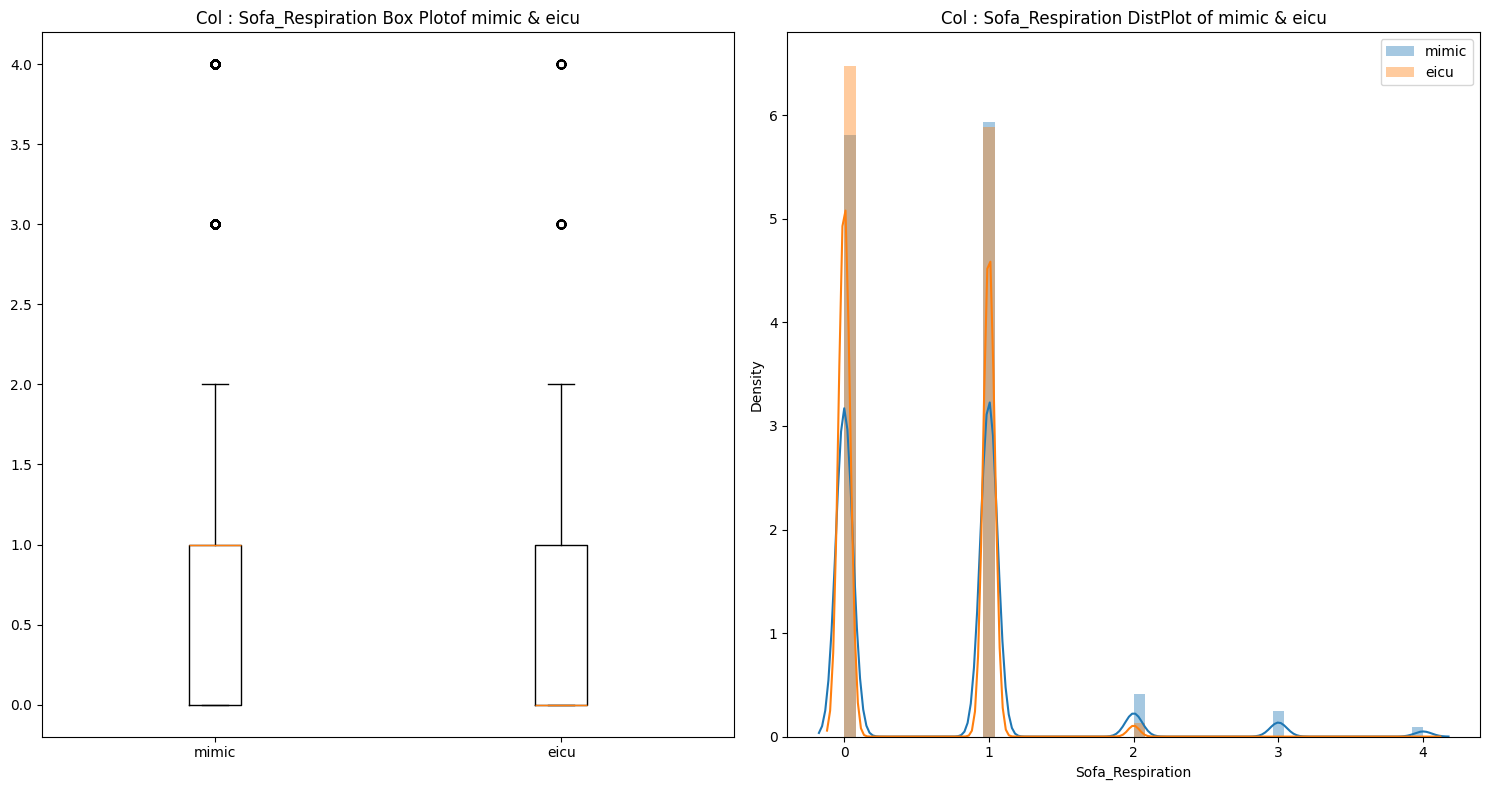

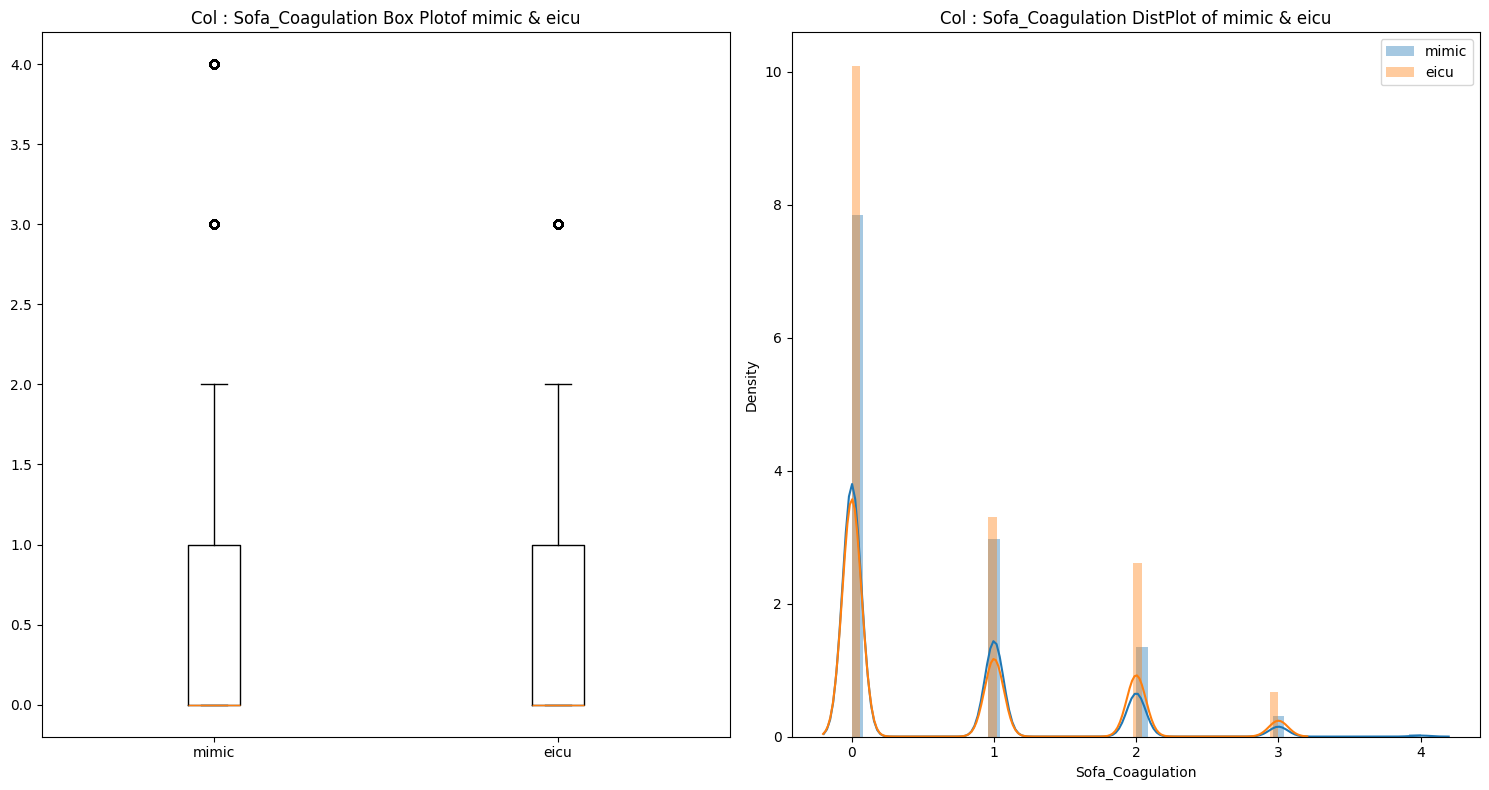

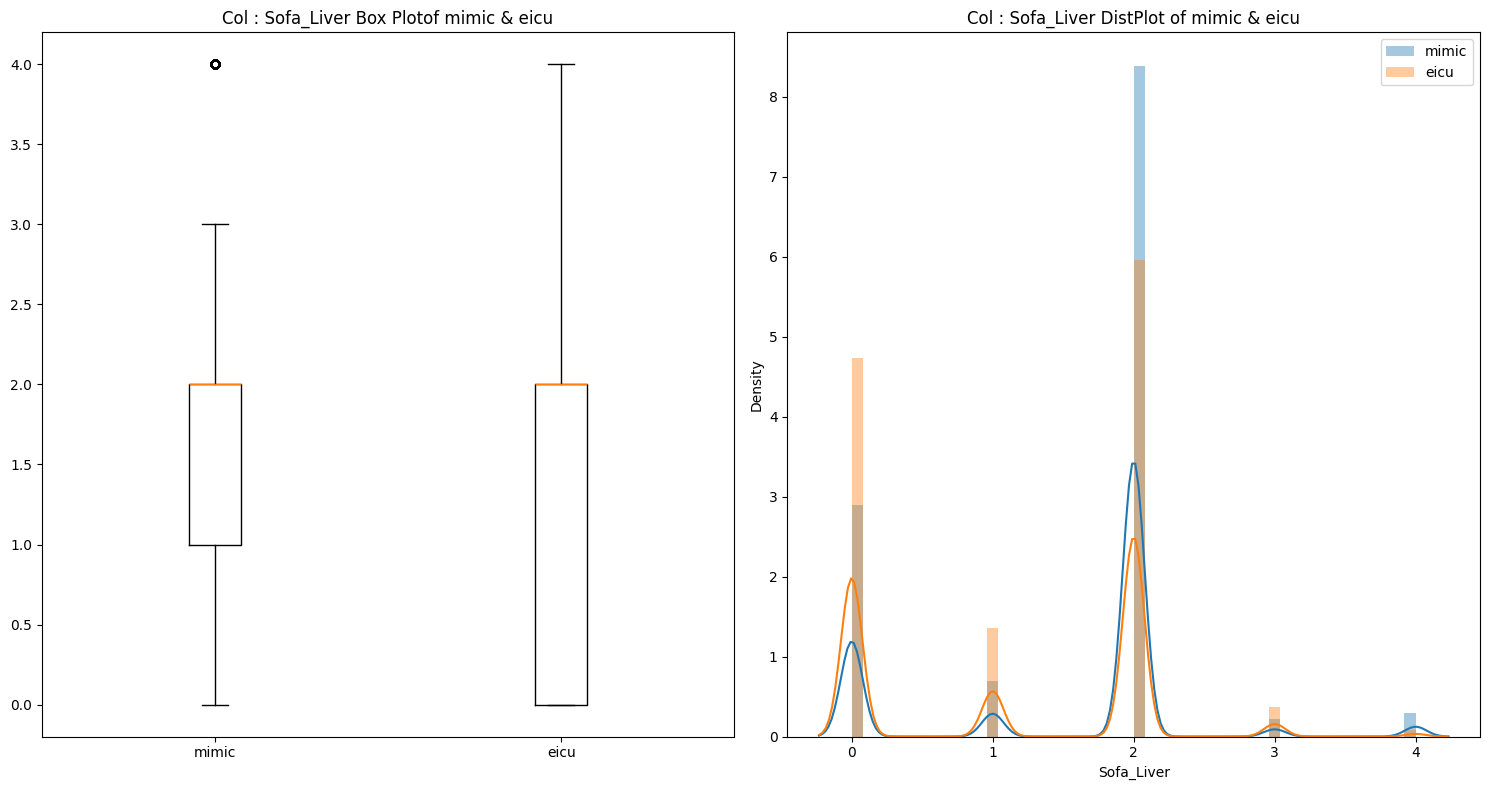

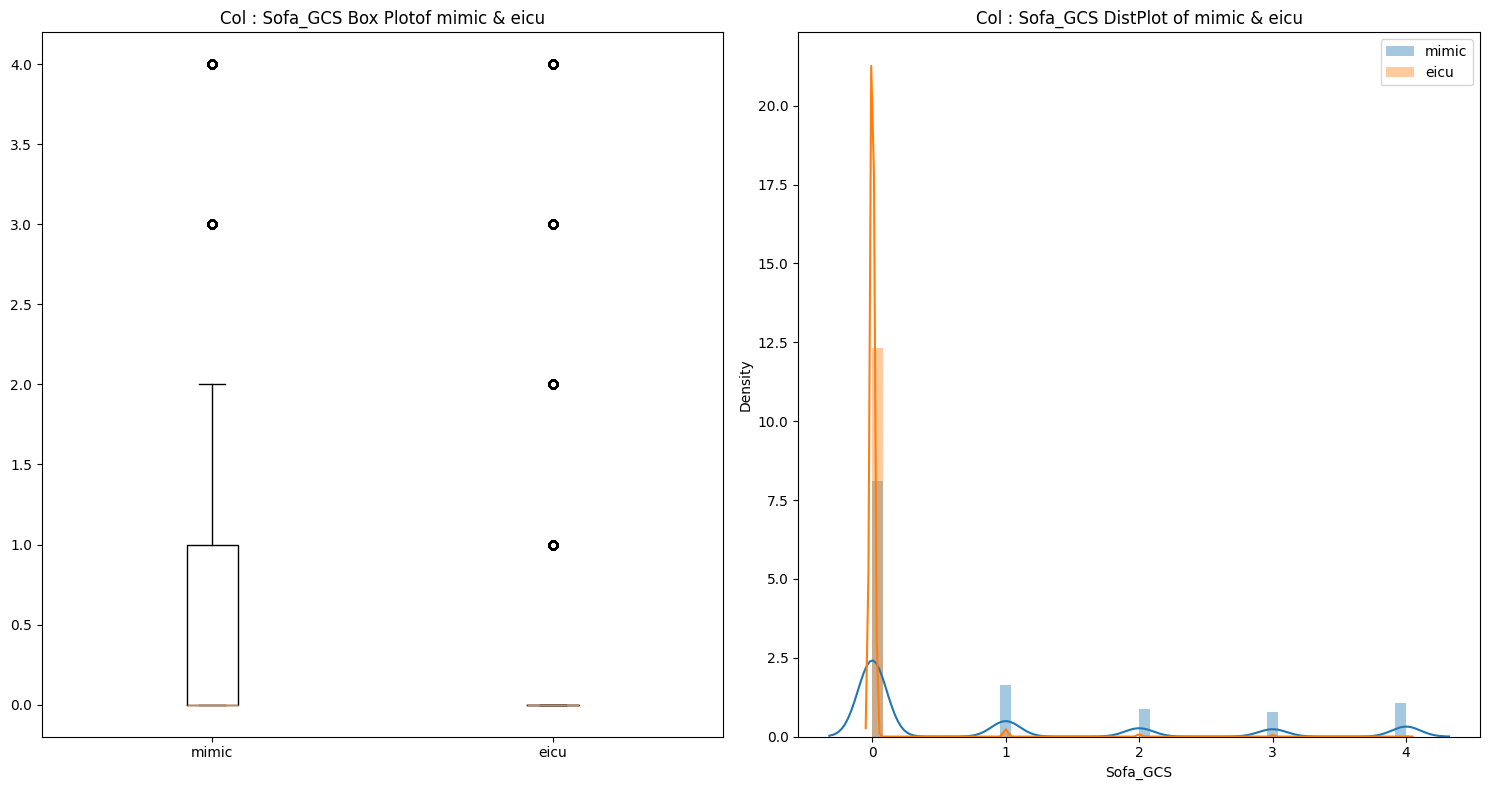

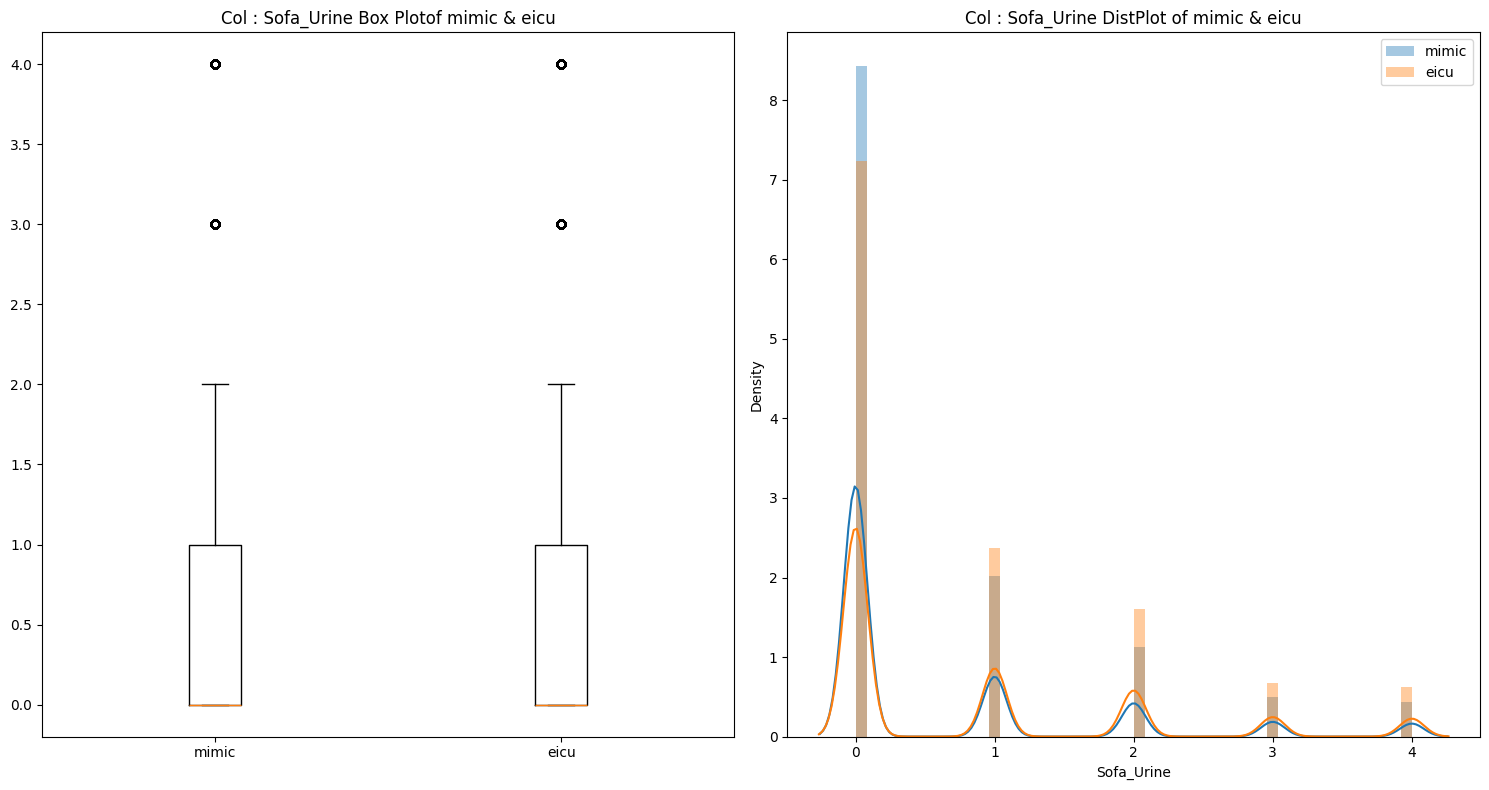

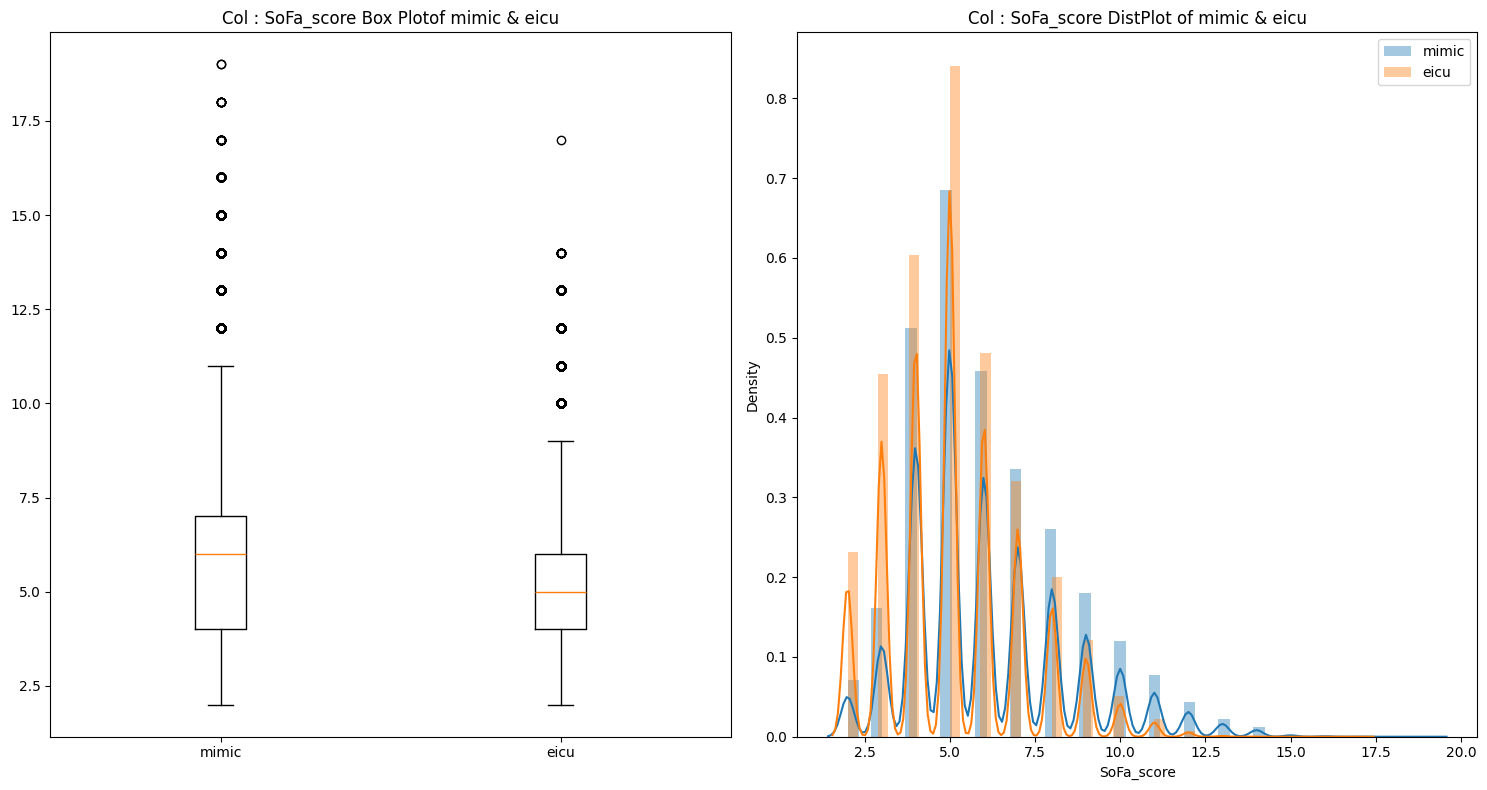

In [18]:
# 이상치 처리 전 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

for i in diff_true.keys():
    fig ,ax = plt.subplots(1,2,figsize = (15, 8))
    ax[0].boxplot([mimic.loc[:,i], eicu.loc[:,i]], labels = ["mimic","eicu"])
    sns.distplot(mimic.loc[:,i], ax = ax[1], label = 'mimic')
    sns.distplot(eicu.loc[:,i], ax = ax[1], label = 'eicu')
    ax[0].set_title(f'Col : {i} Box Plotof mimic & eicu')
    ax[1].set_title(f'Col : {i} DistPlot of mimic & eicu')
    plt.legend()
    plt.tight_layout()
    plt.show()
    

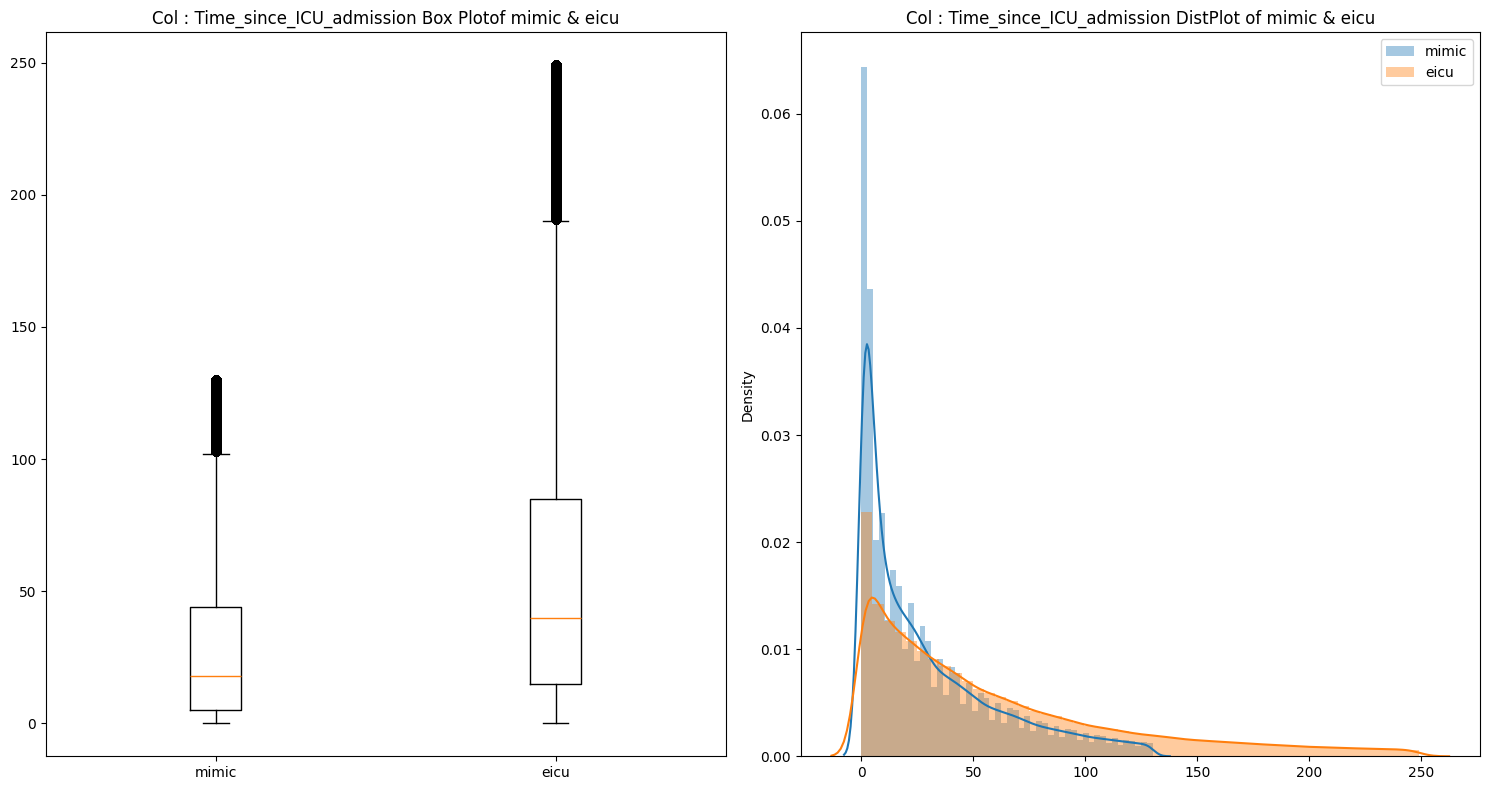

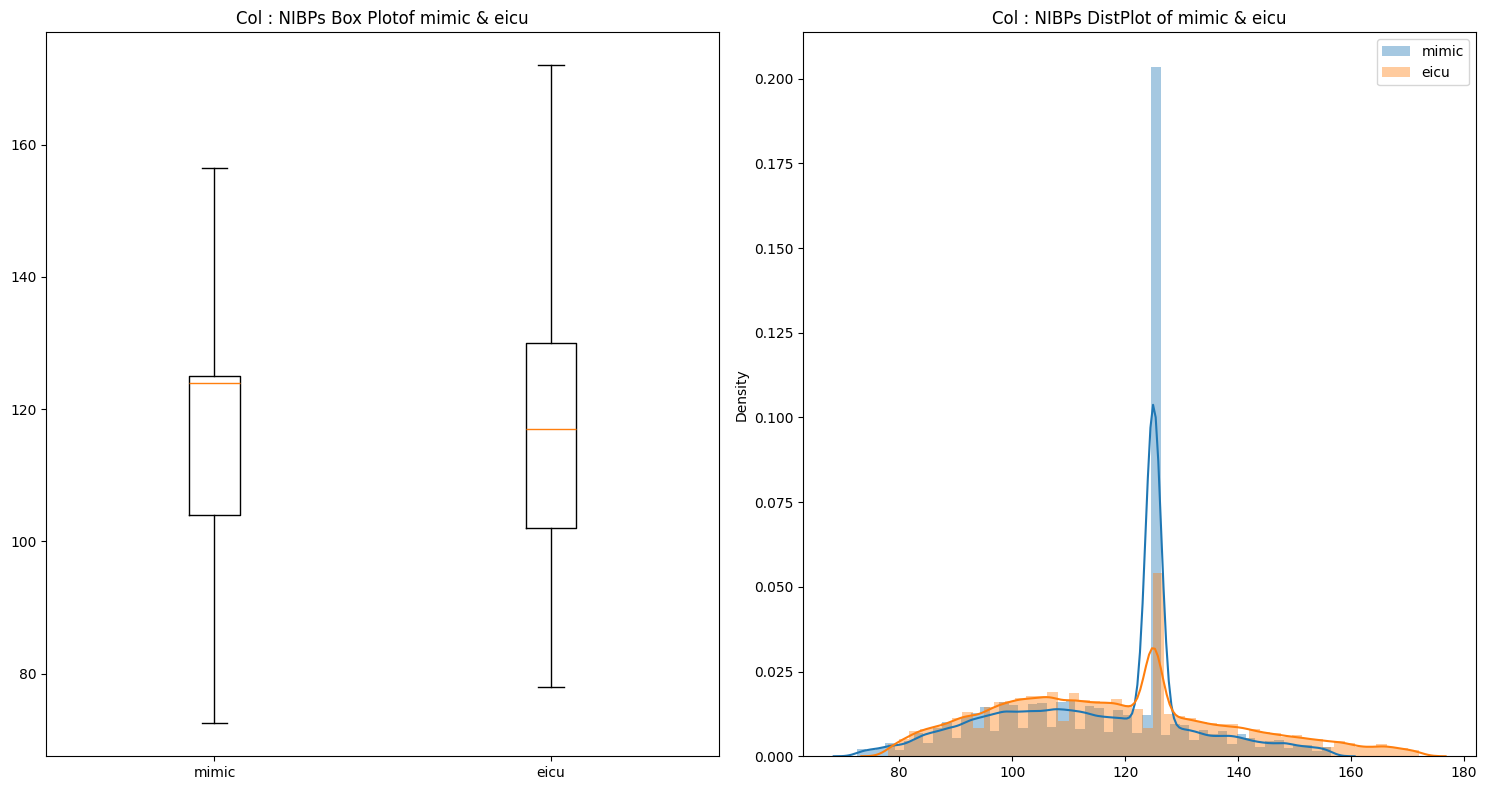

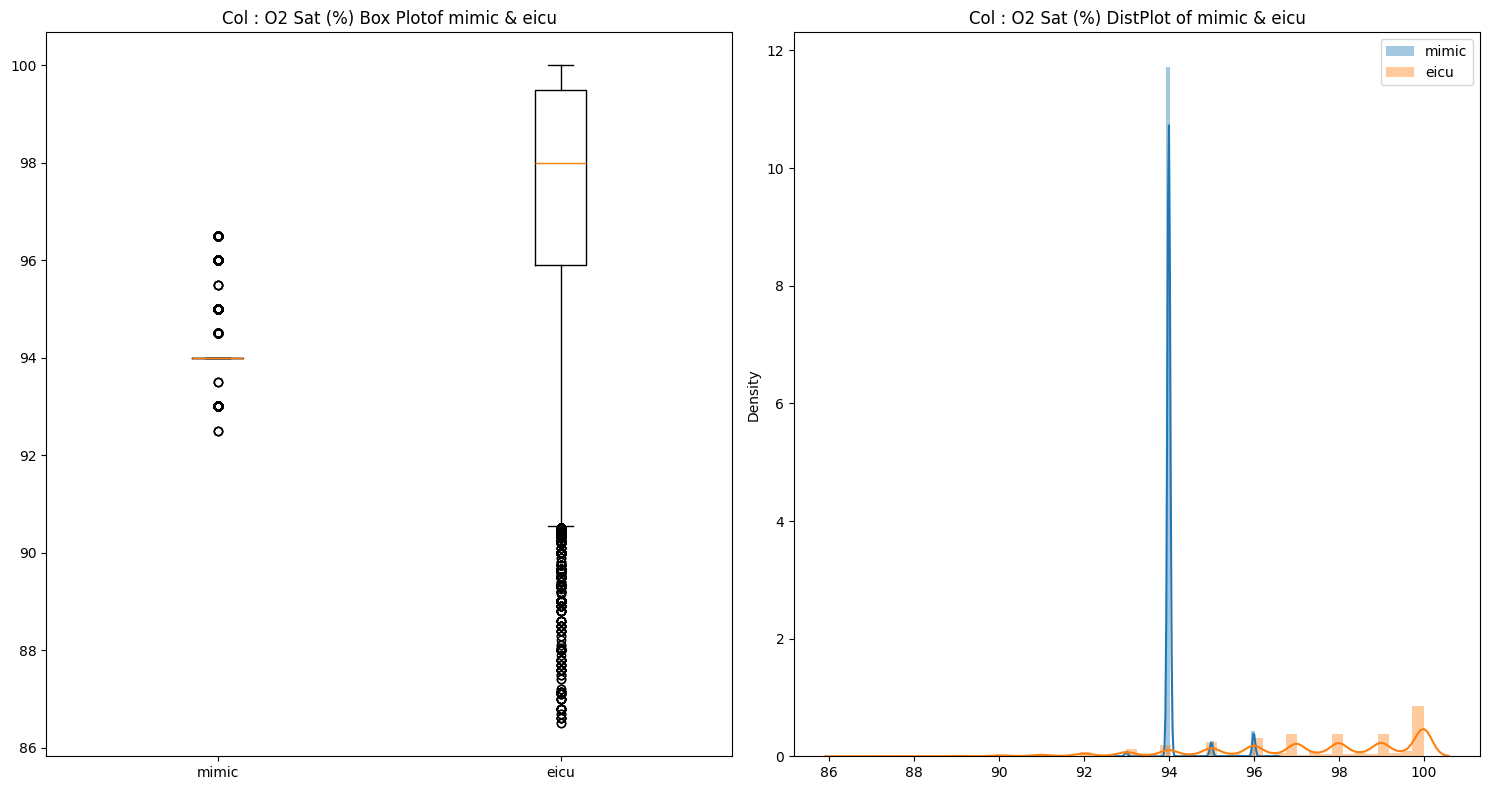

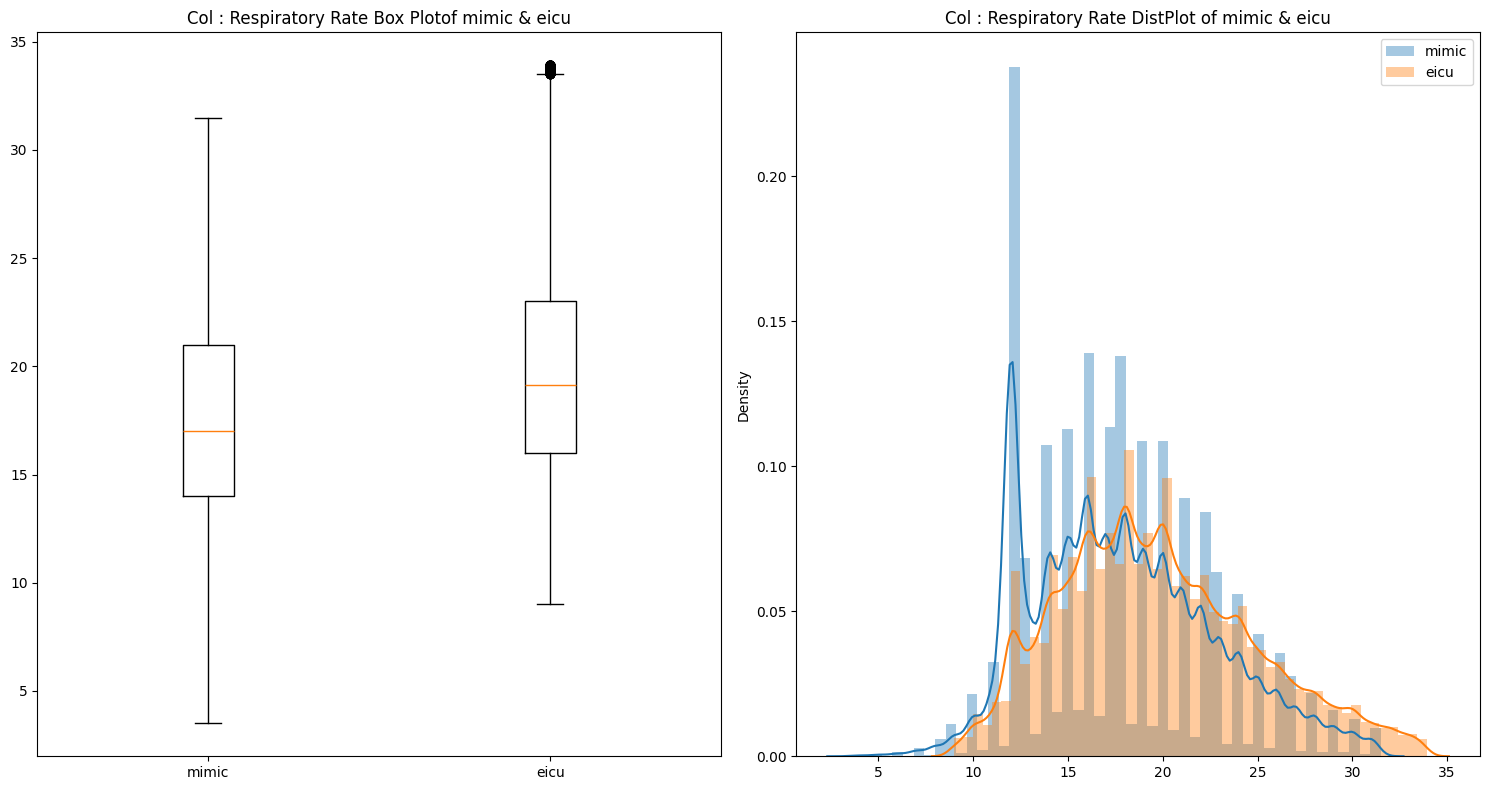

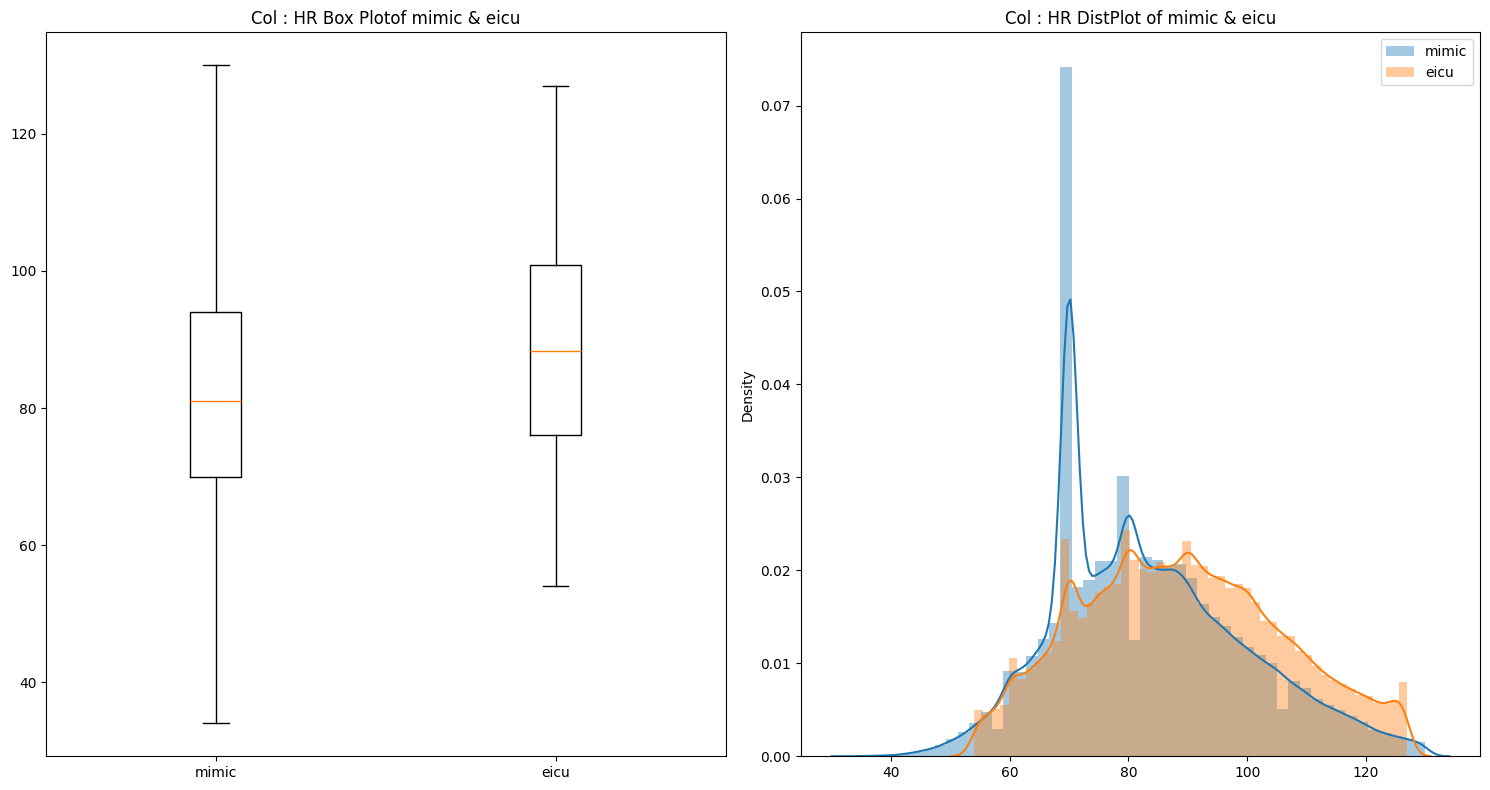

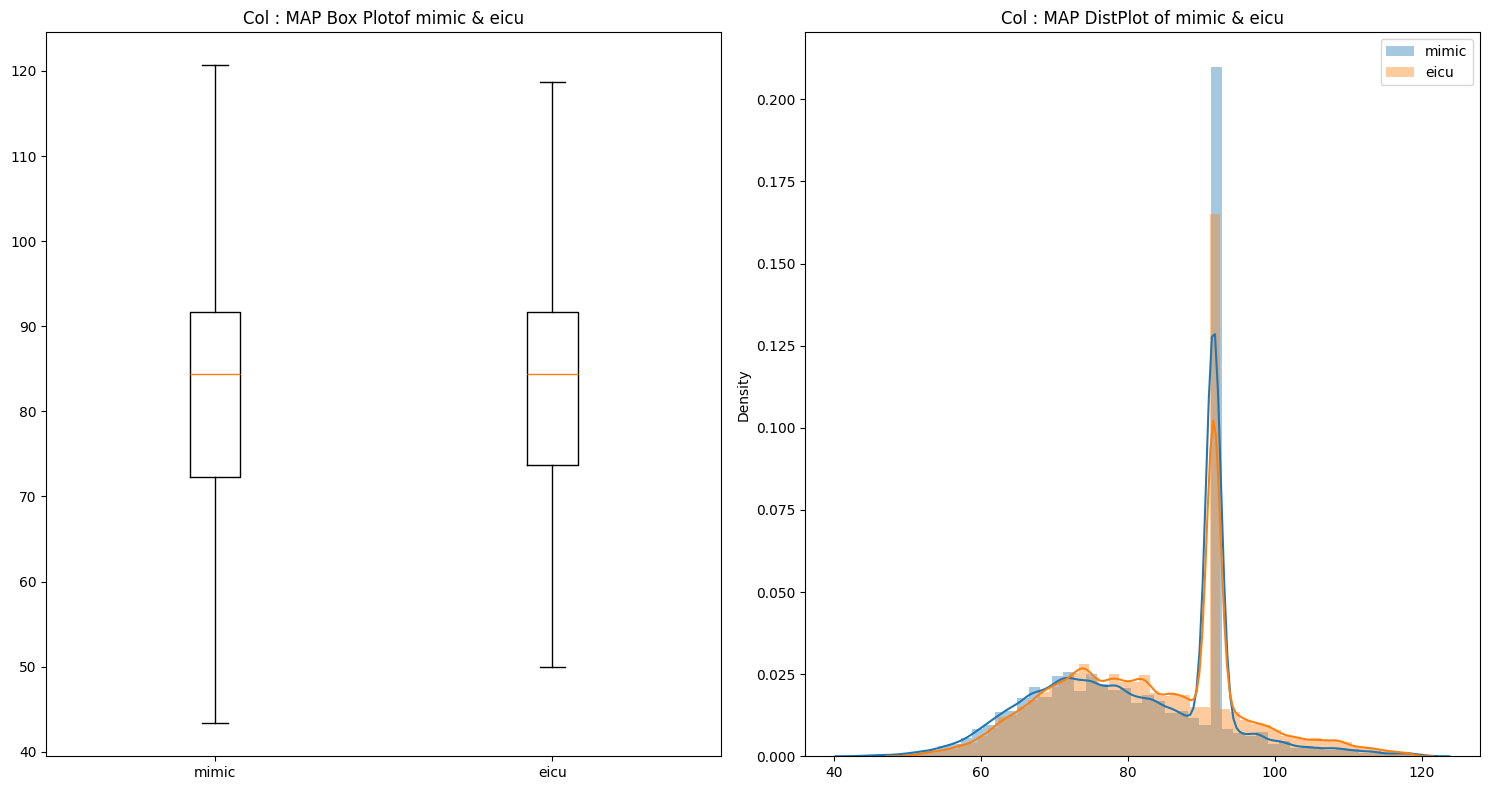

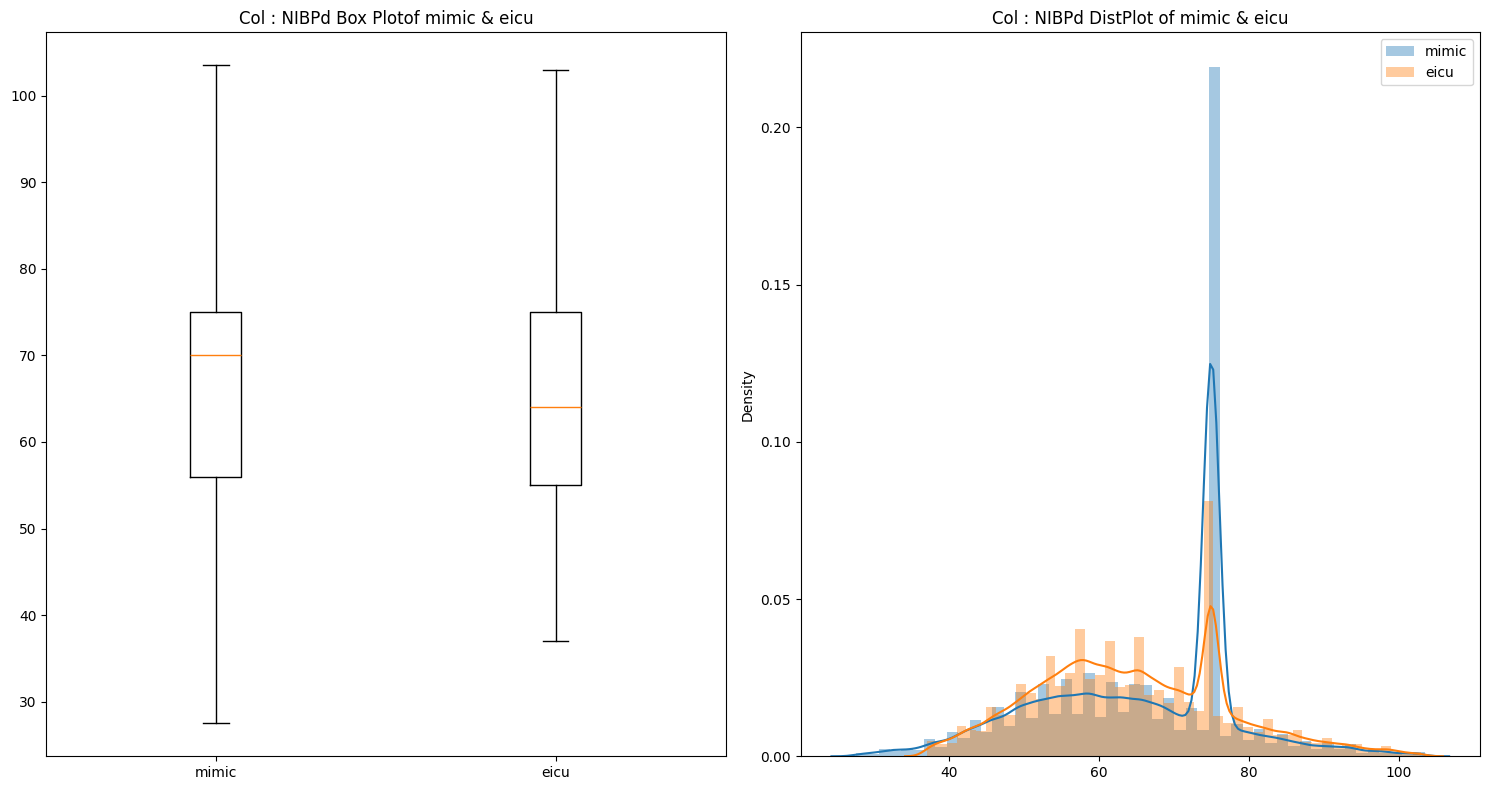

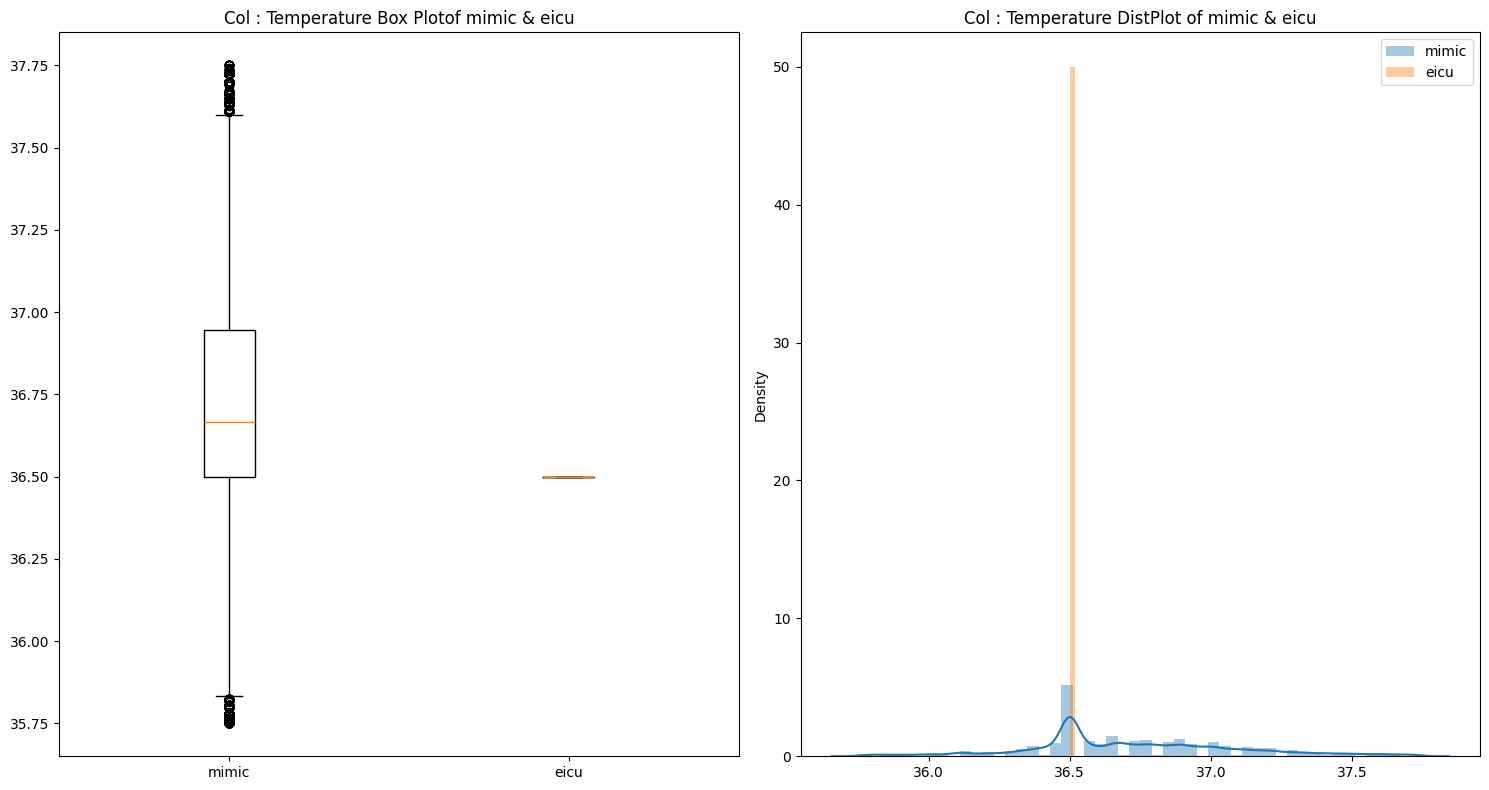

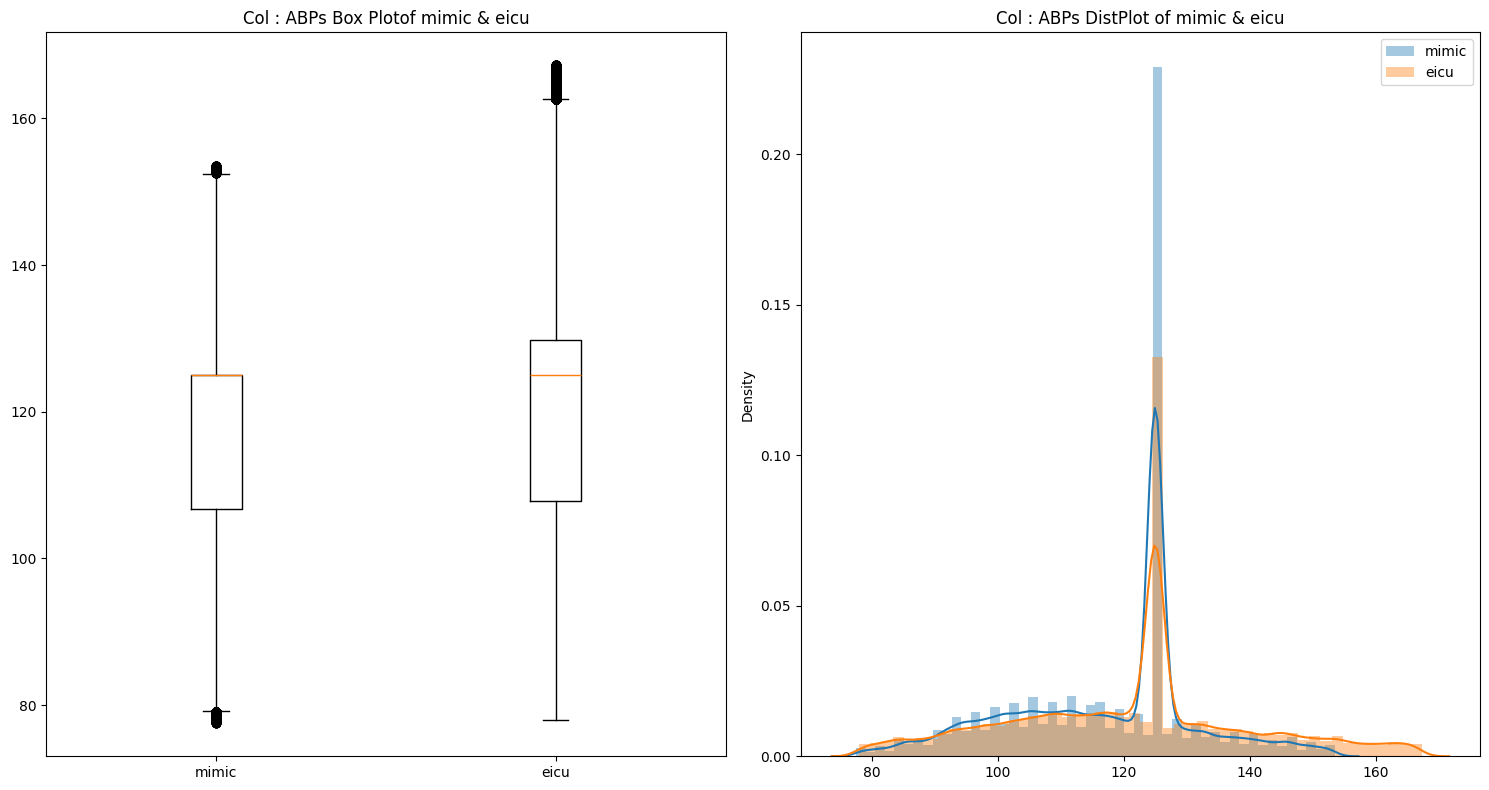

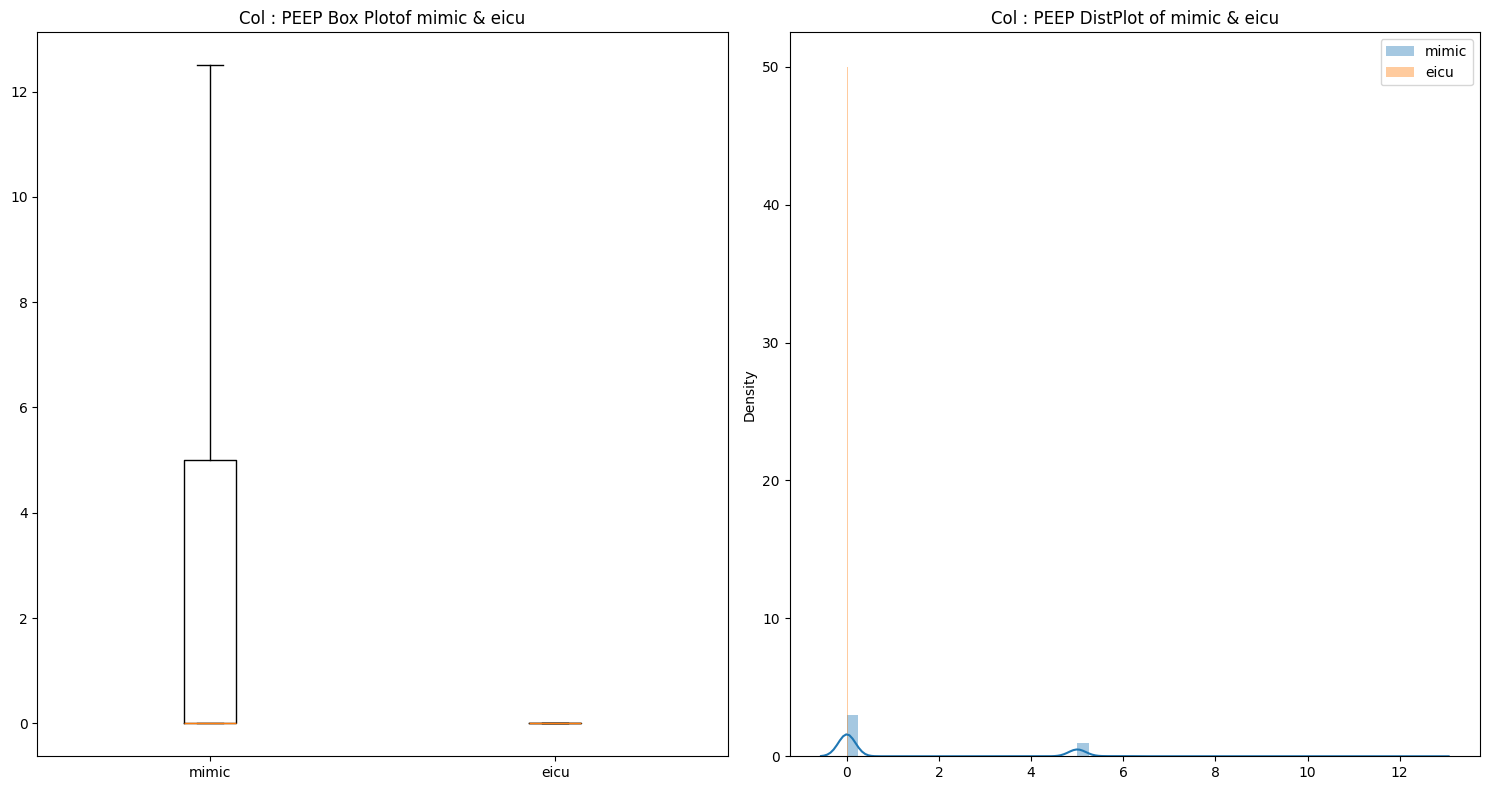

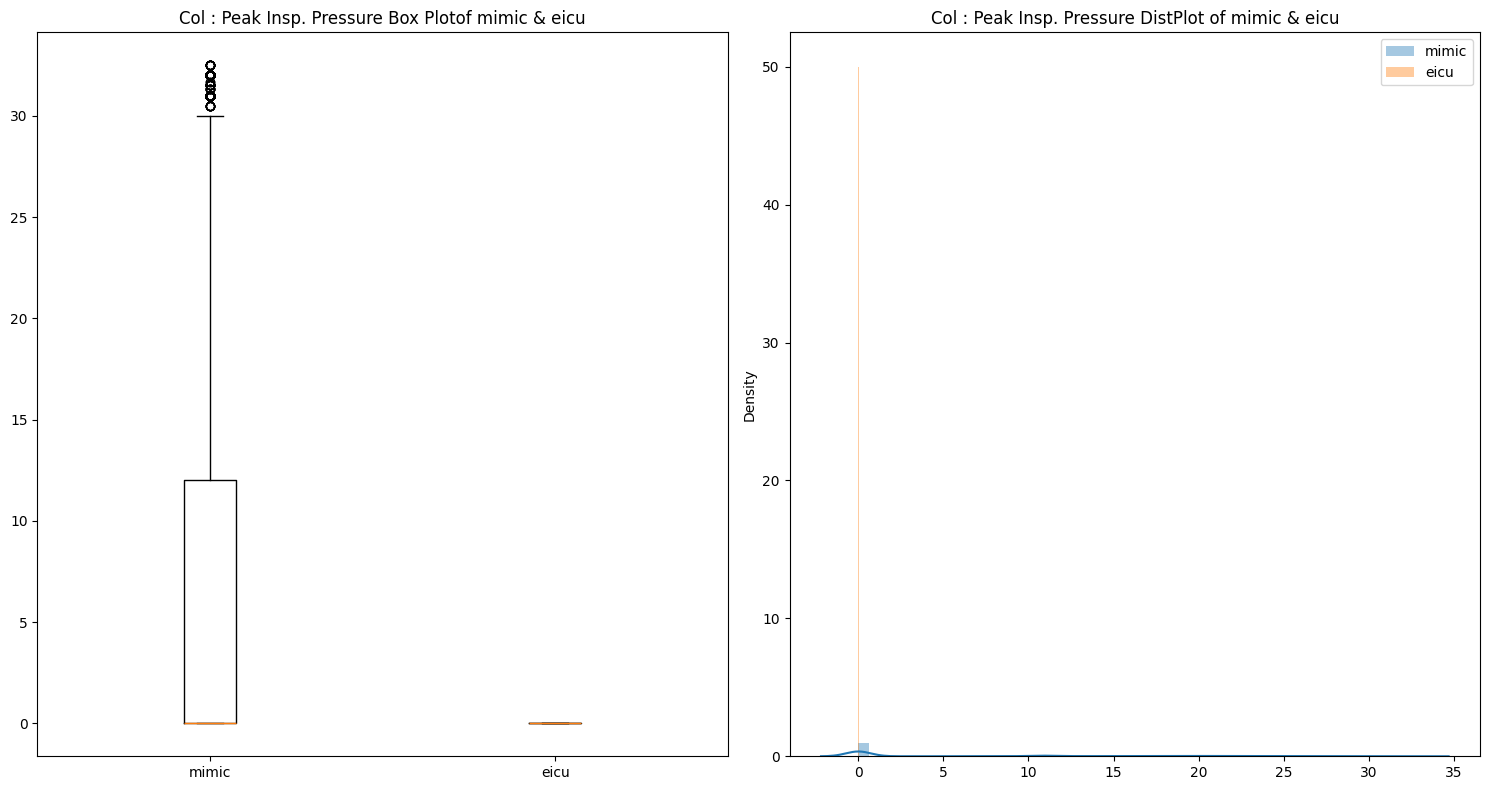

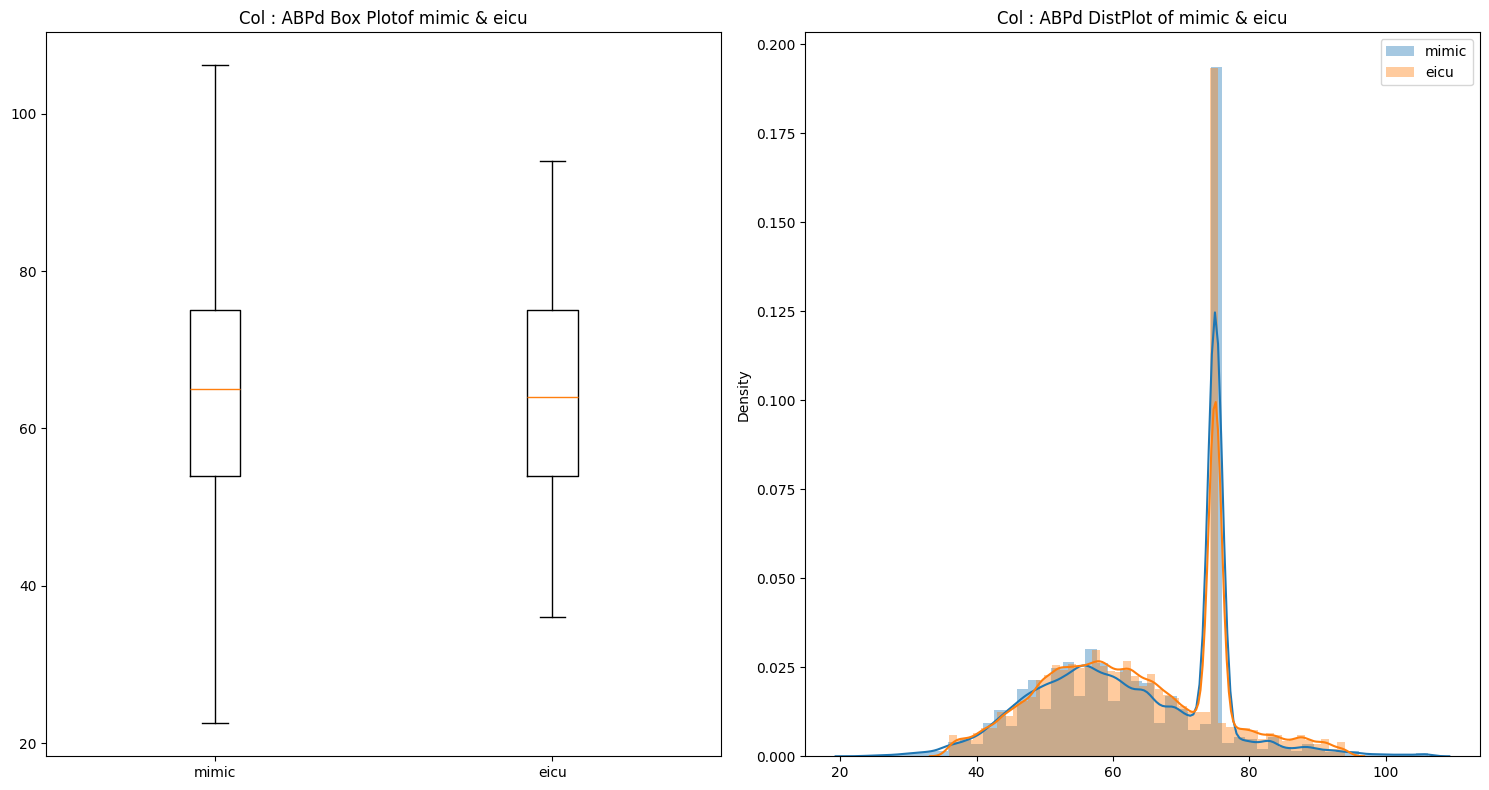

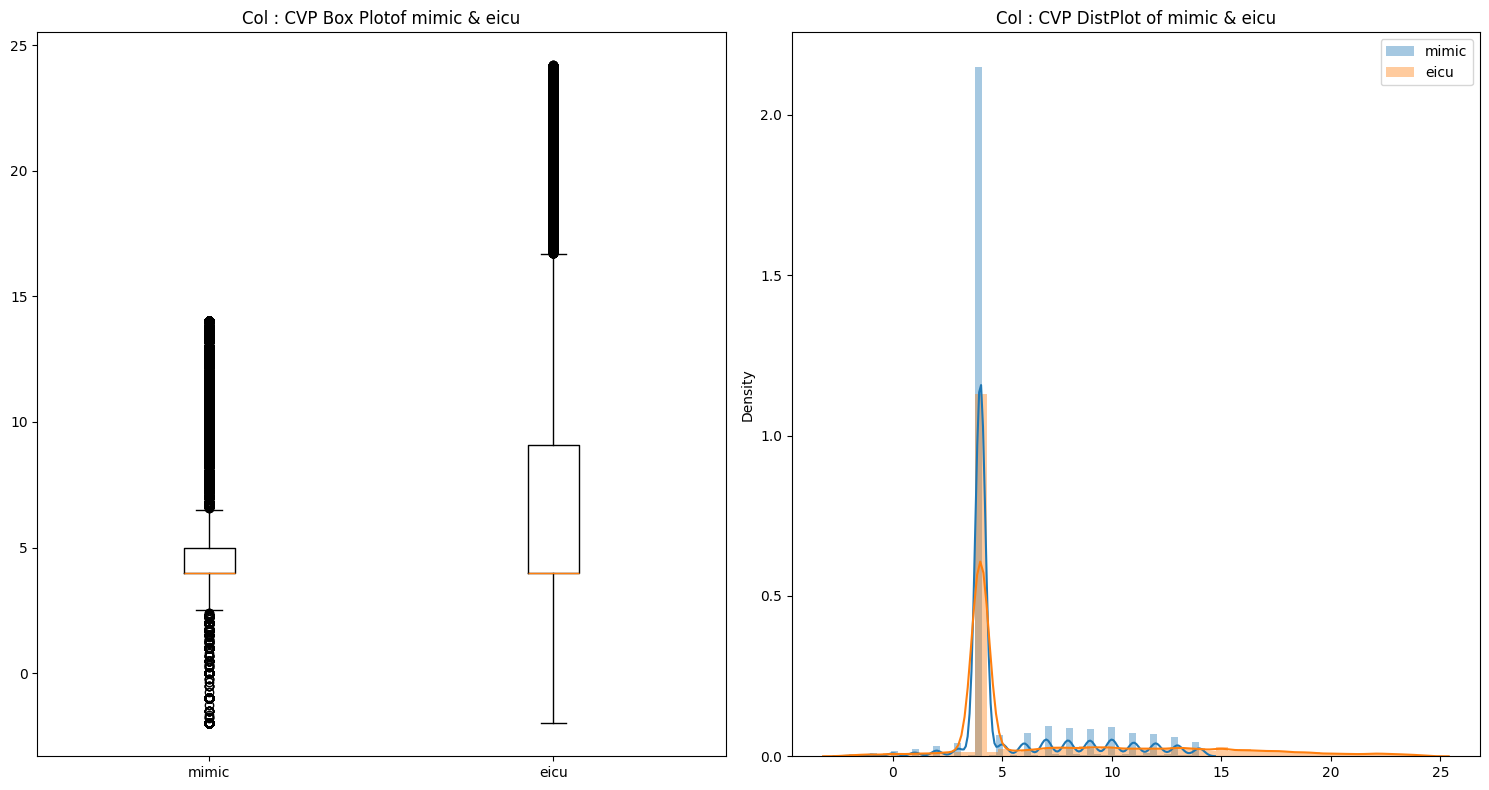

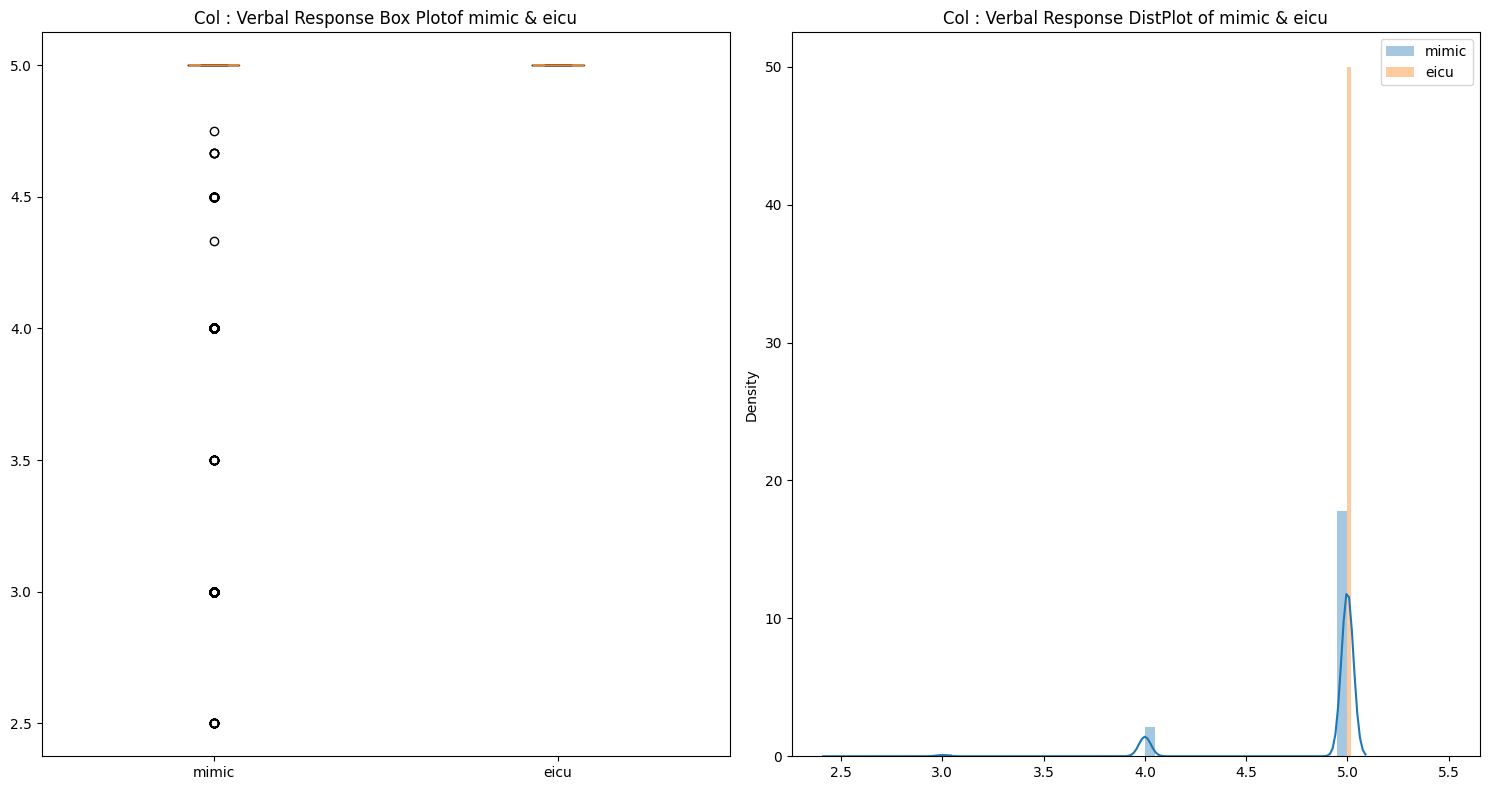

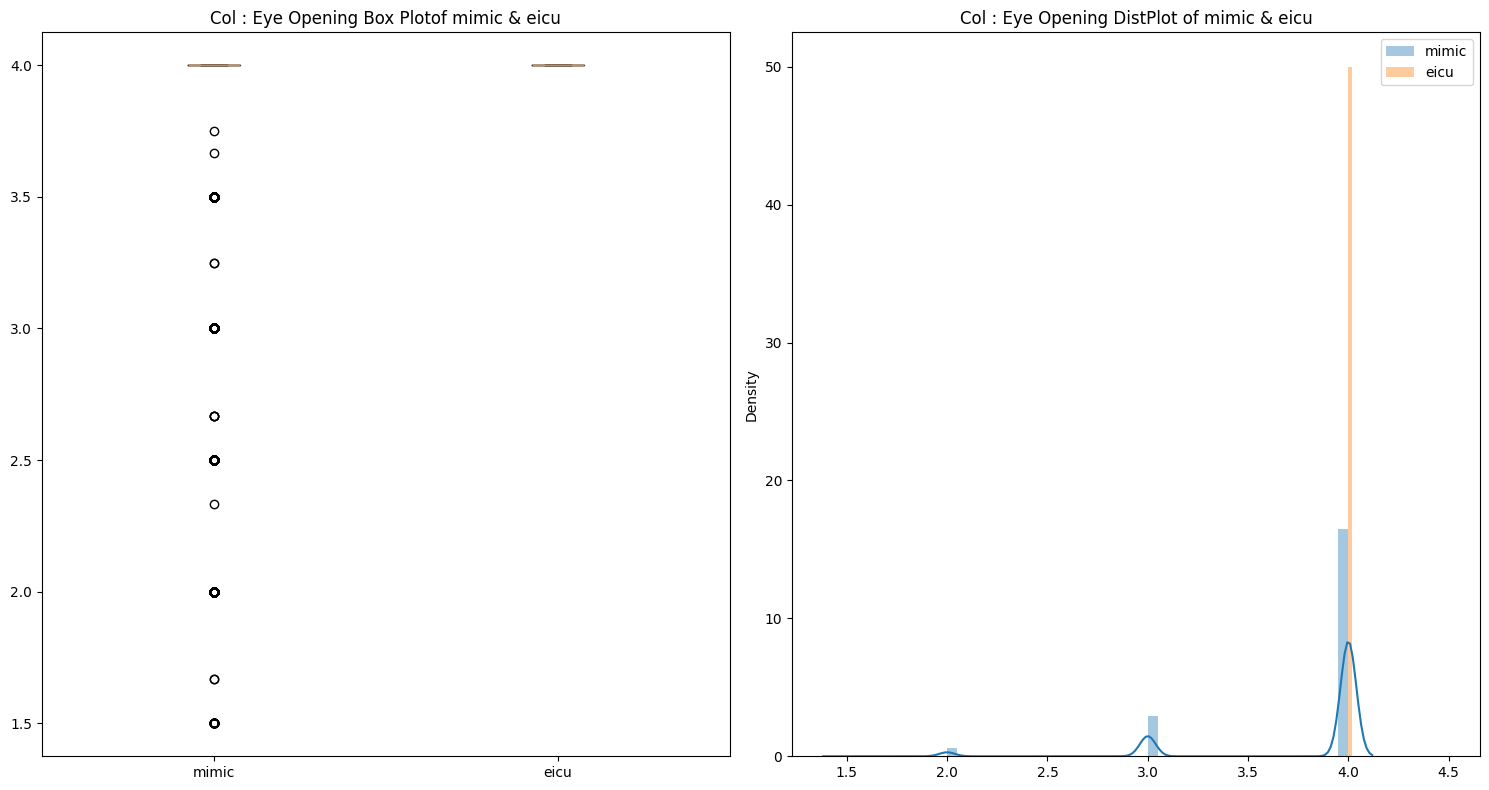

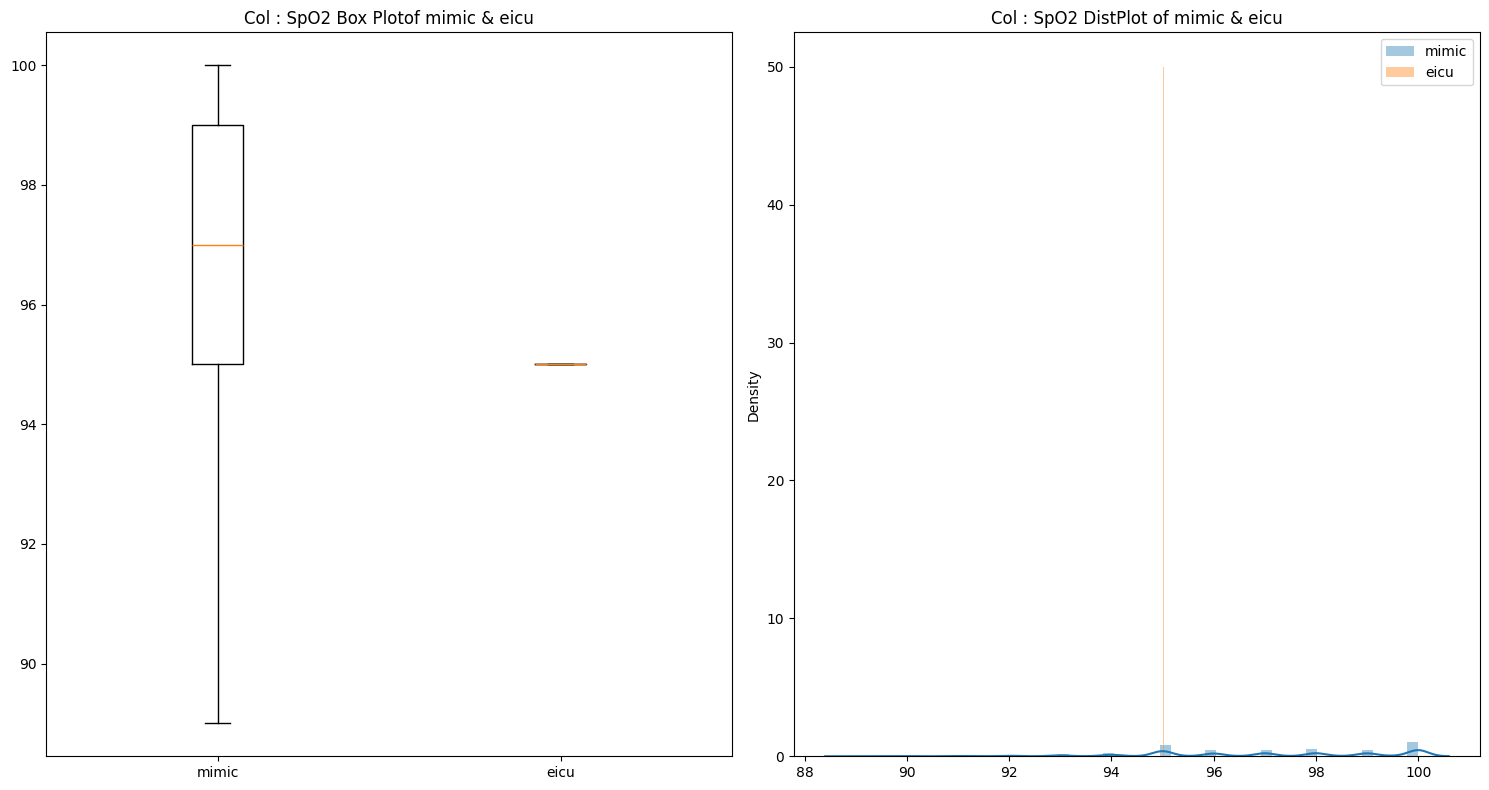

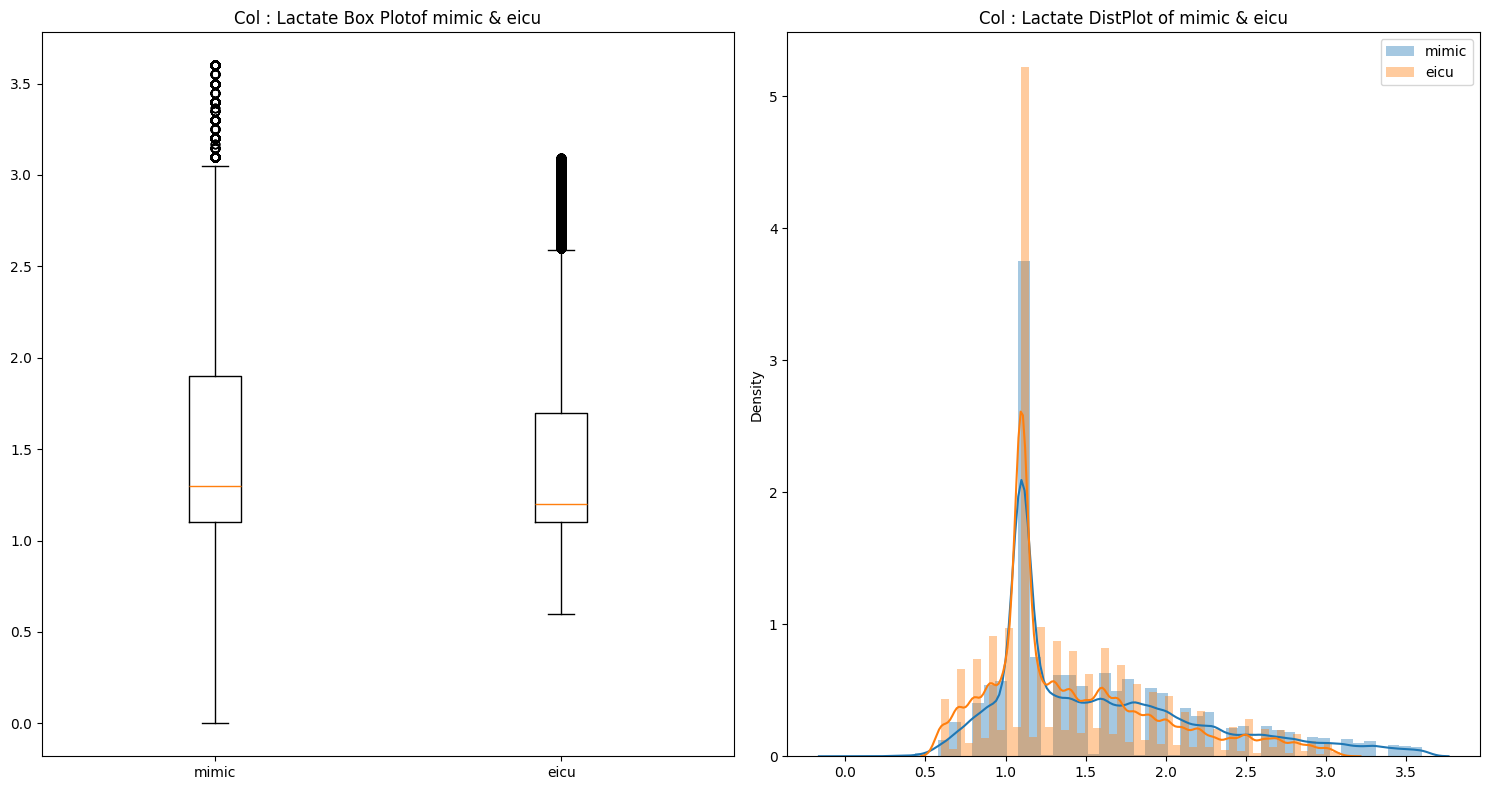

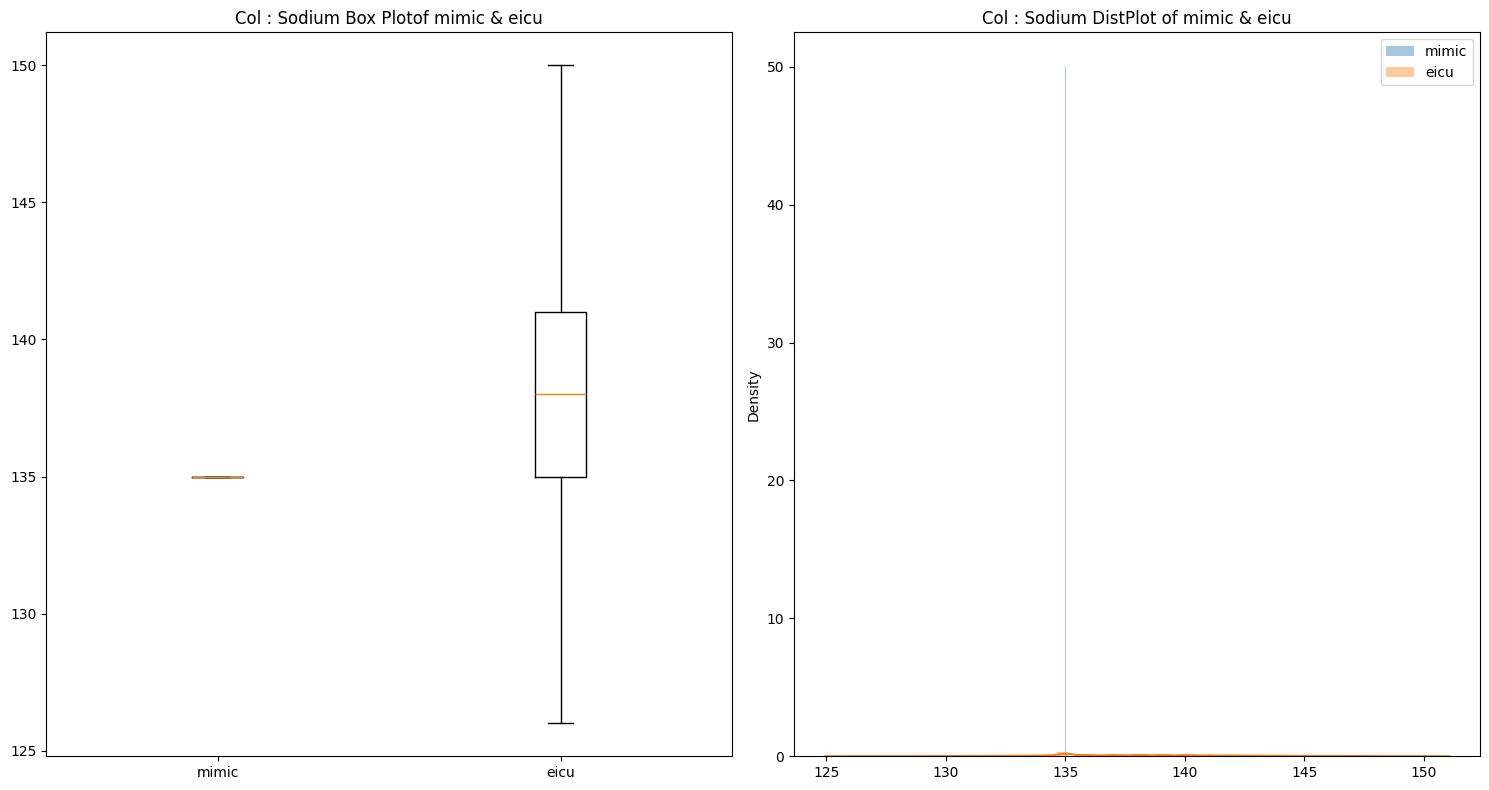

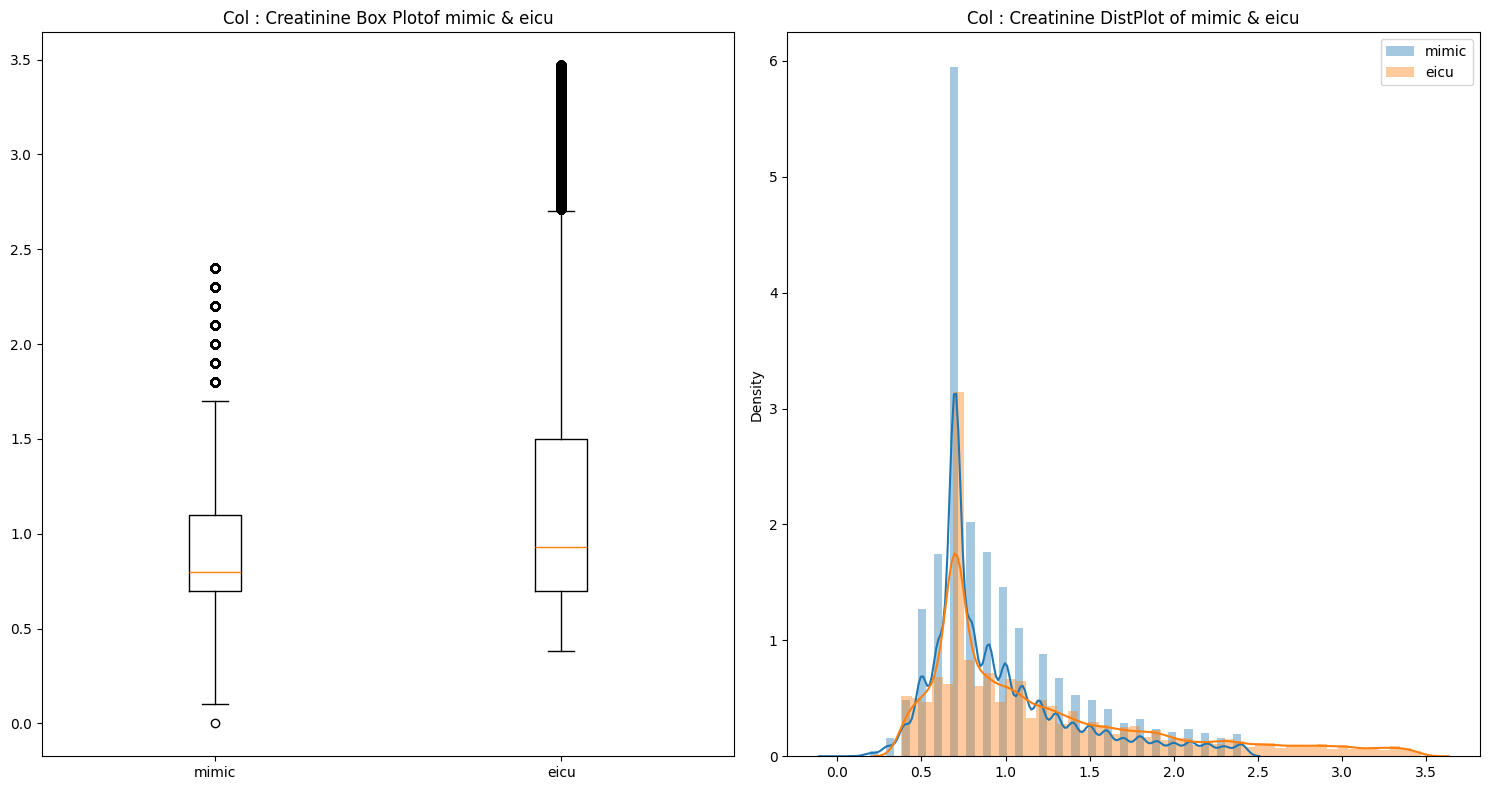

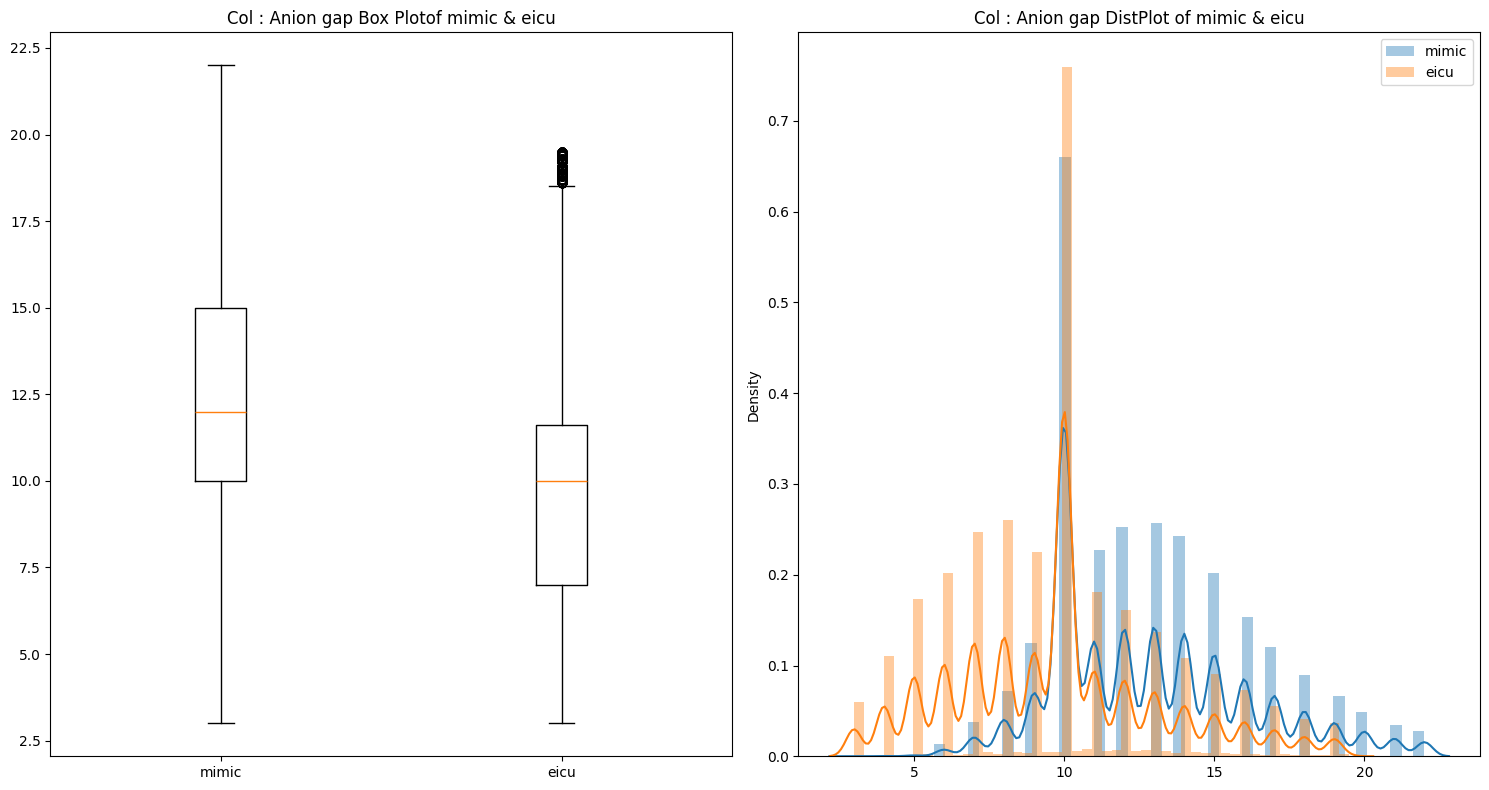

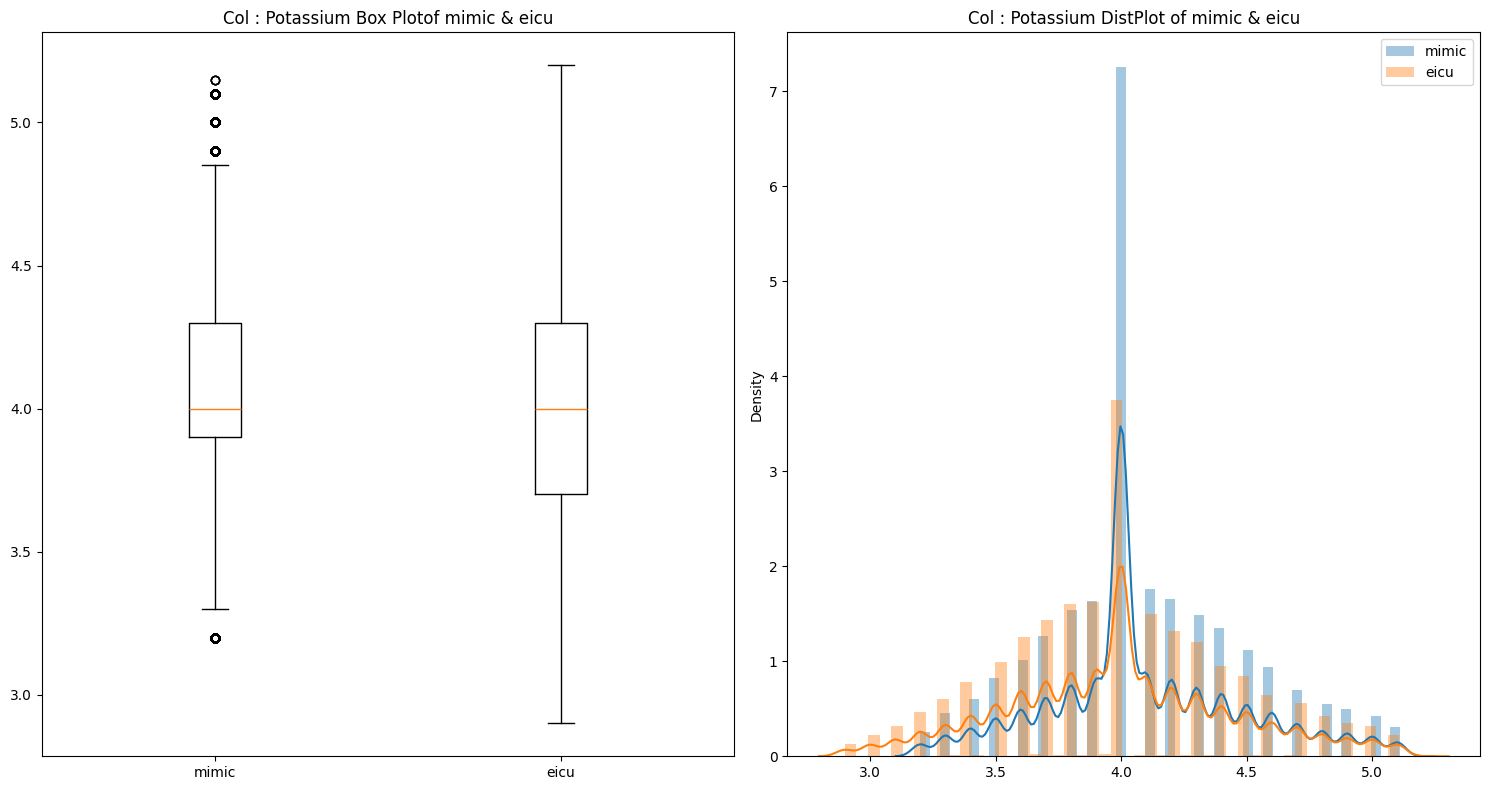

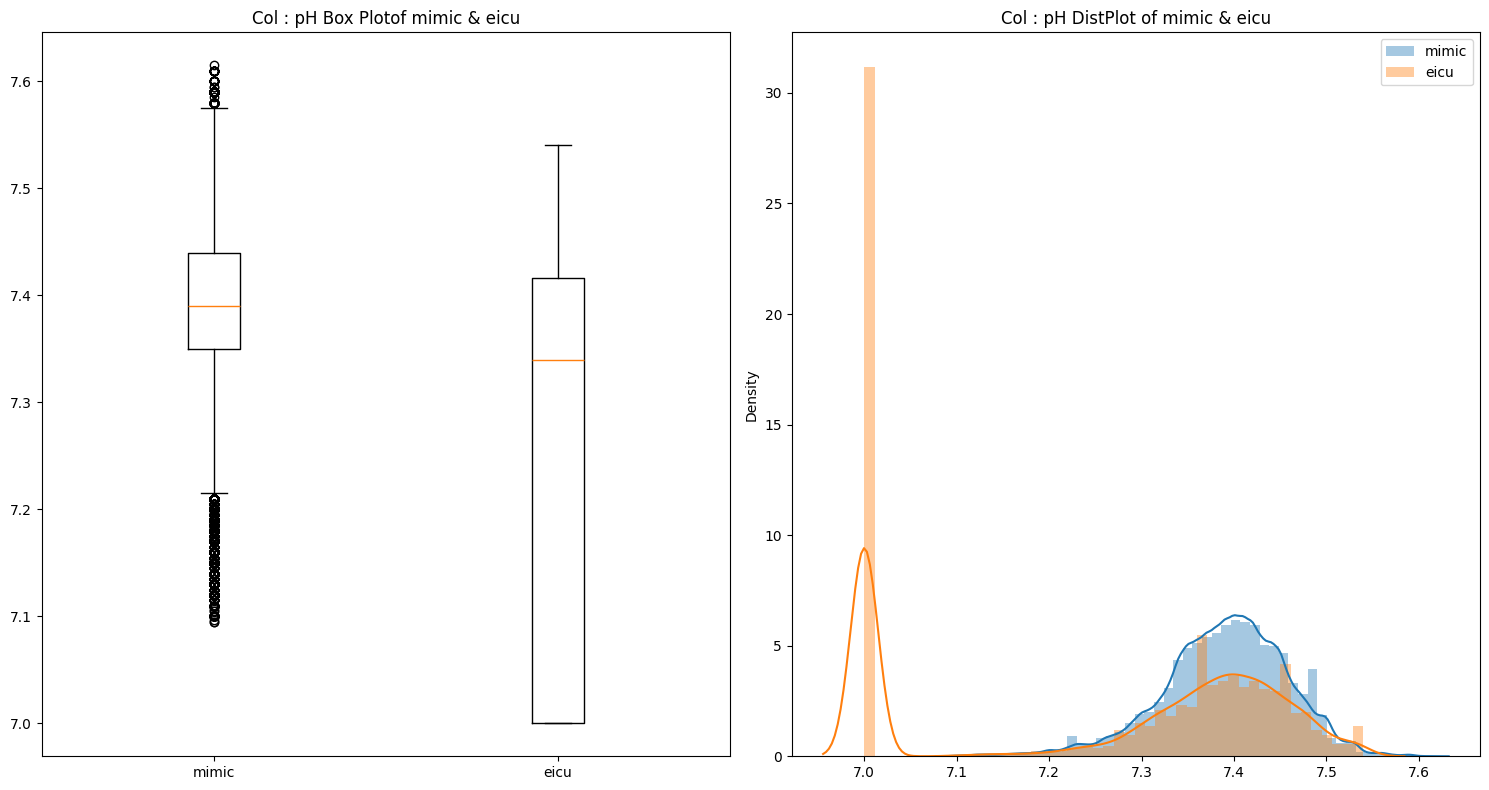

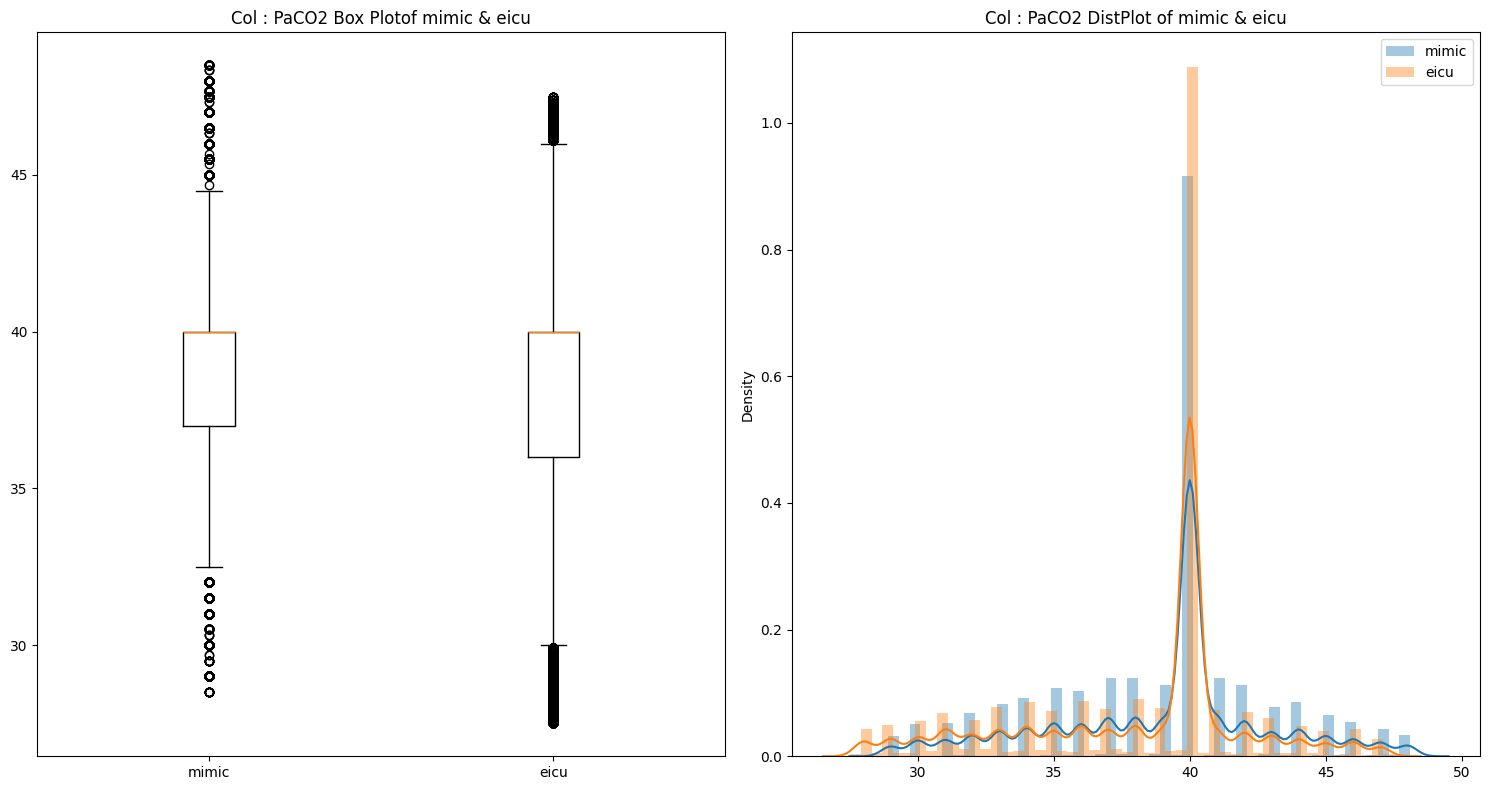

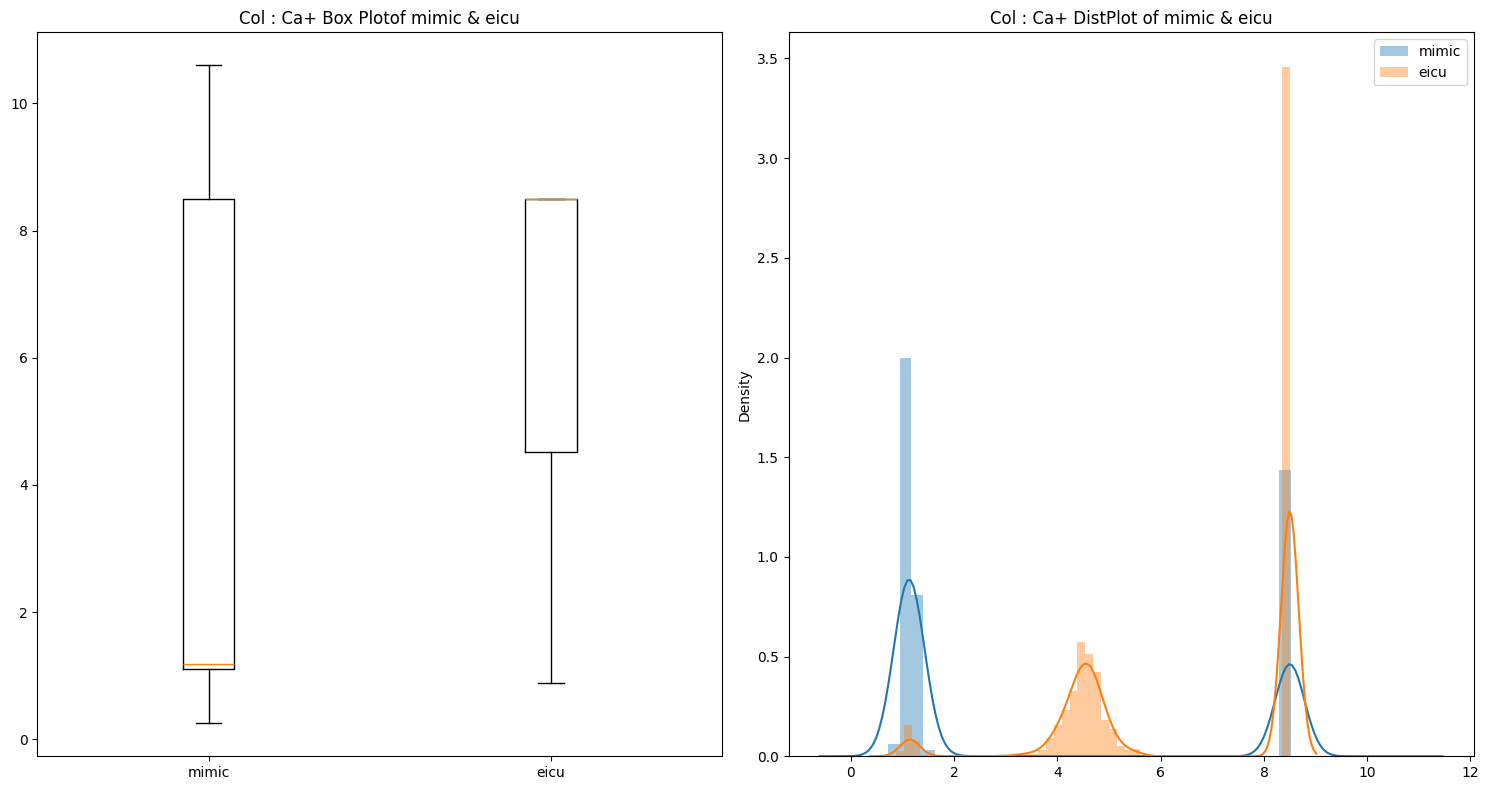

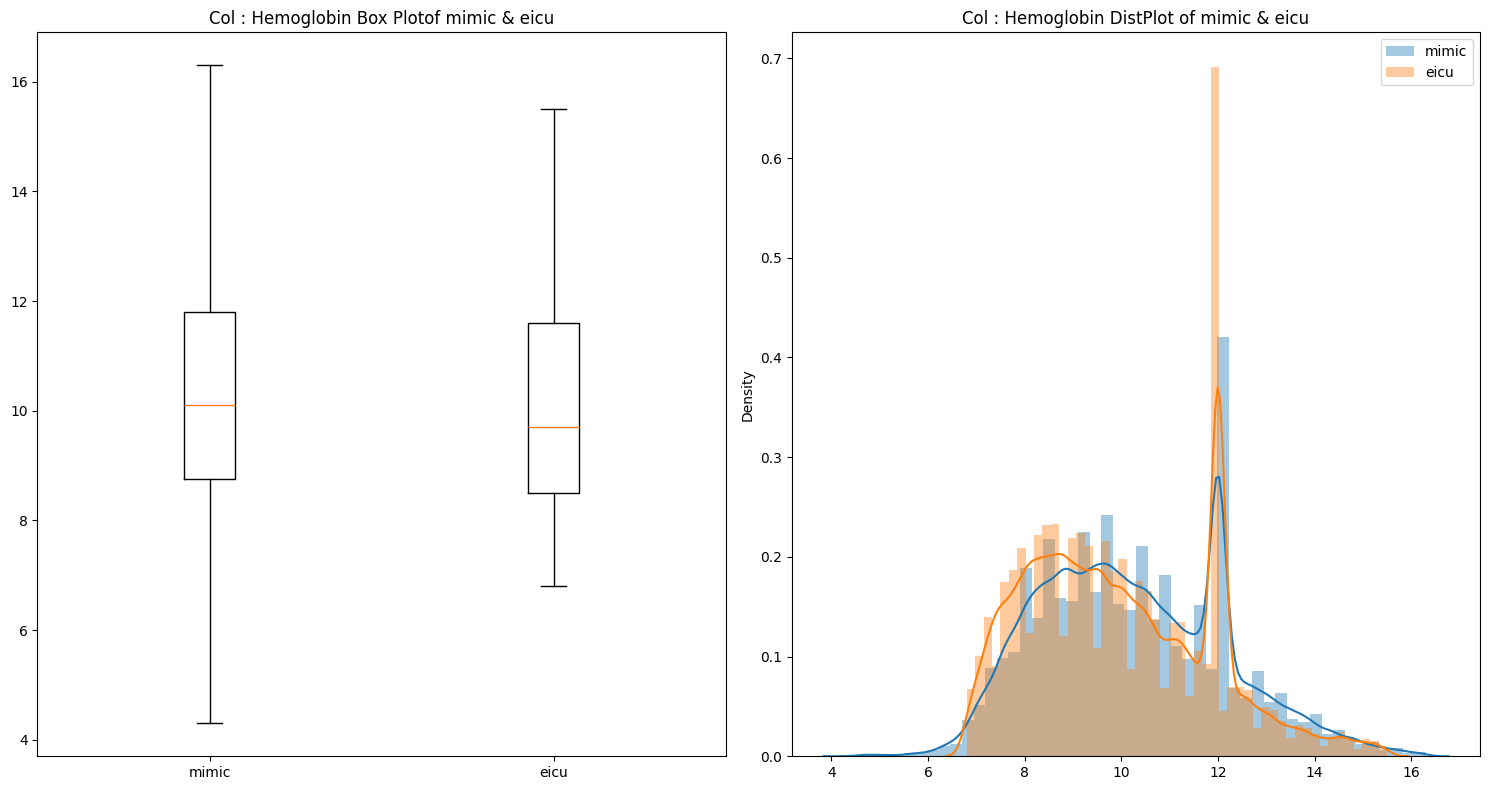

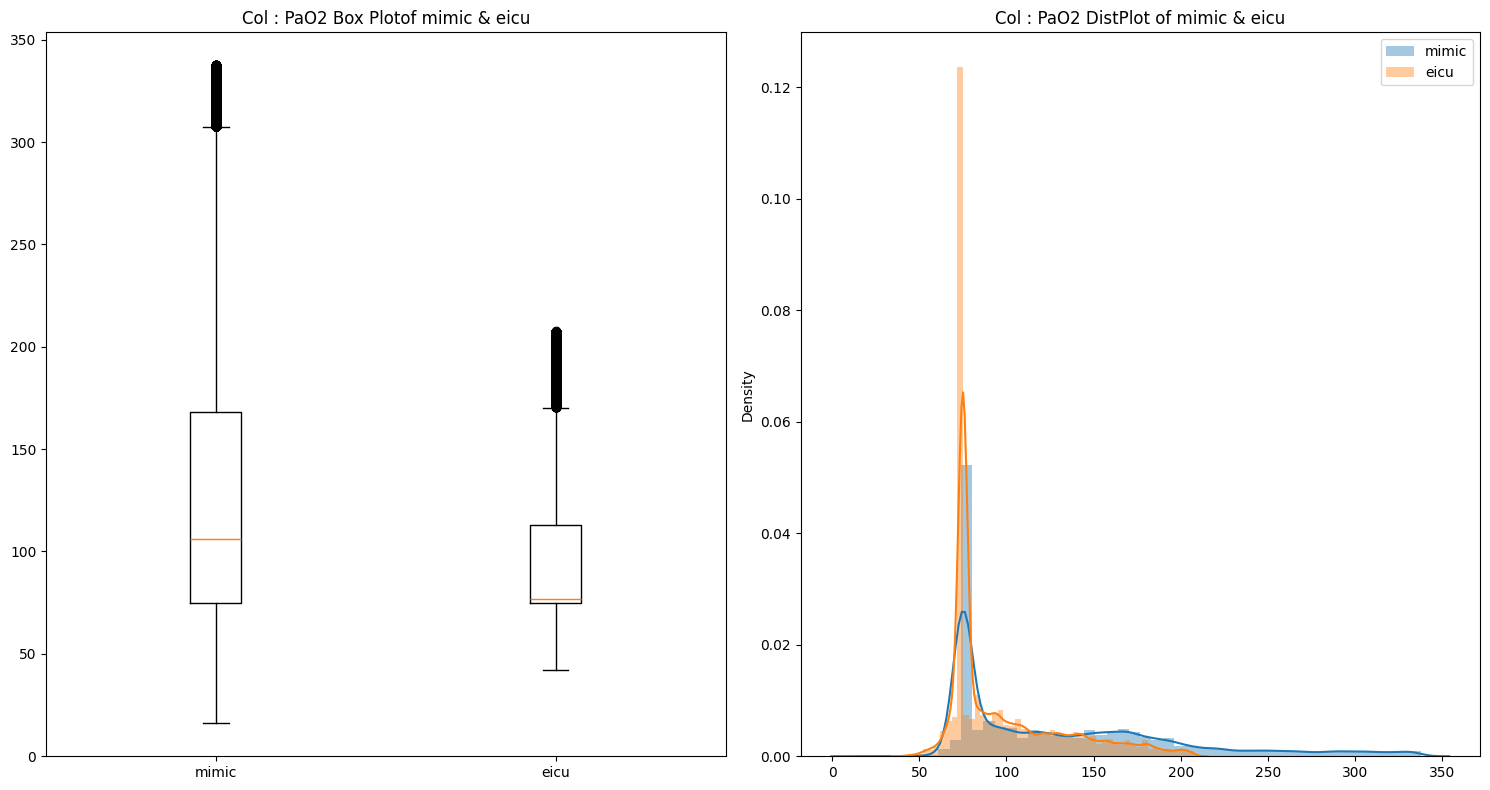

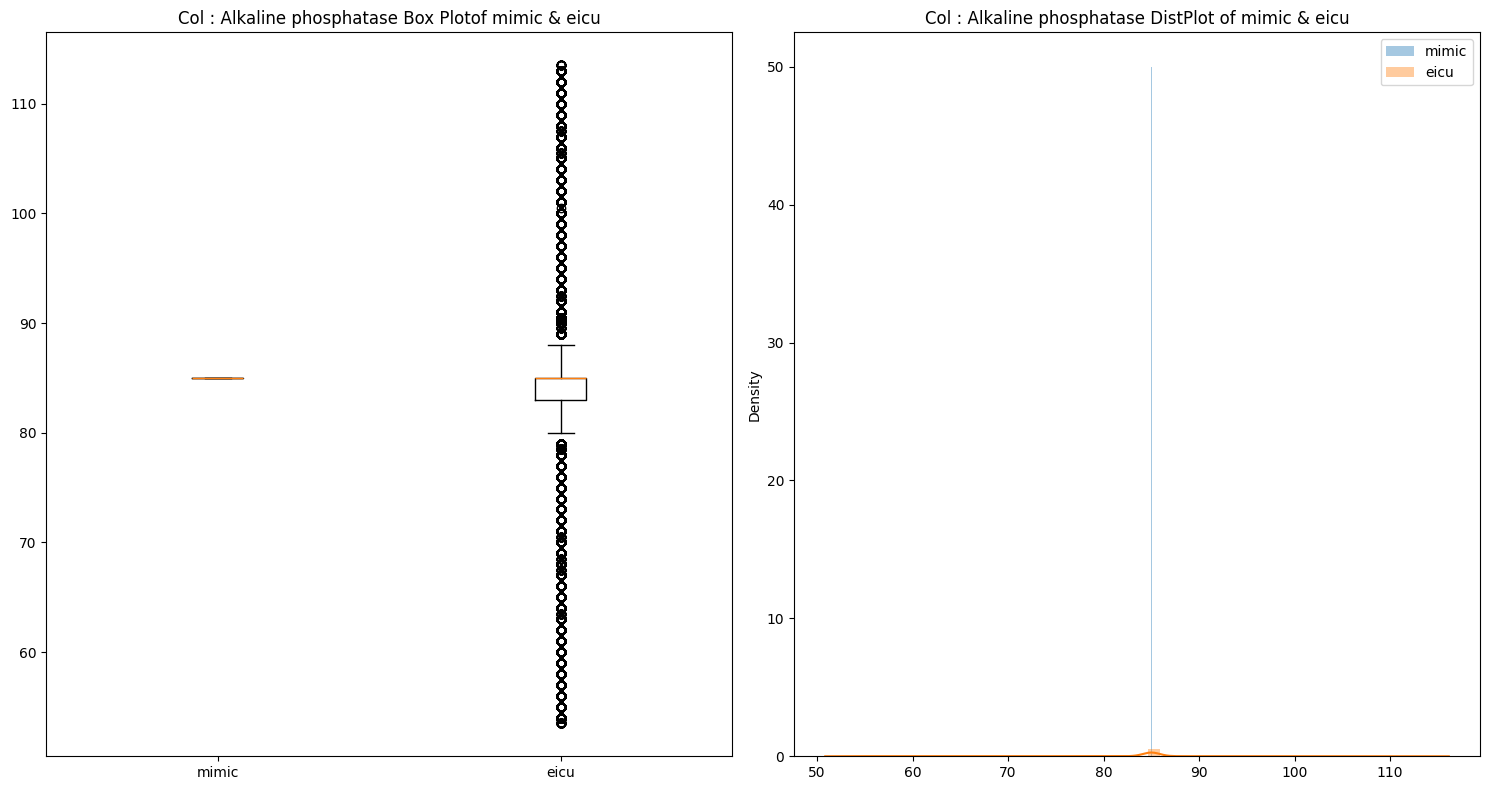

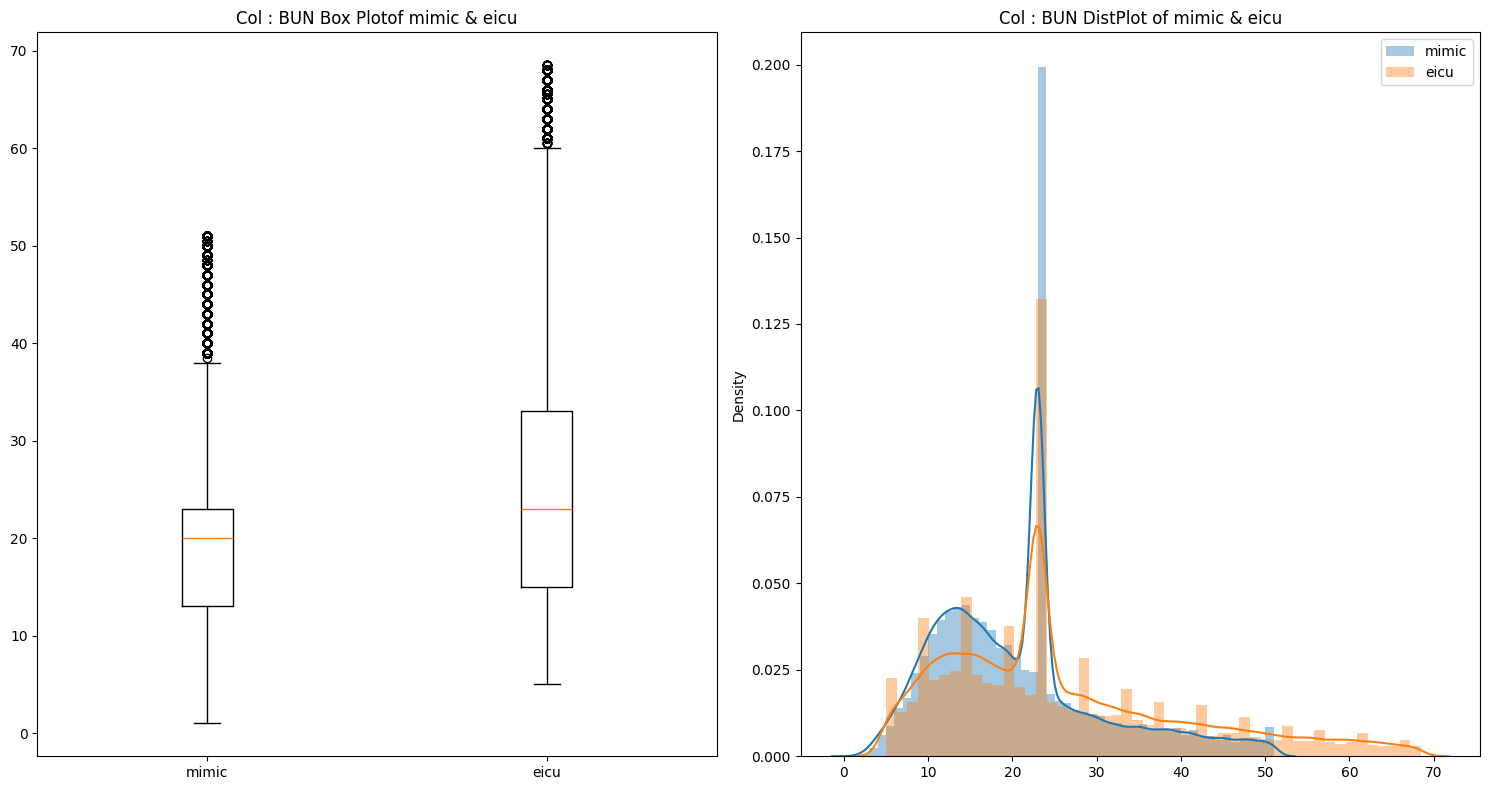

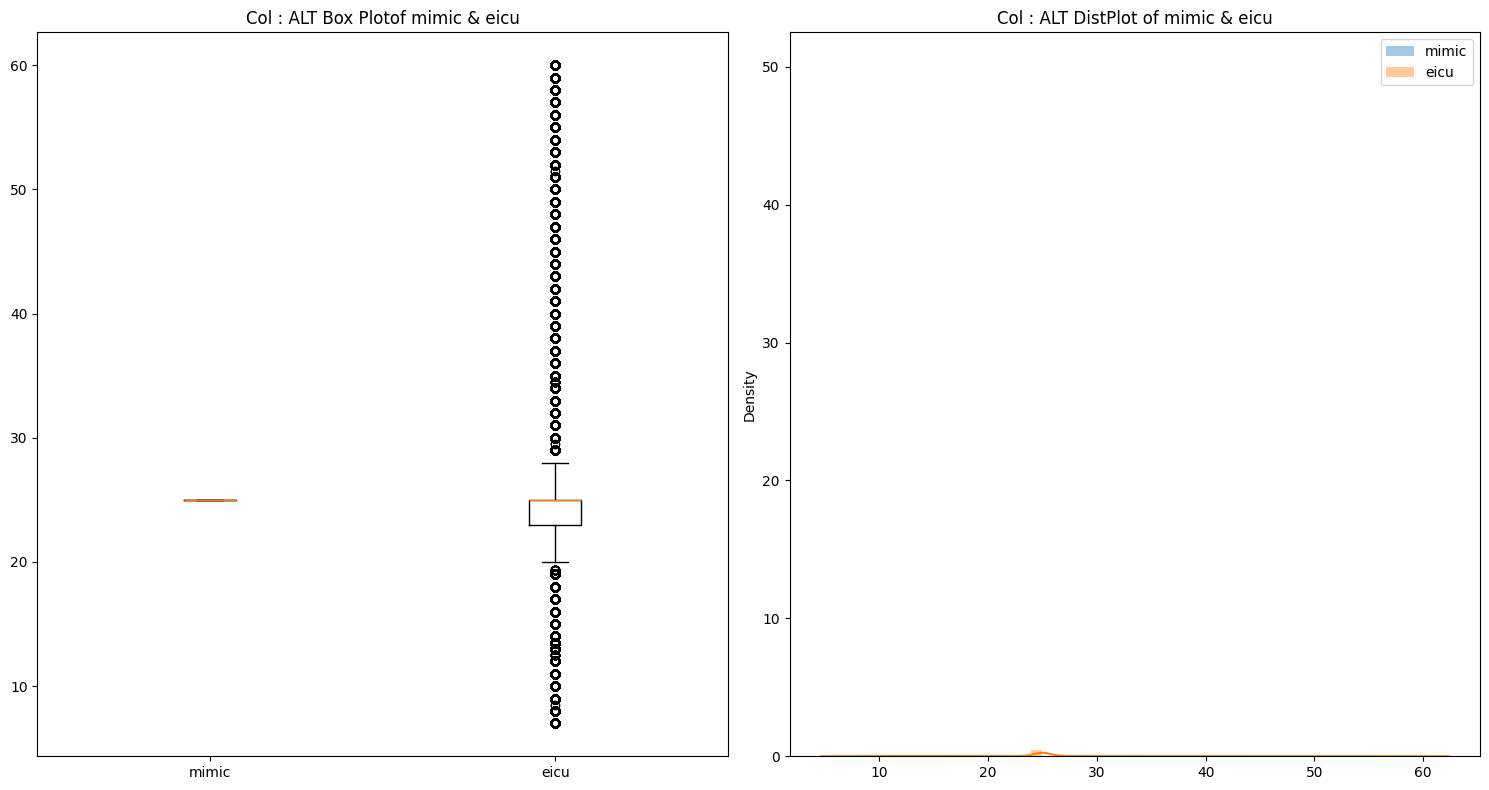

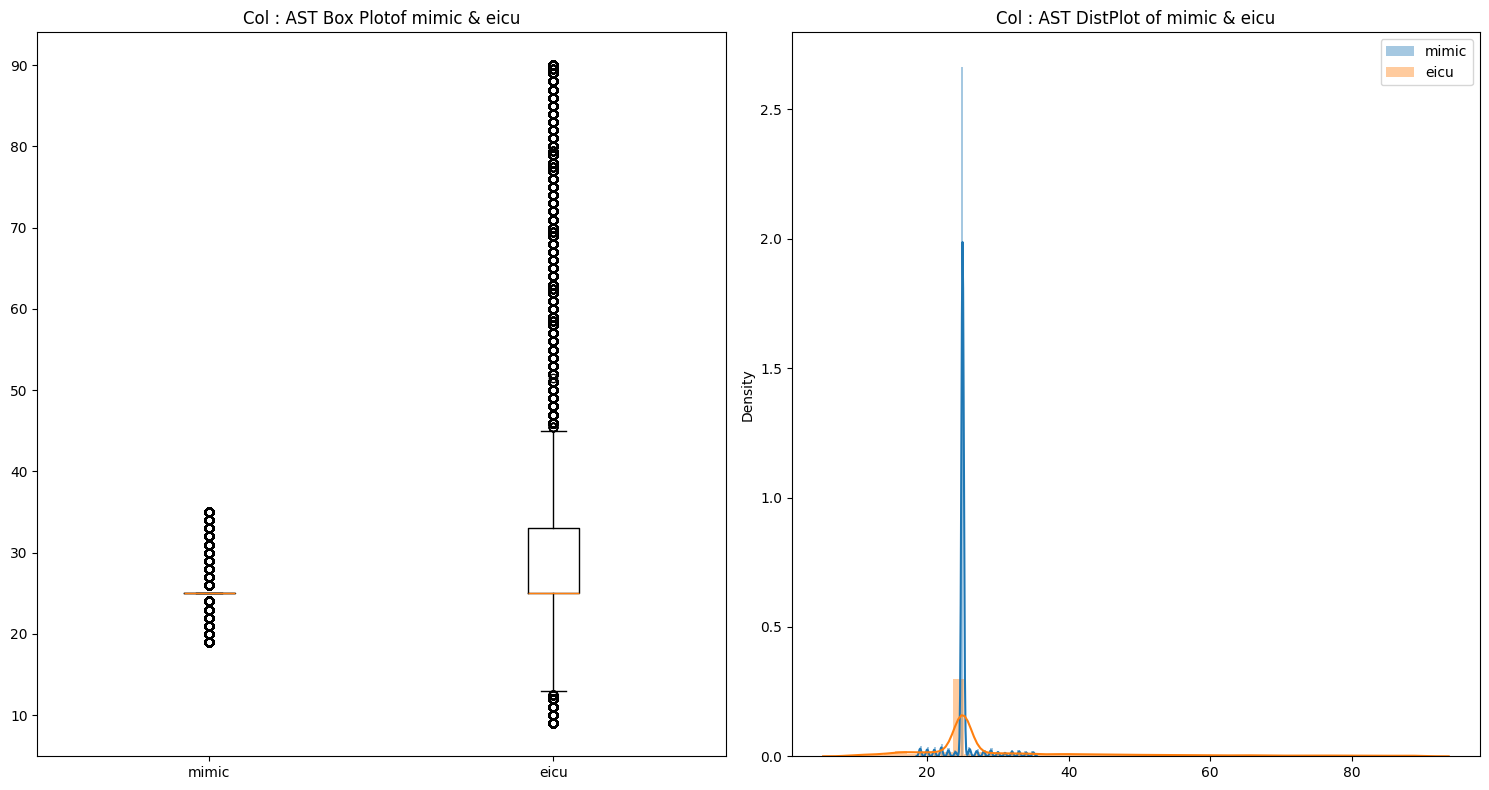

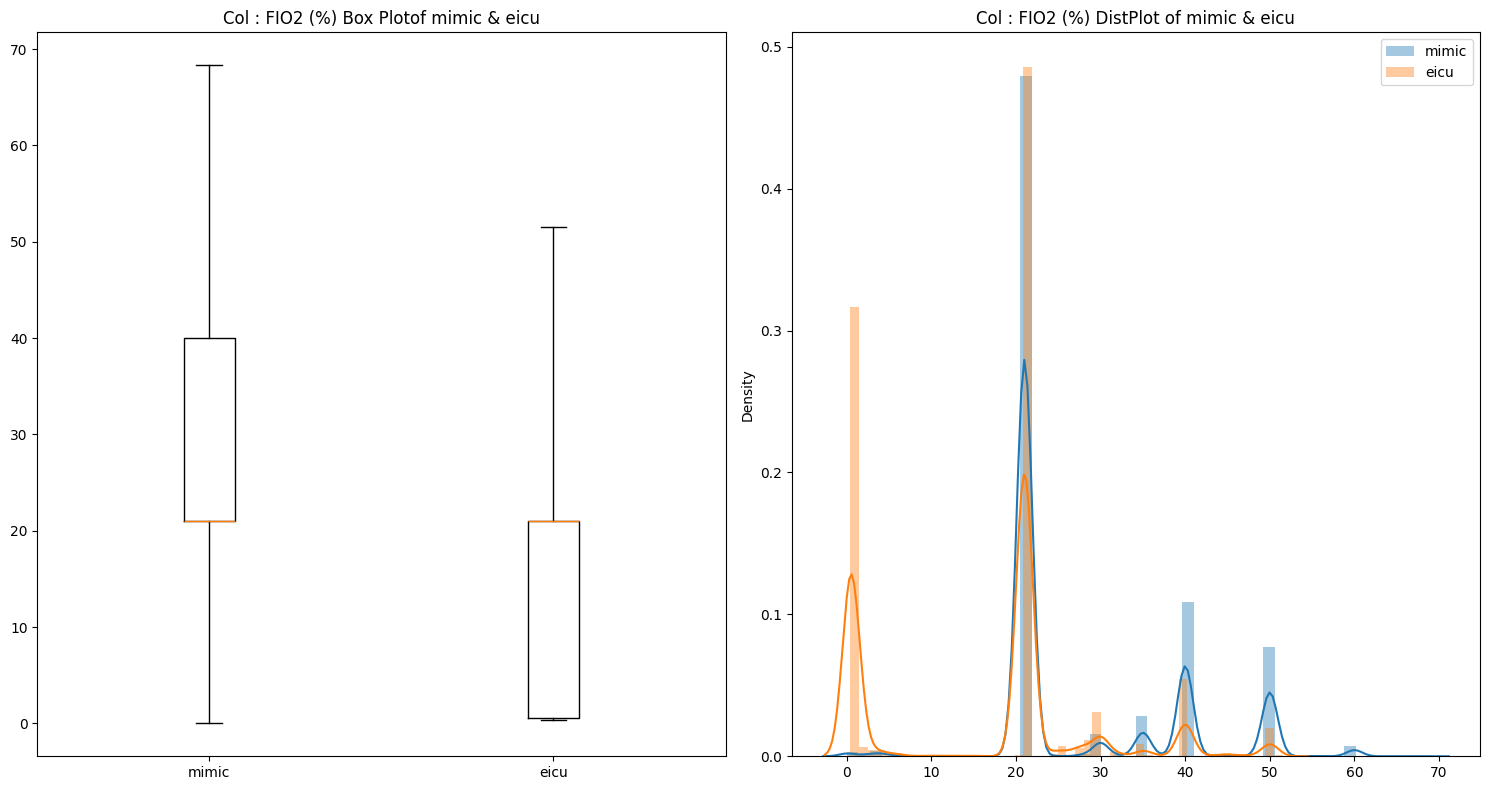

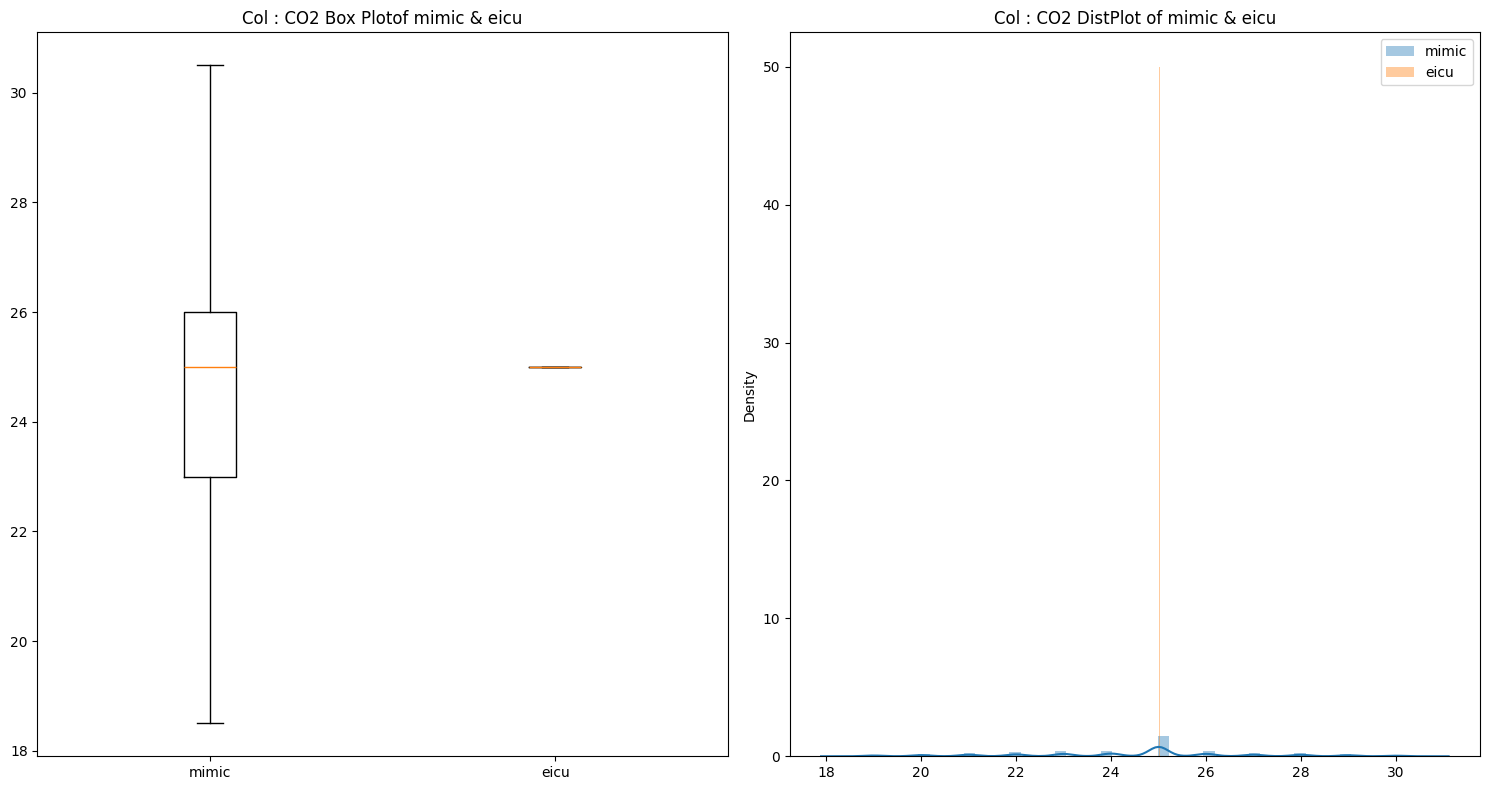

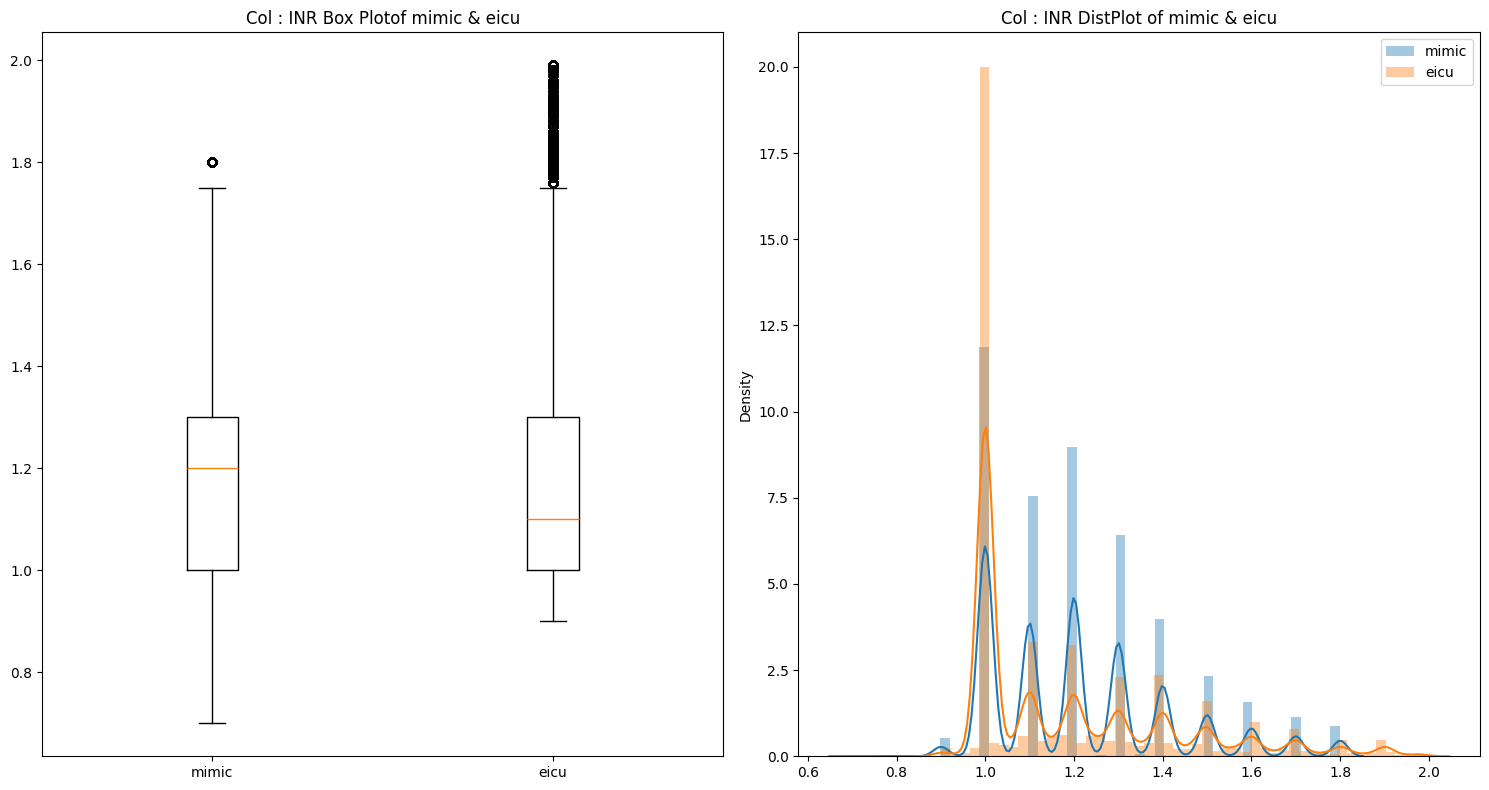

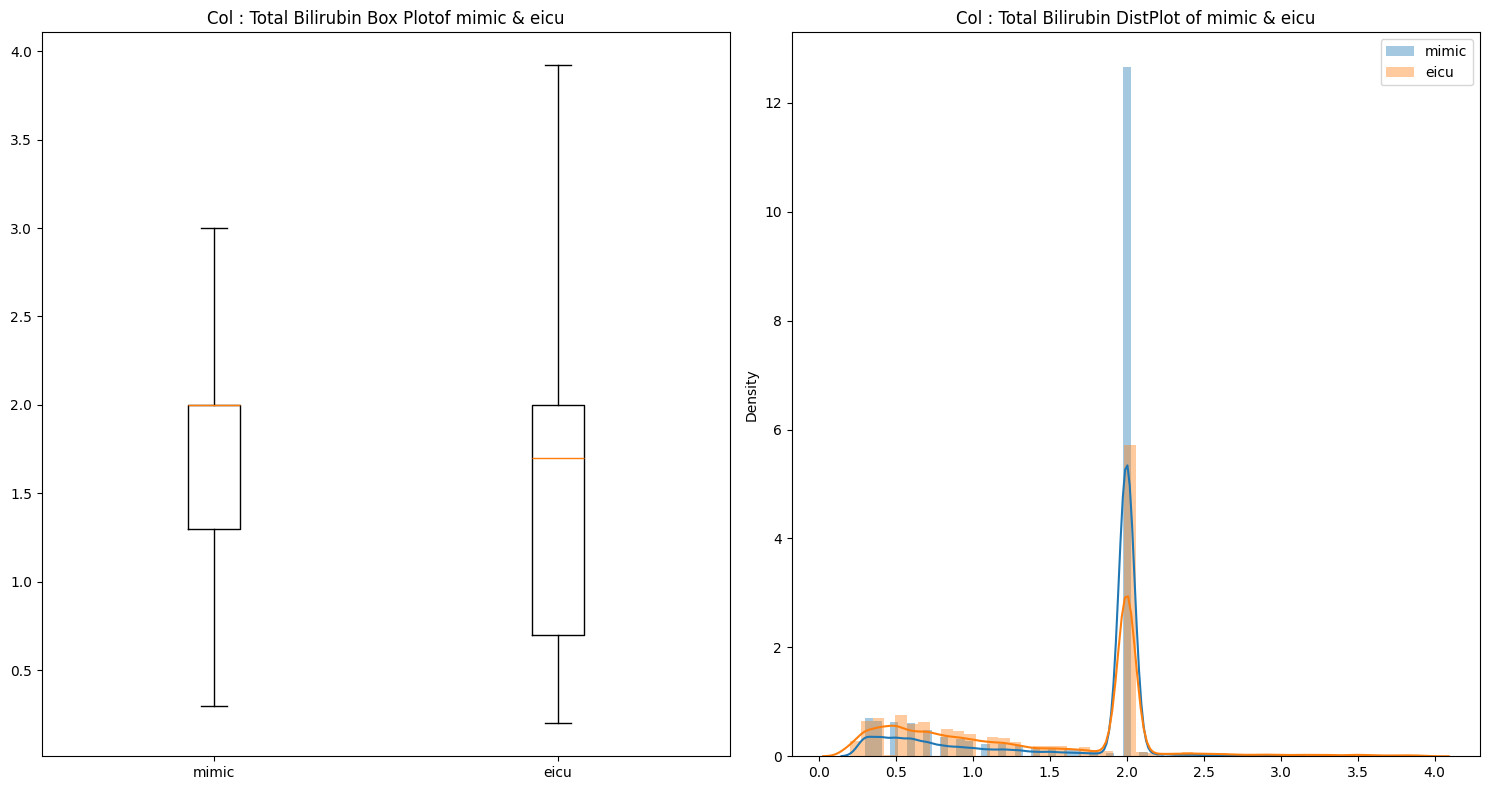

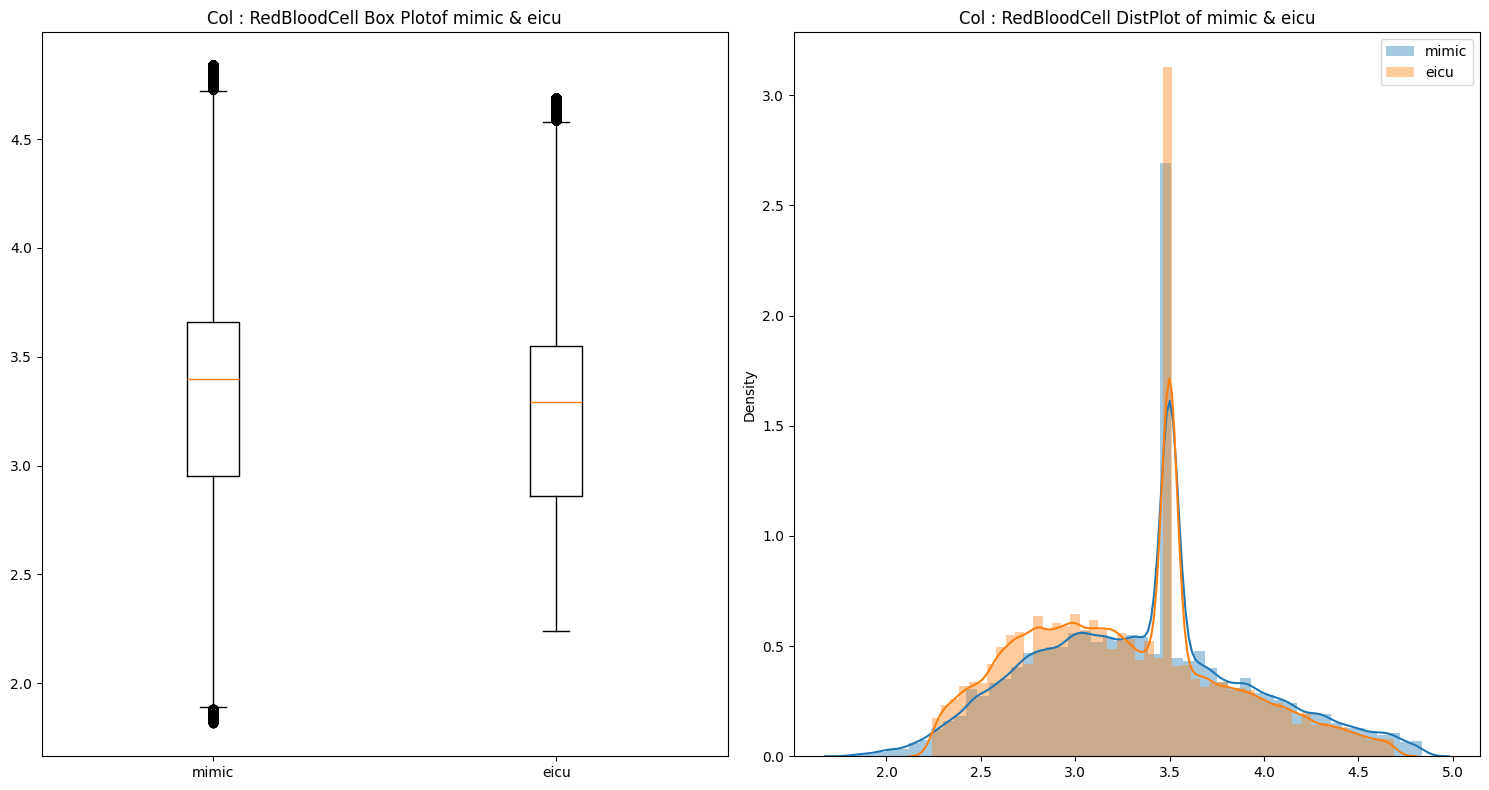

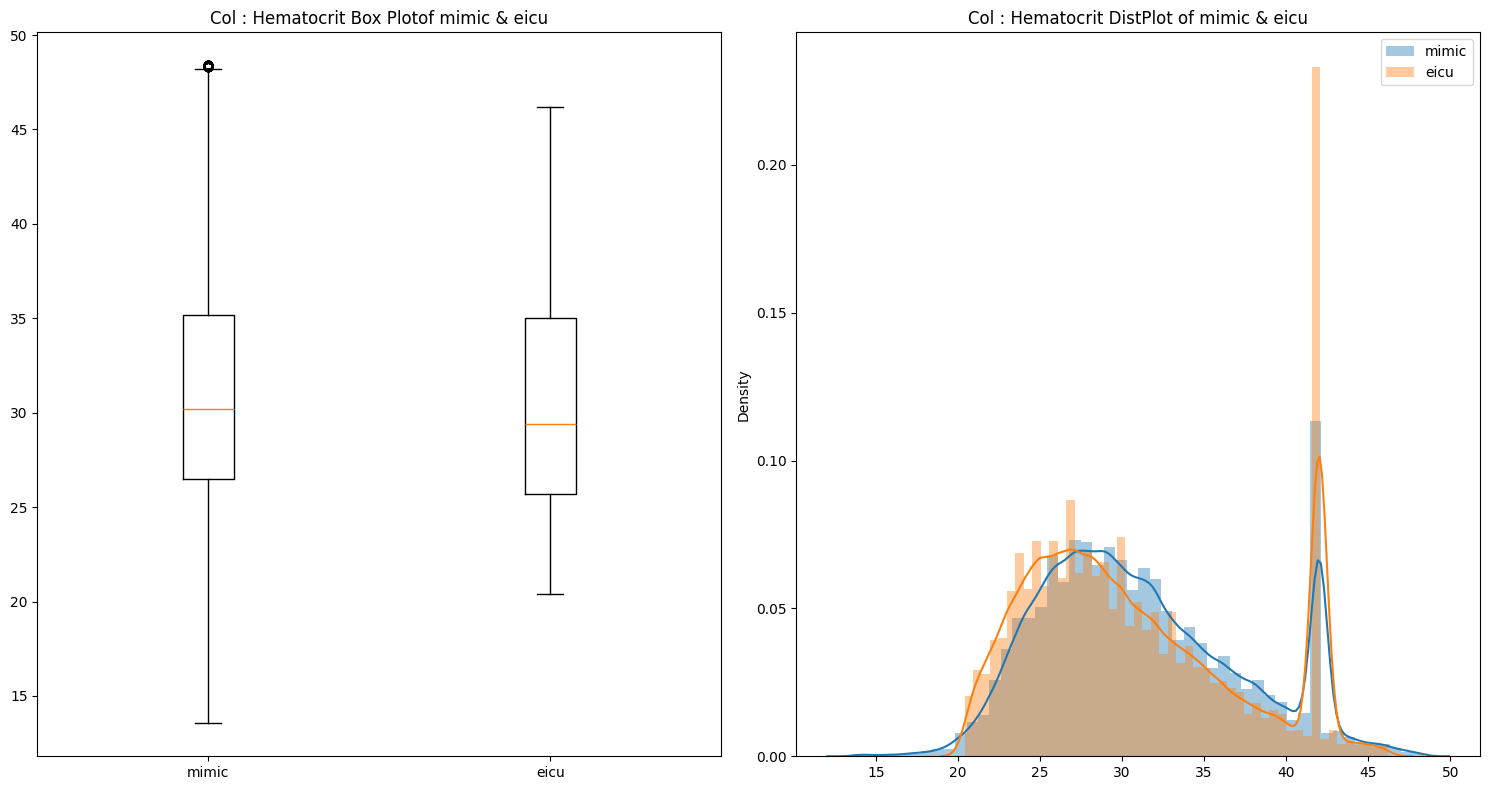

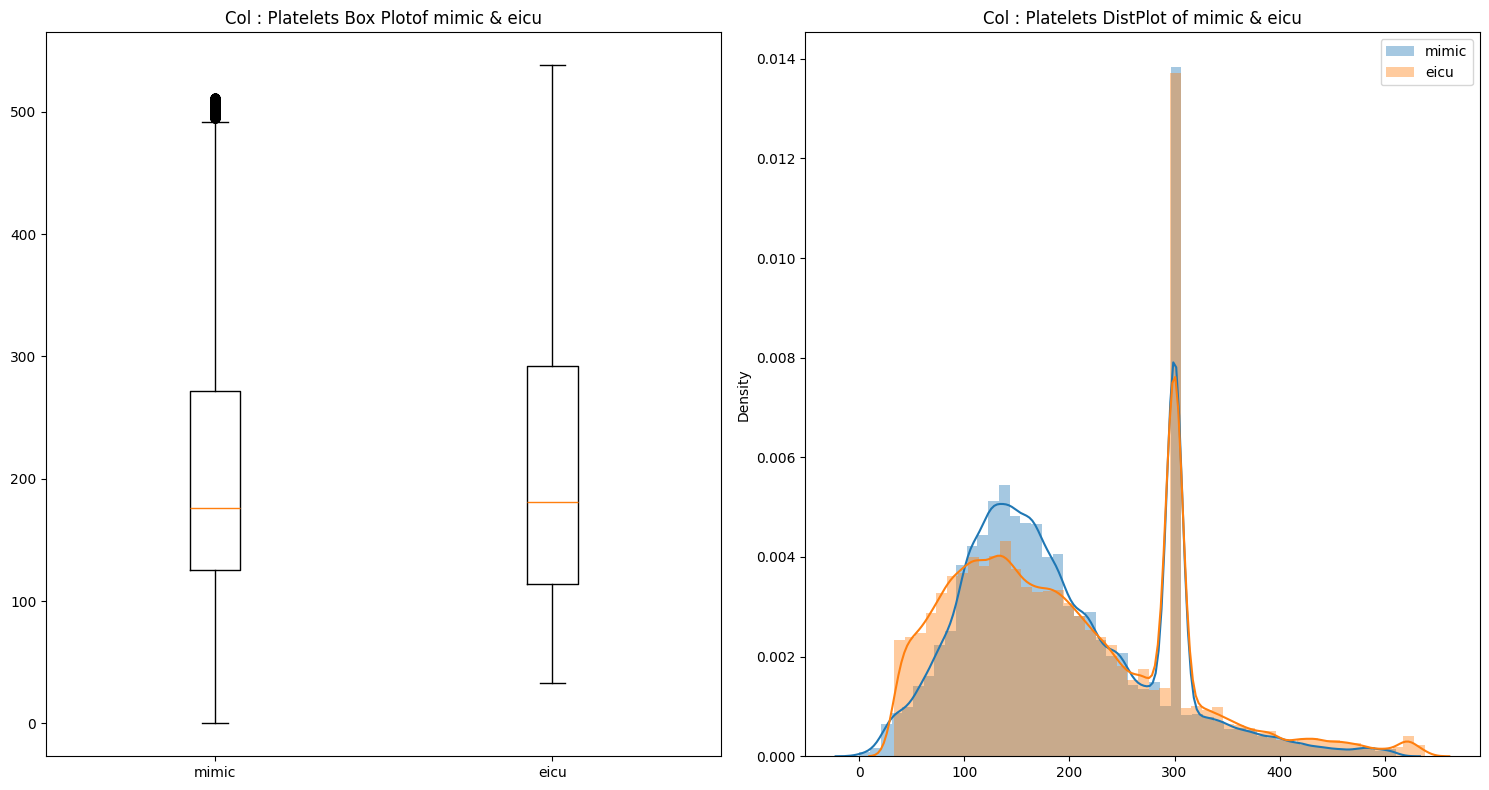

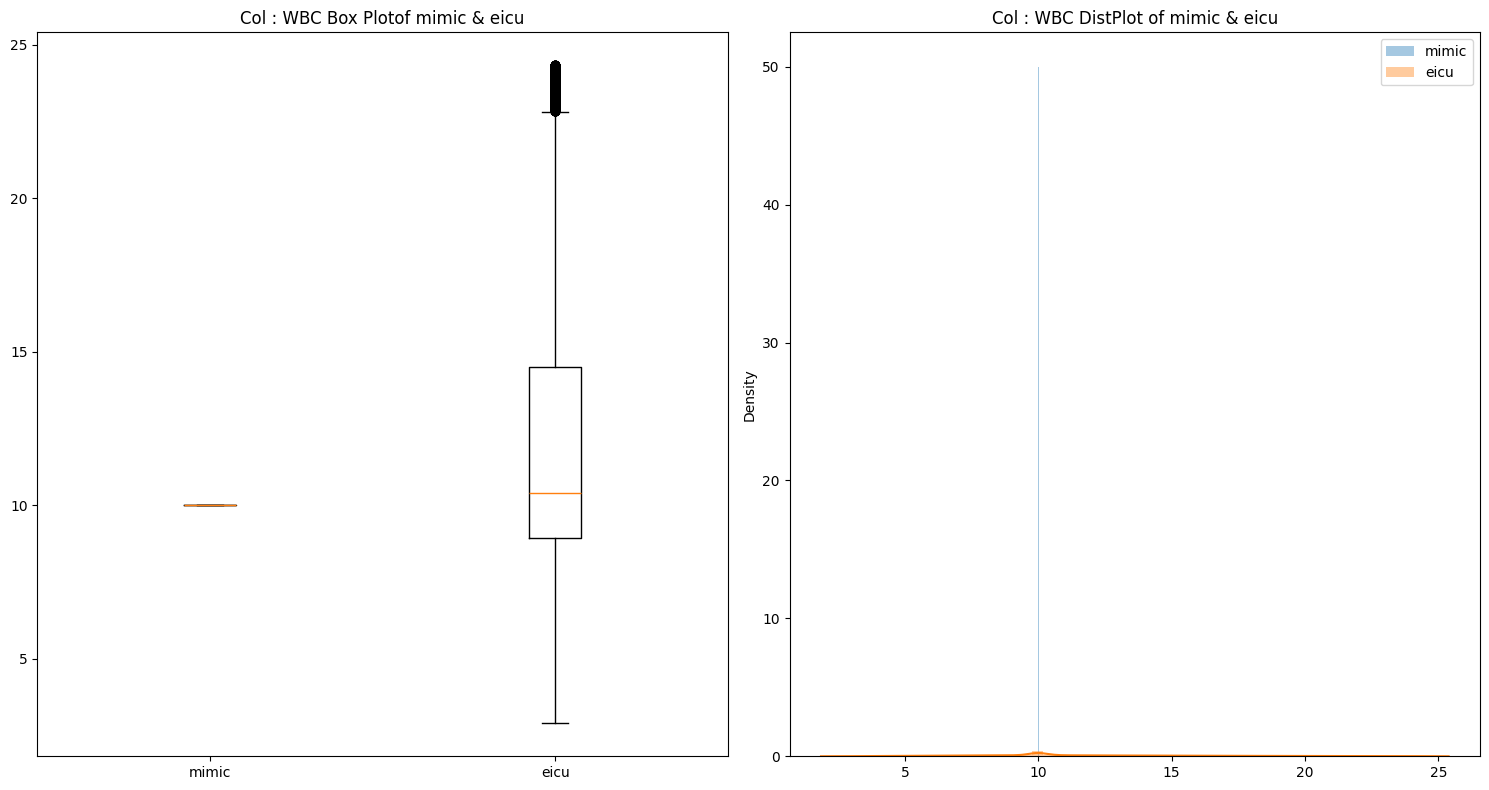

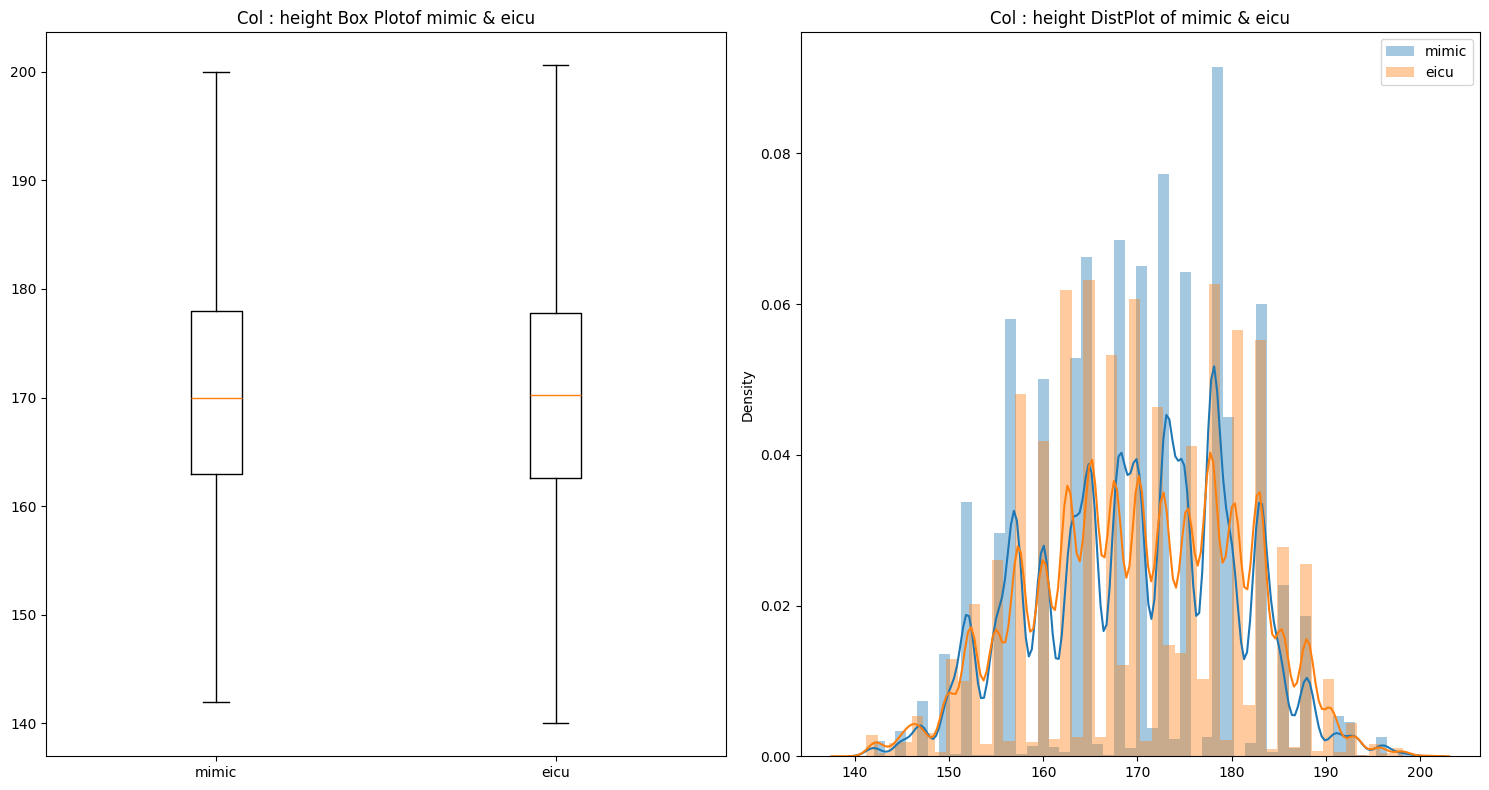

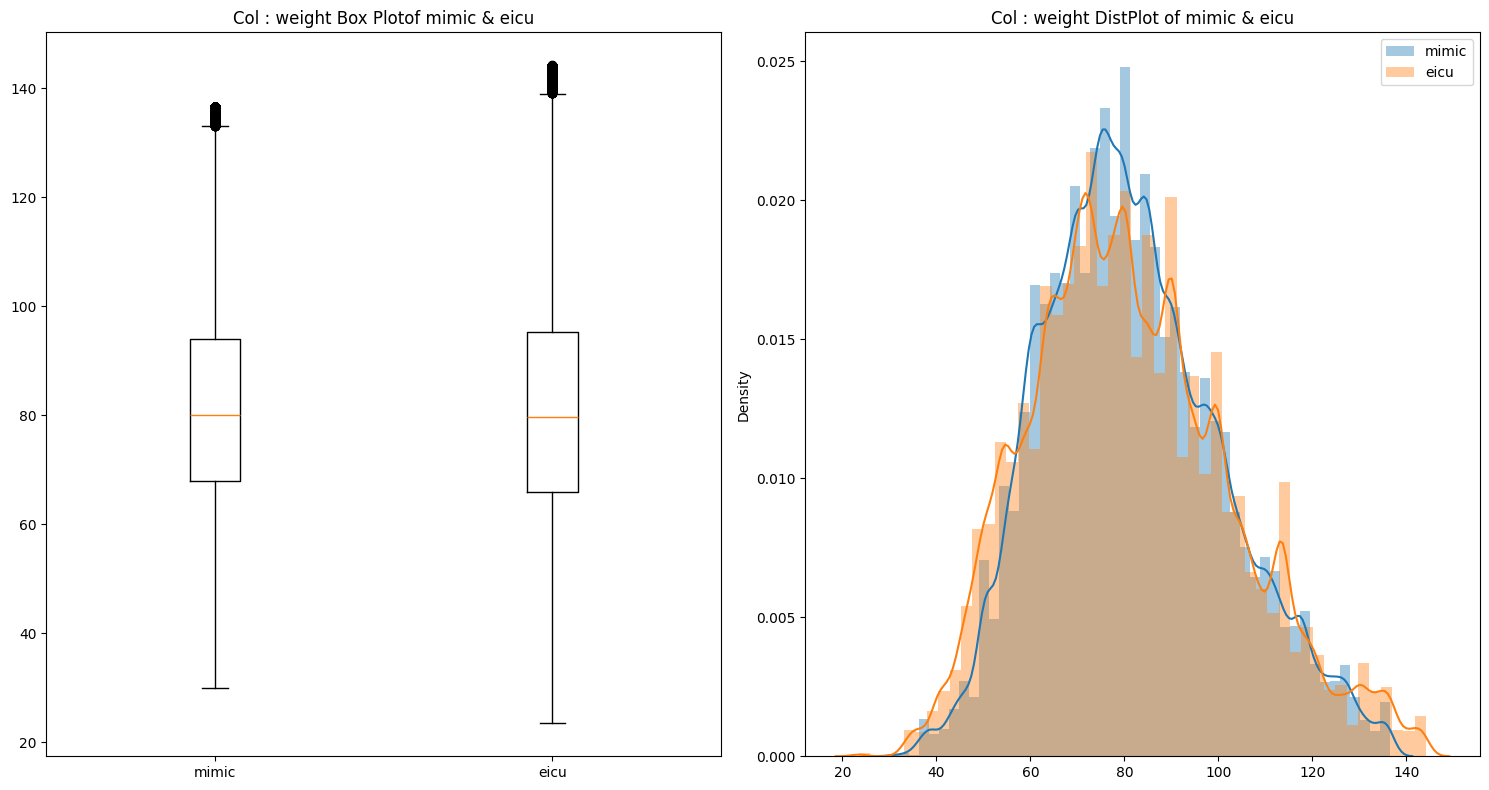

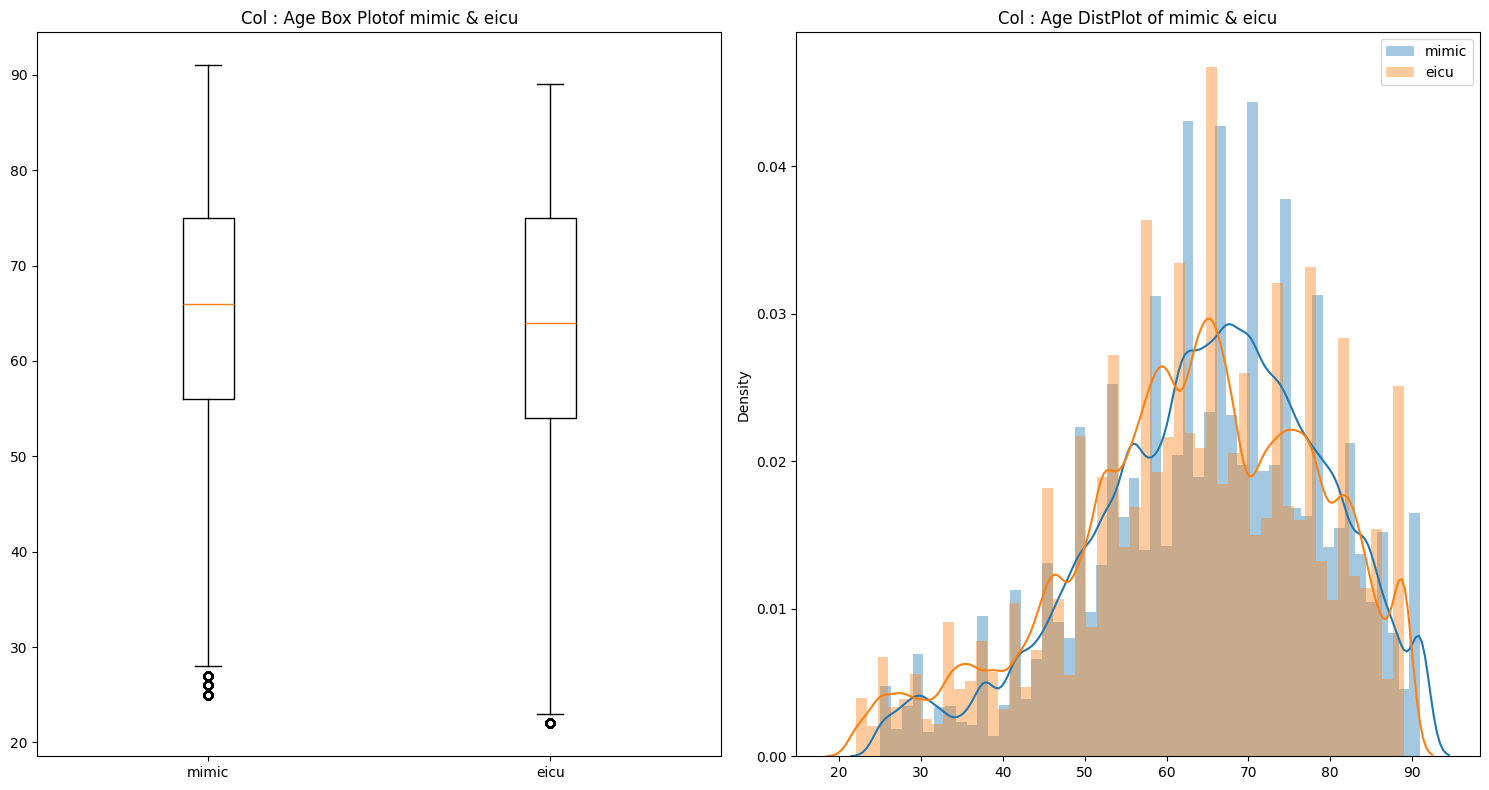

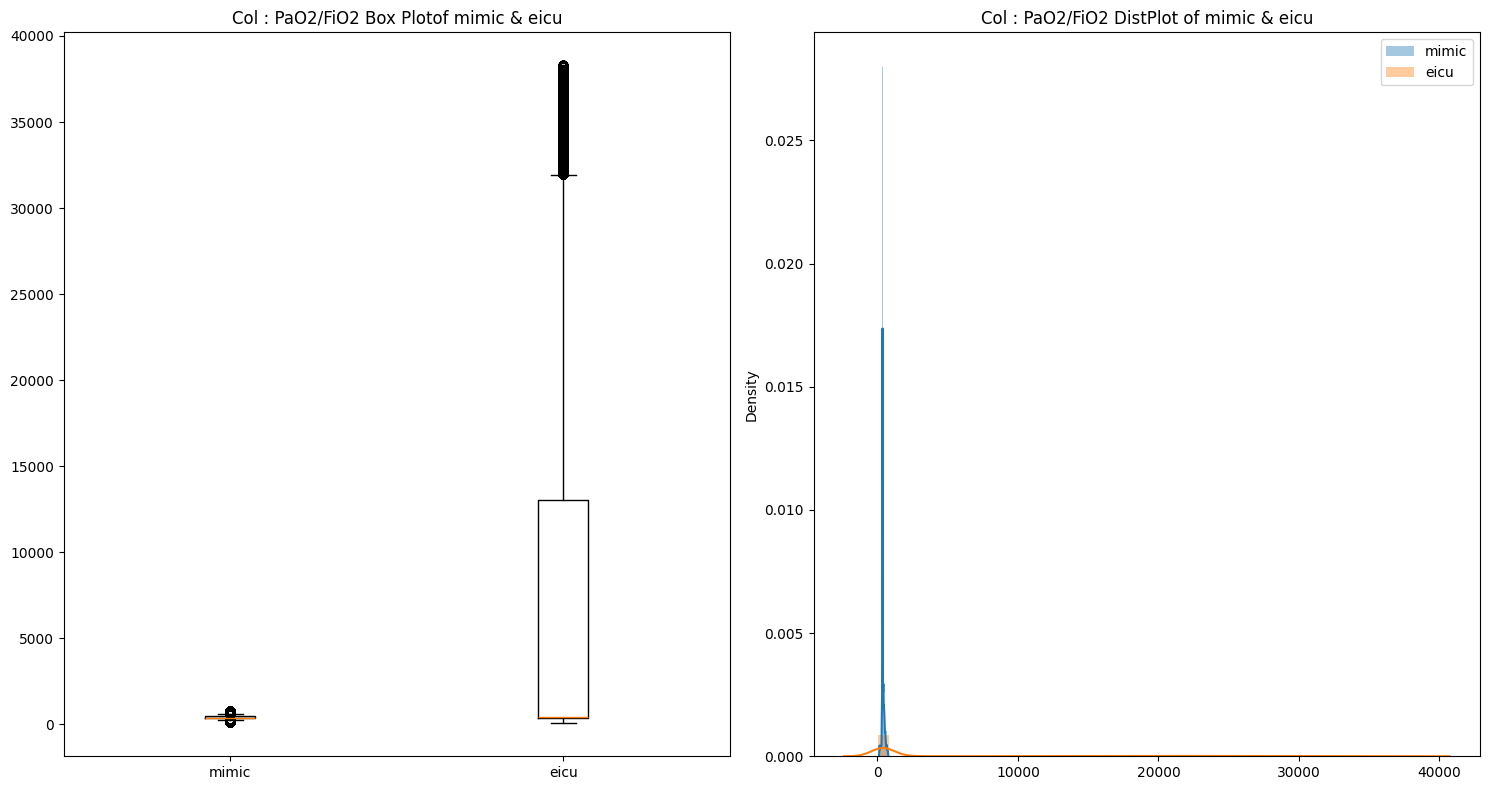

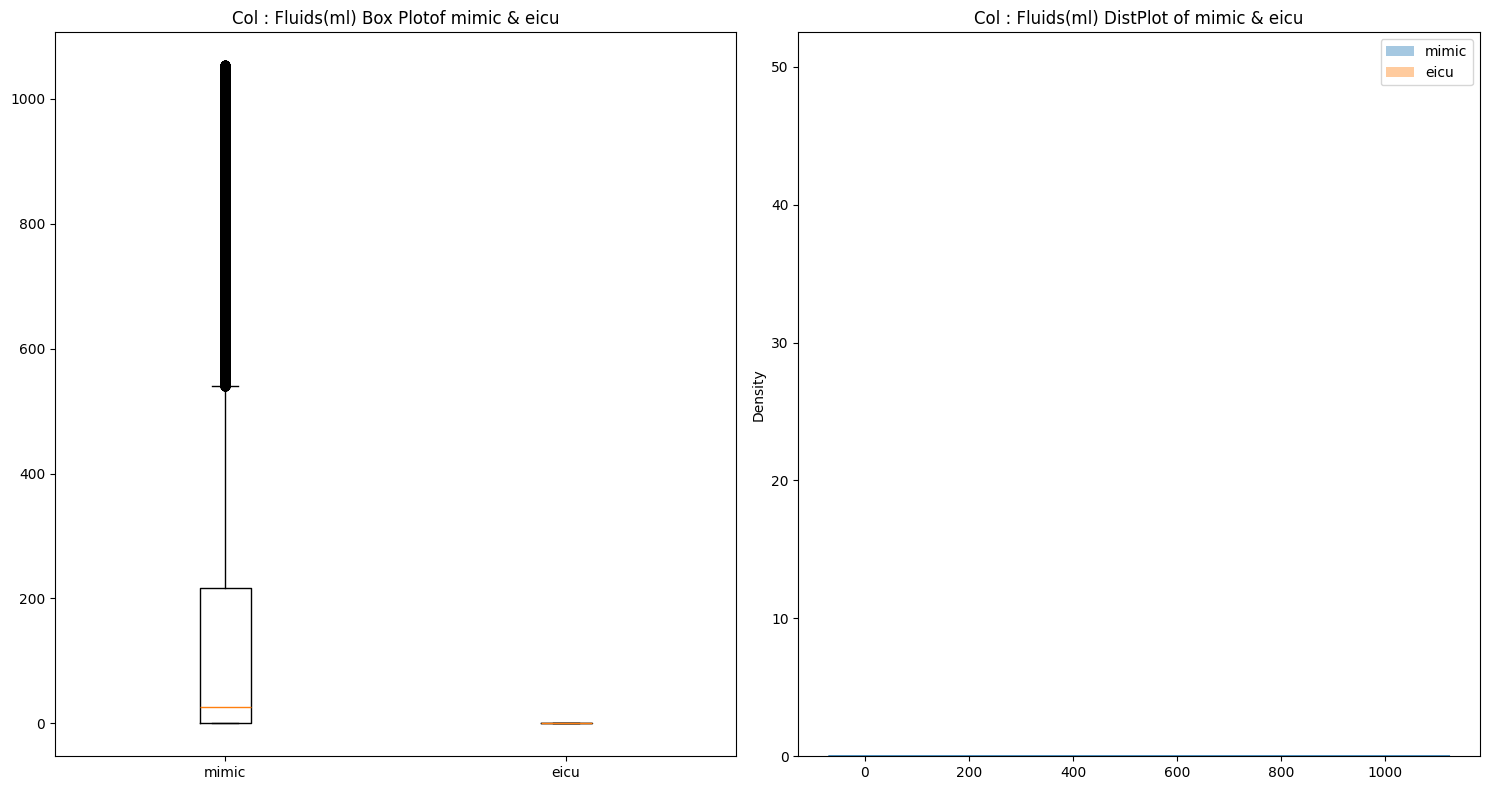

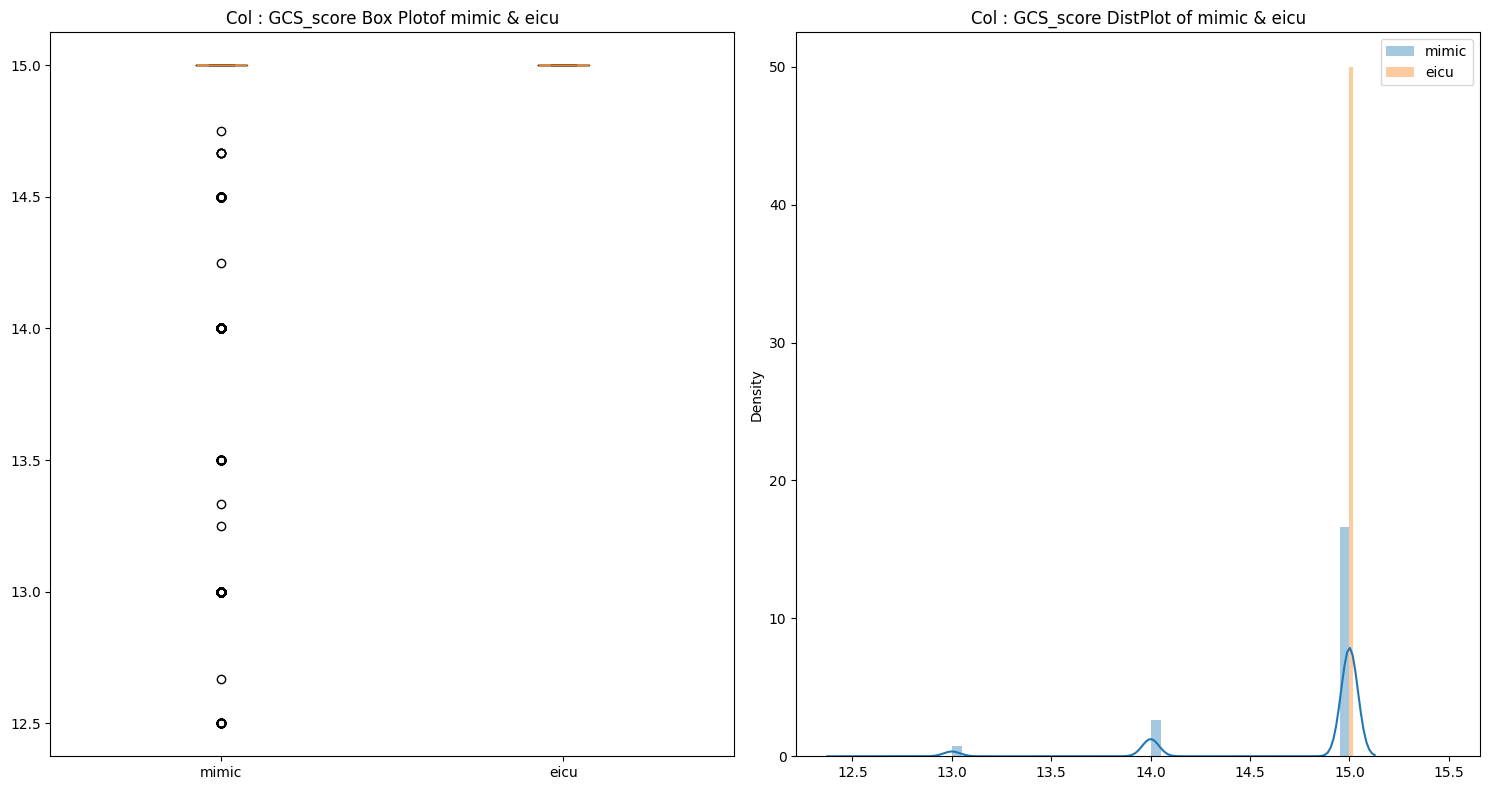

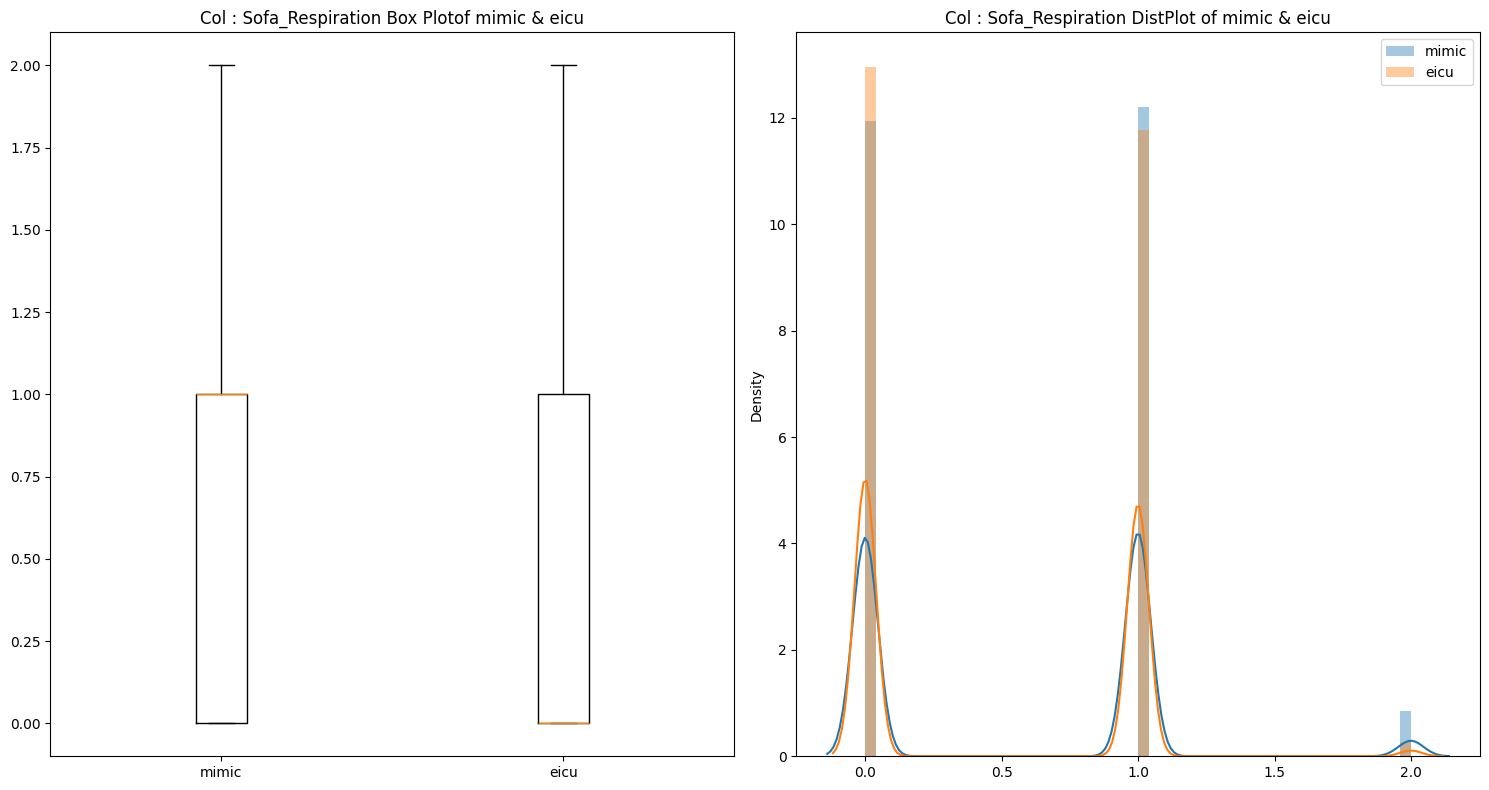

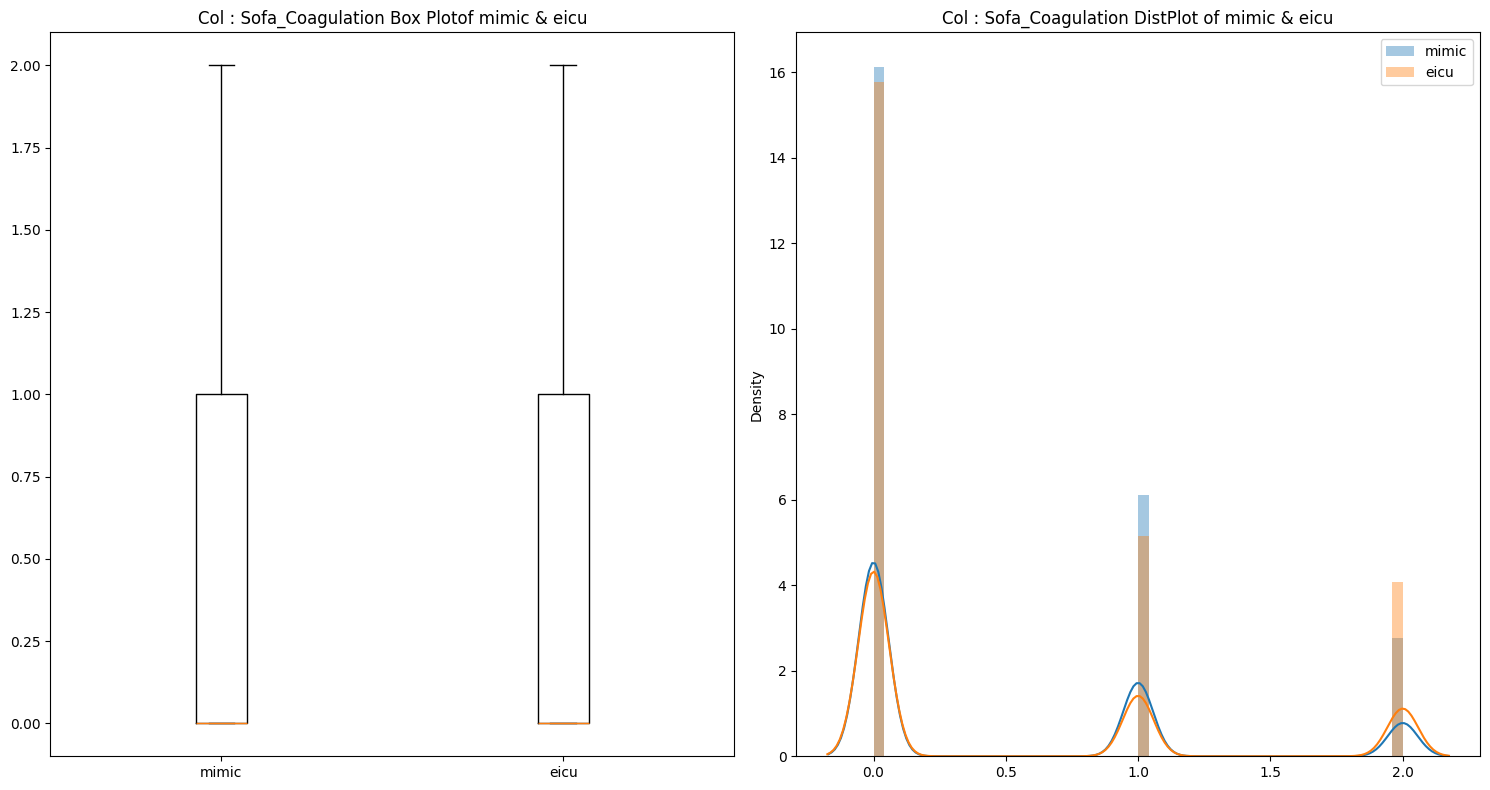

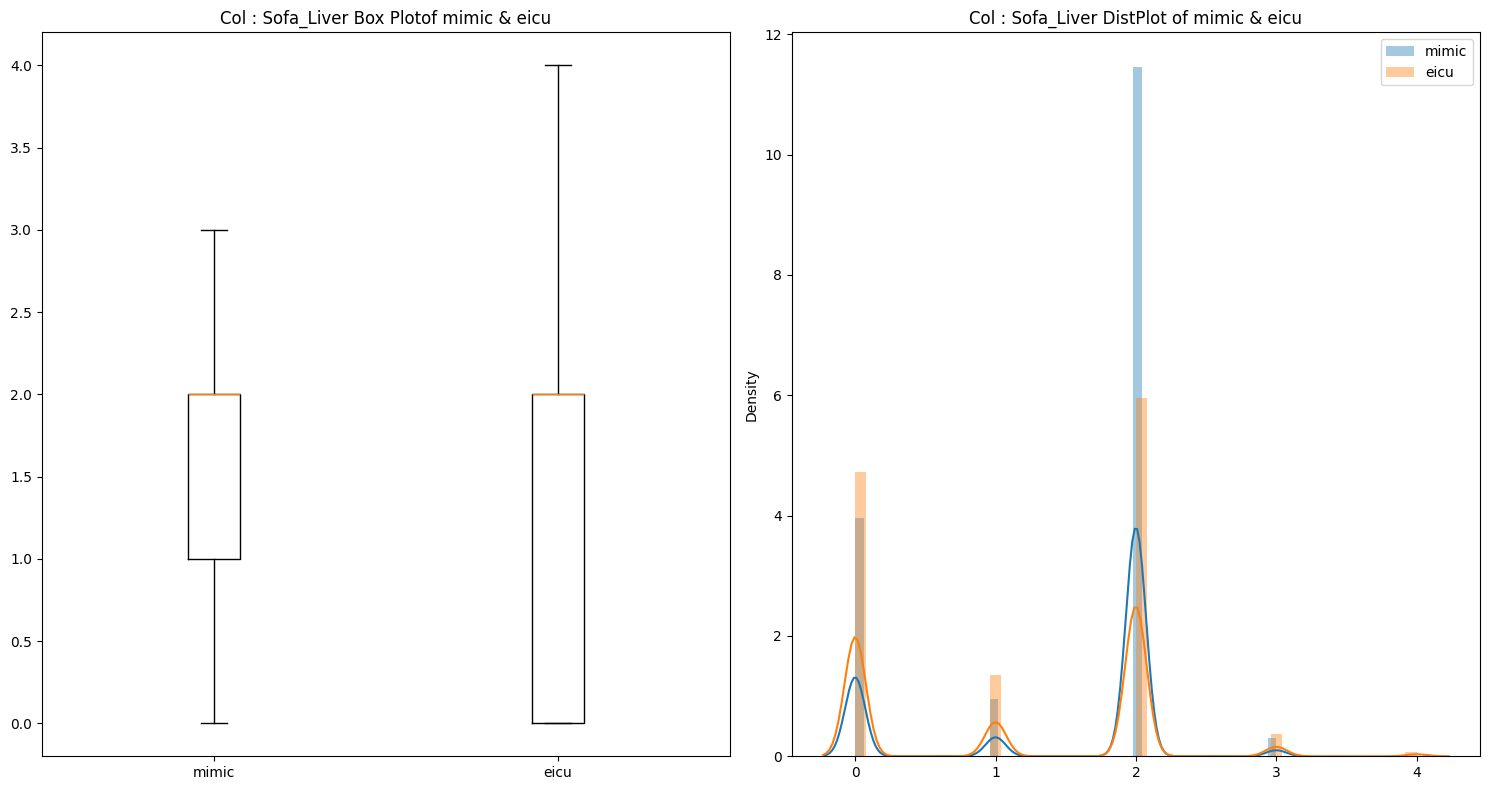

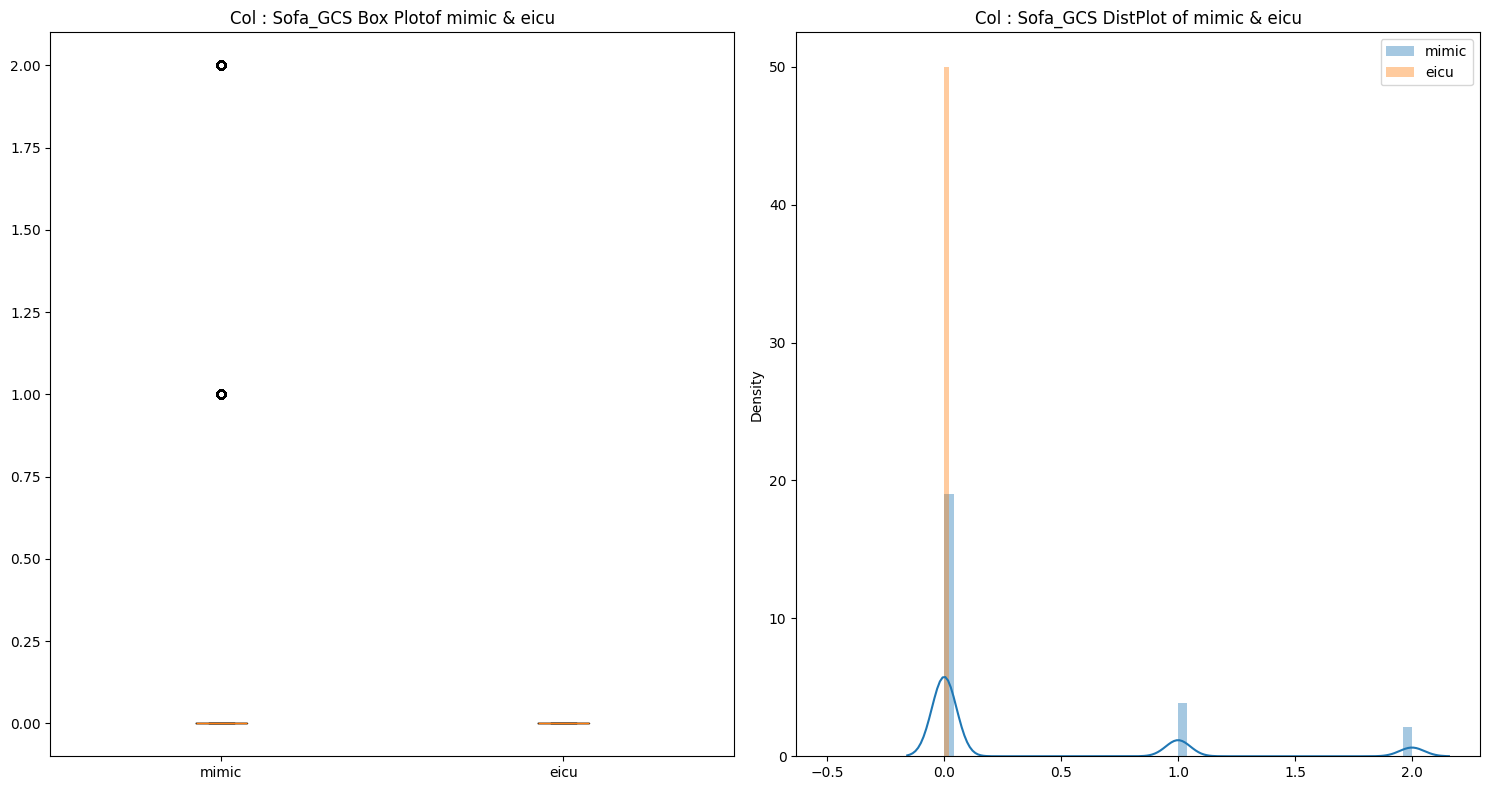

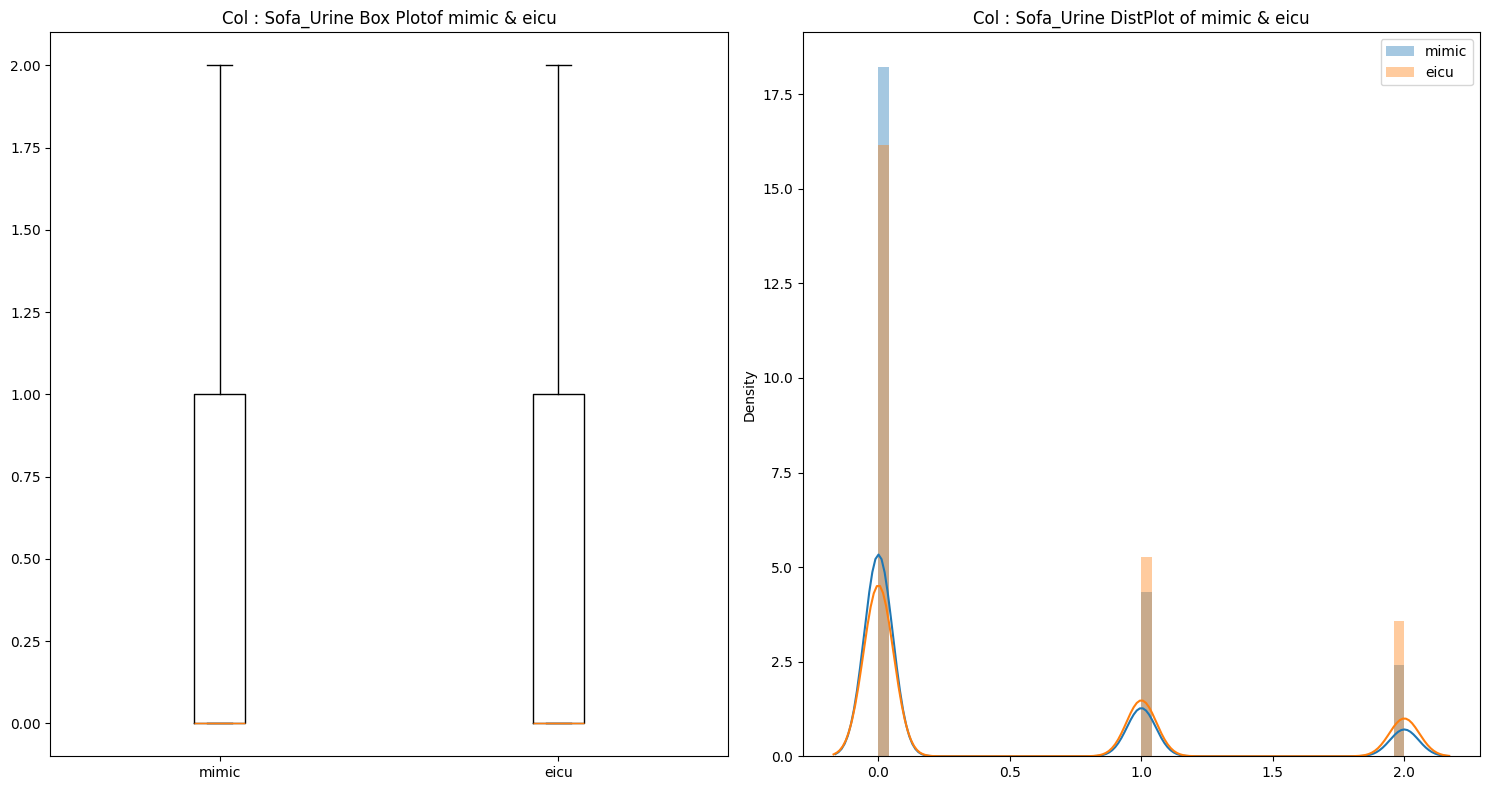

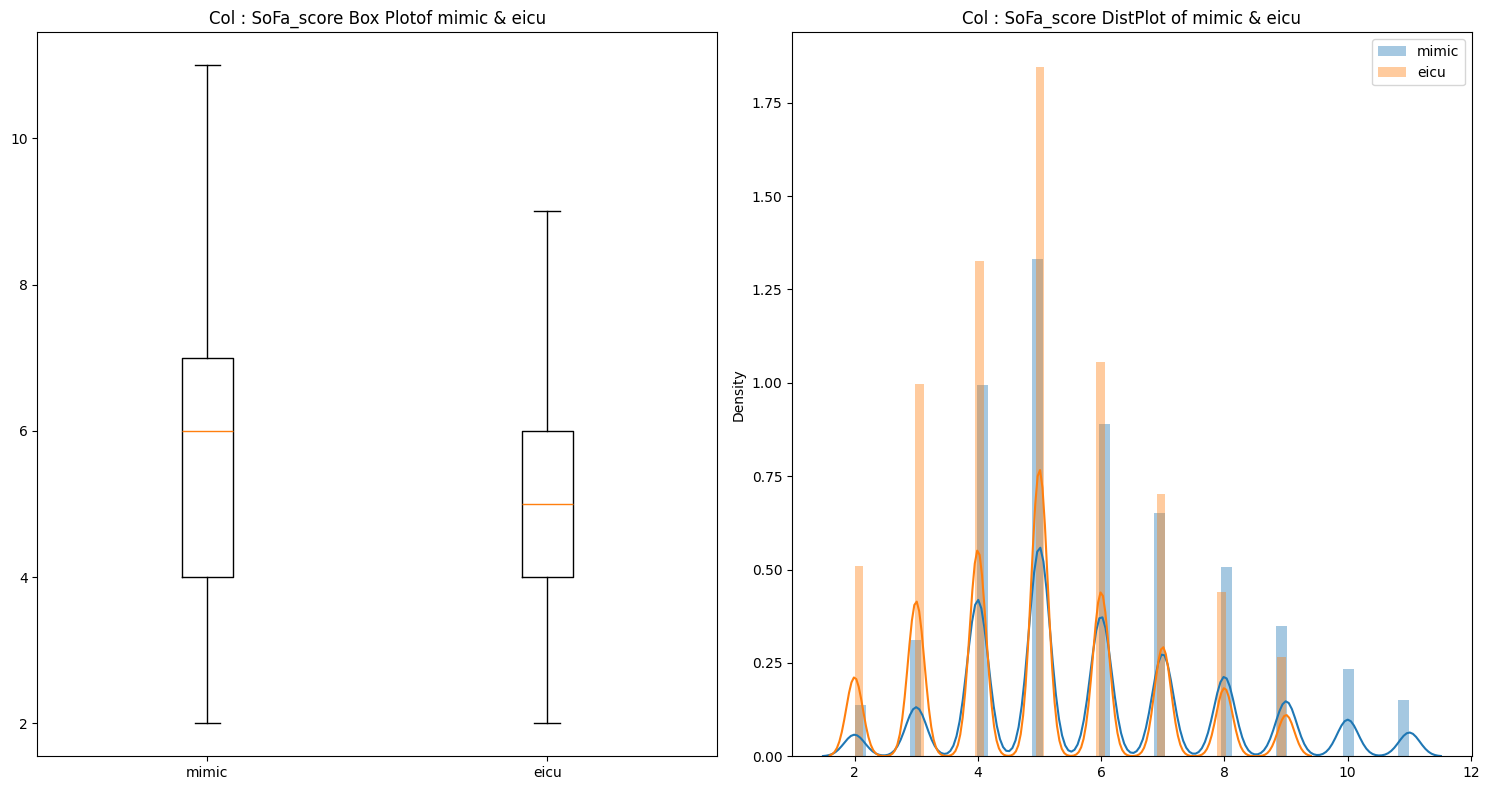

In [33]:
# 이상치 처리 후 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

for i in diff_true_ao.keys():
    fig ,ax = plt.subplots(1,2,figsize = (15, 8))
    mimic_values, eicu_values = remove_outliers(mimic.loc[:,i]), remove_outliers(eicu.loc[:,i])
    ax[0].boxplot([mimic_values, eicu_values], labels = ["mimic","eicu"])
    sns.distplot(mimic_values, ax = ax[1], label = 'mimic')
    sns.distplot(eicu_values, ax = ax[1], label = 'eicu')
    ax[0].set_title(f'Col : {i} Box Plotof mimic & eicu')
    ax[1].set_title(f'Col : {i} DistPlot of mimic & eicu')
    plt.legend()
    plt.tight_layout()
    plt.show()
    

In [53]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 

folder_name = './result/final_DA_Strict'
target_name = "ARDS_next_12h"

positive_latent_eicu_v = np.load(folder_name + '/positive_latent_vector.npy')
negative_latent_eicu_v = np.load(folder_name + '/negative_latent_vector.npy')

positive_result_eicu = pd.read_csv(folder_name + '/positive_eicu_result.csv')
negative_result_eicu = pd.read_csv(folder_name + '/negative_eicu_result.csv')

positive_latent_mimic_v = np.load(folder_name + '/positive_mimic_latent_vector.npy')
negative_latent_mimic_v = np.load(folder_name + '/negative_mimic_latent_vector.npy')

positive_result_mimic = pd.read_csv(folder_name + '/positive_mimic_result.csv')
negative_result_mimic = pd.read_csv(folder_name + '/negative_mimic_result.csv')

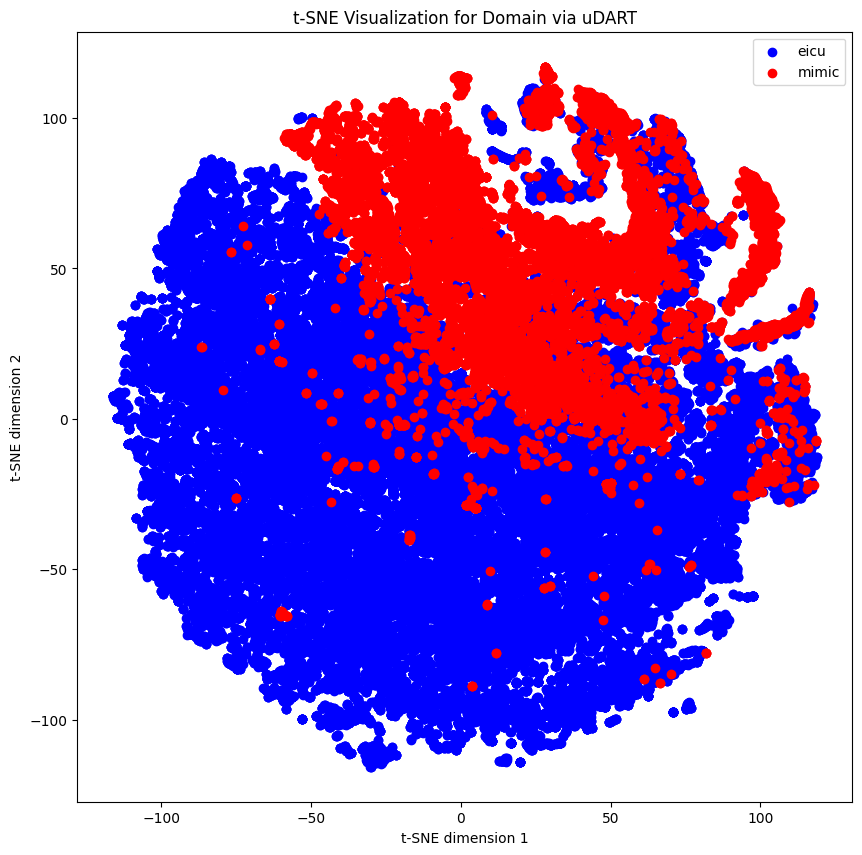

In [55]:
# # # ## DA 진행한 거 T-SNE
# from matplotlib.colors import ListedColormap
# from sklearn.model_selection import train_test_split

# unified_latent_eicu_v = np.concatenate((positive_latent_eicu_v,negative_latent_eicu_v))
# result_df_eicu = pd.concat([positive_result_eicu,negative_result_eicu],axis = 0)
# result_df_eicu['domain'] = 'eicu'

# unified_latent_mimic_v = np.concatenate((positive_latent_mimic_v,negative_latent_mimic_v))
# result_df_mimic = pd.concat([positive_result_mimic,negative_result_mimic],axis = 0)
# result_df_mimic['domain'] = 'mimic'

# final_latent_v = np.concatenate((unified_latent_eicu_v,unified_latent_mimic_v))
# final_df = pd.concat([result_df_eicu[[target_name,'domain']],result_df_mimic[[target_name,'domain']]],axis = 0)

# tsne = TSNE(n_components= 2, random_state = 0)

# tsne_input = pd.concat([pd.DataFrame(final_latent_v).reset_index(drop = True),final_df.reset_index(drop=True)],axis = 1)

# X_train, X_valid, y_train, y_valid = train_test_split(tsne_input.iloc[:,:-2], tsne_input['domain'], train_size = 0.8, stratify = tsne_input['domain'], random_state = 0)

# # print(X_valid)
# X_tsne = tsne.fit_transform(X_valid)

df = pd.DataFrame({'Feature1' : X_tsne[:,0], 'Feature2' : X_tsne[:,1], 'domain' : y_valid, 'label': tsne_input.loc[X_valid.index,target_name].values})

plt.figure(figsize=(10,10))
plt.scatter(df.loc[df['domain'] == 'eicu', 'Feature1'], df.loc[df['domain'] == 'eicu', 'Feature2'], c='b', label='eicu')
plt.scatter(df.loc[df['domain'] == 'mimic', 'Feature1'], df.loc[df['domain'] == 'mimic', 'Feature2'], c='r', label='mimic')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.title('t-SNE Visualization for Domain via uDART')
plt.legend()
plt.show()

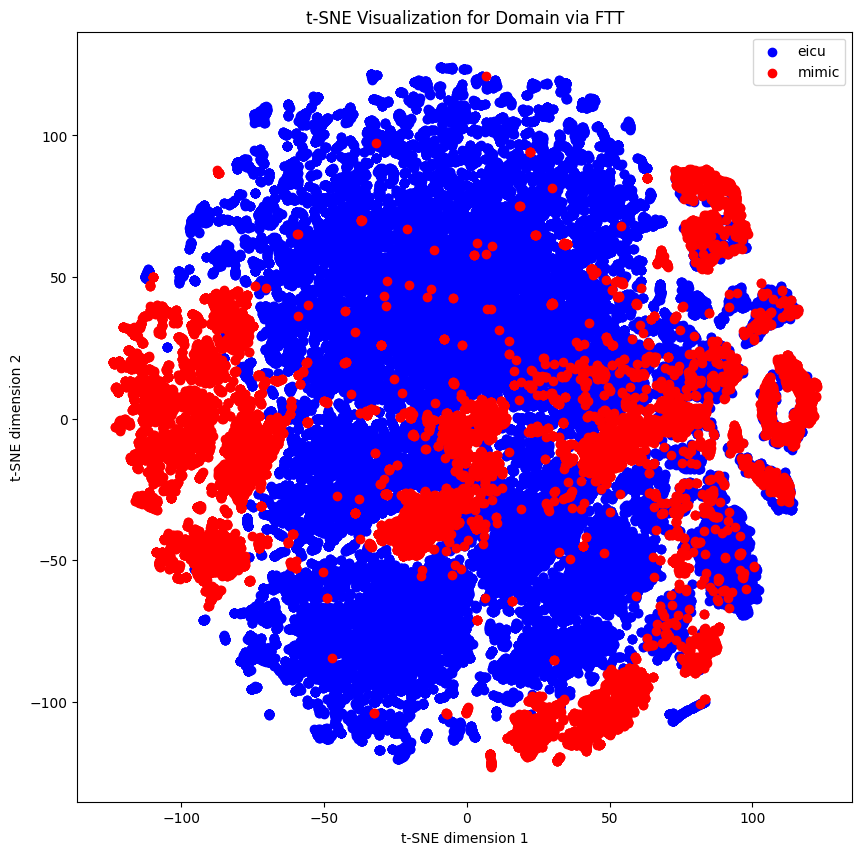

In [57]:
# import pandas as pd
# import numpy as np
# import statsmodels.api as sm
# from scipy import stats
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt 
# from matplotlib.colors import ListedColormap
# from sklearn.model_selection import train_test_split

# folder_name = './result/final_uni_focal_Strict'
# target_name = "ARDS_next_12h"

# positive_latent_eicu_v = np.load(folder_name + '/positive_latent_vector.npy')
# negative_latent_eicu_v = np.load(folder_name + '/negative_latent_vector.npy')

# positive_result_eicu = pd.read_csv(folder_name + '/positive_eicu_result.csv')
# negative_result_eicu = pd.read_csv(folder_name + '/negative_eicu_result.csv')

# positive_latent_mimic_v = np.load(folder_name + '/positive_mimic_latent_vector.npy')
# negative_latent_mimic_v = np.load(folder_name + '/negative_mimic_latent_vector.npy')

# positive_result_mimic = pd.read_csv(folder_name + '/positive_mimic_result.csv')
# negative_result_mimic = pd.read_csv(folder_name + '/negative_mimic_result.csv')

# # DA 진행 X

# unified_latent_eicu_v = np.concatenate((positive_latent_eicu_v,negative_latent_eicu_v))
# result_df_eicu = pd.concat([positive_result_eicu,negative_result_eicu],axis = 0)
# result_df_eicu['domain'] = 'eicu'

# unified_latent_mimic_v = np.concatenate((positive_latent_mimic_v,negative_latent_mimic_v))
# result_df_mimic = pd.concat([positive_result_mimic,negative_result_mimic],axis = 0)
# result_df_mimic['domain'] = 'mimic'

# final_latent_v = np.concatenate((unified_latent_eicu_v,unified_latent_mimic_v))
# final_df = pd.concat([result_df_eicu[[target_name,'domain']],result_df_mimic[[target_name,'domain']]],axis = 0)

# tsne = TSNE(n_components= 2, random_state= 0)

# tsne_input = pd.concat([pd.DataFrame(final_latent_v).reset_index(drop = True),final_df.reset_index(drop=True)],axis = 1)

# X_train, X_valid, y_train, y_valid = train_test_split(tsne_input.iloc[:,:-2], tsne_input['domain'], train_size = 0.8, stratify = tsne_input['domain'], random_state = 0)


# X_tsne = tsne.fit_transform(X_valid)

# 예쁜 색상 팔레트를 정의

df = pd.DataFrame({'Feature1' : X_tsne[:,0], 'Feature2' : X_tsne[:,1], 'domain' : y_valid, 'label': tsne_input.loc[X_valid.index,target_name].values})

plt.figure(figsize=(10,10))
plt.scatter(df.loc[df['domain'] == 'eicu', 'Feature1'], df.loc[df['domain'] == 'eicu', 'Feature2'], c='b', label='eicu')
plt.scatter(df.loc[df['domain'] == 'mimic', 'Feature1'], df.loc[df['domain'] == 'mimic', 'Feature2'], c='r', label='mimic')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.title('t-SNE Visualization for Domain via FTT')
plt.legend()
plt.show()